# Importing packages

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


Import MPI calculations from Github

In [4]:
!wget -O copy_of_mpi_calculations.py https://raw.githubusercontent.com/sam-jager/100WEEKS_code/refs/heads/main/copy_of_mpi_calculations.py
import copy_of_mpi_calculations


--2025-06-25 15:27:43--  https://raw.githubusercontent.com/sam-jager/100WEEKS_code/refs/heads/main/copy_of_mpi_calculations.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-25 15:27:43 ERROR 404: Not Found.



# Data preparation


### Loading Excel file


In [5]:
df = pd.read_csv('/content/central-tableau-export-2.0.csv')

/tmp/ipython-input-5-591996637.py:1: DtypeWarning: Columns (12,29,36,39,41,48,57,83,84,85,86,87,88,89,90,91,92,435,438,457,466,472,474,479,480,483,487,488,493,496,497,499,500,541,561,563,586,587,591,592,593,597,599,601,602,621,622,624,635,641,679) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/central-tableau-export-2.0.csv')


## Database seperation

Removing unnecessary countries


In [6]:
df['Country'].unique()

array(['GHA', 'RWA', 'UGA', 'CIV', 'KEN', 'LIE'], dtype=object)

In [7]:
countries = ['GHA', 'RWA', 'UGA', 'CIV', 'KEN']
df = df[df['Country'].isin(countries)]


Removing unnecessary columns


In [8]:
columns = [
    "Groupnr",
    "Round",
    "Country",
    "childmortality",
    "childmortalitytime",
    *[f"foodsecurity{i}" for i in range(1, 10)],
    *[f"foodsecurity{i}freq" for i in range(1, 10)],
    "fuelcooking",
    "sourcelighting",
    "watersource",
    "timewatersource_1",
    "timewatersourceunit",
    "Toiletfacility",
    "materialroof",
    "materialfloor",
    "materialwallsext",
    "assetsmatrix2_7",
    "assetsmatrix2_14",
    "assetsmatrix2_16",
    "assetsmatrix1_23",
    "assetsmatrix3_14",
    "assetsmatrix3_16",
    "assetsmatrix2_12",
    "assetsmatrix3_22",
    *[f"HHMschool_{n}" for n in range(1, 6)],
    *[f"HHMschoolnow_{n}" for n in range(1, 6)],
    *[f"HHMschoolcompl_{n}" for n in range(1, 6)],
    "school",
    "schoolcompleted",
    "savinghowmuch_1",
    "savinghowmuch_2",
    "savinghowmuch_3",
    "savingstotal_1",
    "debt",
    "debtamount_1",
    "debtnote",
    *[f"anxiety{i}" for i in range(1, 8)],
    "psychwellbeing_1",
    "psychwellbeing_3",
    "psychwellbeing_5",
    "psychwellbeing2_5",
    "jealousy",
    "jealousywhat",
    *[f"livestocknumbers_{i}" for i in [1,13,3,4,5,6,11,8,9,7,2,10]],
    "assetsmatrix1_4",
    "assetsmatrix1_5",
    "assetsmatrix1_22",
    "assetsmatrix2_7",
    "assetsmatrix2_14",
    "assetsmatrix2_15",
    "assetsmatrix2_16",
    "assetsmatrix2_8",
    "assetsmatrix3_17",
    "assetsmatrix2_17",
    "assetsmatrix2_18",
    "assetsmatrix2_19",
    "assetsmatrix2_11",
    "assetsmatrix2_12",
    "assetsmatrix3_14",
    "assetsmatrix1_23",
    "assetsmatrix3_15",
    "assetsmatrix3_16",
    "assetsmatrix3_22",
    "assetsmatrix3_23",
    "occupationmain",
    "ownsland_scto",
    "meetings1",
    "moneywithdraw",
    "moneyproblems"
]

columns_available_in_data = [col for col in columns if col in df.columns]

df = df[columns_available_in_data]



Removing the unnecessary round data

In [9]:

df = df[~df['Round'].isin(['Onboarding', '6', '6.0']) & df['Round'].notna()]
df['Round'] = pd.to_numeric(df['Round'], errors='coerce')
df = df[df['Round'] % 1 == 0]
df['Round'] = df['Round'].astype(int).astype(str)
df = df[df['Round'].isin(['0', '1', '2', '3', '100', '102'])]
df['Round'] = df['Round'].astype(float).astype(int).astype(str)
df = df.sort_values(by='Round', ascending=True)

print(df['Round'].unique())

['0' '1' '100' '102' '2' '3']


/tmp/ipython-input-9-3382996727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Round'] = df['Round'].astype(int).astype(str)


In [10]:
print(df.shape)
print(df.head())


(32338, 114)
      Groupnr Round Country  childmortality  childmortalitytime  \
0      GHA001     0     GHA             NaN                 NaN   
14048  RWA067     0     RWA             2.0                 NaN   
14049  RWA067     0     RWA             2.0                 NaN   
14050  RWA067     0     RWA             2.0                 NaN   
14051  RWA067     0     RWA             2.0                 NaN   

       foodsecurity1  foodsecurity2  foodsecurity3  foodsecurity4  \
0                NaN            NaN            NaN            NaN   
14048            1.0            1.0            1.0            1.0   
14049            1.0            1.0            1.0            1.0   
14050            1.0            1.0            1.0            1.0   
14051            1.0            1.0            1.0            1.0   

       foodsecurity5  ...  assetsmatrix1_23  assetsmatrix3_15  \
0                NaN  ...               NaN               1.0   
14048            1.0  ...              

Separating the filtered database per country and transforming the new databases in Excel files


In [12]:
df_gha = df[df['Country'] == 'GHA']
df_rwa = df[df['Country'] == 'RWA']
df_uga = df[df['Country'] == 'UGA']
df_civ = df[df['Country'] == 'CIV']
df_ken = df[df['Country'] == 'KEN']

# #Is dit nodig?
# df_gha.to_excel('df_gha.xlsx')
# df_rwa.to_excel('df_rwa.xlsx')
# df_uga.to_excel('df_uga.xlsx')
# df_civ.to_excel('df_civ.xlsx')
# df_ken.to_excel('df_ken.xlsx')

Checking the different Data Types

Defining the different column types


In [14]:
numerical = [
    "savinghowmuch_1", "savinghowmuch_2", "savinghowmuch_3",
    "savingstotal_1", "debtamount_1", "timewatersource_1"
]


ordered_categorical = [
    *[f"foodsecurity{i}freq" for i in range(1, 10)],
    *[f"anxiety{i}" for i in range(1, 8)],
    "psychwellbeing_1", "psychwellbeing_3", "psychwellbeing_5", "psychwellbeing2_5"
]


categorical = [
    "fuelcooking", "sourcelighting", "watersource", "Toiletfacility",
    "materialroof", "materialfloor", "materialwallsext",
    *[f"HHMschoolcompl_{n}" for n in range(1, 6)],
    "schoolcompleted", "livestocknumbers_1",
    *[f"livestocknumbers_{i}" for i in [1, 13, 3, 4, 5, 6, 11, 8, 9, 7, 2, 10]],
    "occupationmain"
]


binary = [
    "childmortality",
    *[f"foodsecurity{i}" for i in range(1, 10)],
    *[f"HHMschool_{n}" for n in range(1, 6)],
    *[f"HHMschoolnow_{n}" for n in range(1, 6)],
    "school", "debt", "jealousy",
    "assetsmatrix1_4", "assetsmatrix1_5", "assetsmatrix1_22",
    "assetsmatrix2_15", "assetsmatrix2_8", "assetsmatrix3_17",
    "assetsmatrix2_17", "assetsmatrix2_18", "assetsmatrix2_19",
    "assetsmatrix2_11", "assetsmatrix3_15", "assetsmatrix3_23",
    "meetings1", "moneywithdraw", "moneyproblems"
]


multiple_choice = [
    "debtnote", "jealousywhat"
]


information = [
    "Country", "Groupnr", "Round"
]


Measurements with respective variables

In [15]:
measurements = {
    "MPI": {
        "binary": [
            "childmortality",
            *[f"foodsecurity{i}" for i in range(1, 10)],
            *[f"HHMschool_{n}" for n in range(1, 6)],
            *[f"HHMschoolnow_{n}" for n in range(1, 6)],
            "school"
        ],
        "categorical": [
            "fuelcooking", "sourcelighting", "watersource", "Toiletfacility",
            "materialroof", "materialfloor", "materialwallsext",
            *[f"HHMschoolcompl_{n}" for n in range(1, 6)],
            "schoolcompleted"
        ],
        "ordered_categorical": [
            *[f"foodsecurity{i}freq" for i in range(1, 10)]
        ],
        "numerical": [
            "childmortalitytime", "timewatersource_1", "timewatersourceunit"
        ],
        "multiple_choice": [],
    },

    "Food security scale": {
        "binary": [*[f"foodsecurity{i}" for i in range(1, 10)]],
        "ordered_categorical": [*[f"foodsecurity{i}freq" for i in range(1, 10)]]
    },

    "Monthly savings": {
        "numerical": ['savinghowmuch_1', 'savinghowmuch_2', 'savinghowmuch_3']
    },
    "Total savings": {
        "numerical": ['savingstotal_1']
    },
    "Debt": {
        "binary": ['debt'],
        "numerical": ['debtamount_1'],
        "multiple_choice": ['debtnote']
    },
    "Mental wellbeing - anxiety": {
        "ordered_categorical": [*[f"anxiety{i}" for i in range(1, 8)]]
    },
    "Mental wellbeing - depression": {
        "ordered_categorical": ['psychwellbeing_1', 'psychwellbeing_3', 'psychwellbeing_5', 'psychwellbeing2_5']
    },
    "Jealousy": {
        "binary": ['jealousy'],
        "multiple_choice": ['jealousywhat']
    },
    "Livestock": {
        "categorical": [*[f"livestocknumbers_{i}" for i in [1, 13, 3, 4, 5, 6, 11, 8, 9, 7]]],
        "numerical": ['livestocknumbers_2', 'livestocknumbers_10']
    },
    "Assets": {
        "binary": [
            'assetsmatrix1_4', 'assetsmatrix1_5', 'assetsmatrix1_22',
            'assetsmatrix2_15', 'assetsmatrix2_8', 'assetsmatrix3_17',
            'assetsmatrix2_17', 'assetsmatrix2_18', 'assetsmatrix2_19',
            'assetsmatrix2_11', 'assetsmatrix3_15', 'assetsmatrix3_23'
        ],
        "categorical": [
            'assetsmatrix2_7', 'assetsmatrix2_14', 'assetsmatrix2_16', 'assetsmatrix3_14',
            'assetsmatrix1_23', 'assetsmatrix3_16', 'assetsmatrix2_12', 'assetsmatrix3_22'
        ]
    },
    "Main occupation": {
        "categorical": ['occupationmain']
    },
    "Meetings": {
        "binary": ['meetings1']
    },
    "Money receipt": {
        "binary": ['moneywithdraw', 'moneyproblems']
    }
}


In [16]:
#df = pd.read_csv('/content/central-tableau-export-2.0.csv')
def livestock_normal(val):
    if pd.isna(val):
        return 0
    val = int(val)

    if val in [1, 2, 3, 4, 5]:
        return str(val)
    elif 6 <= val <= 10:
        return '6-10'
    elif 11 <= val <= 20:
        return '11-20'
    elif val > 20:
        return '20+'

#except 5, 6 and 11 because those are larger
livestock_indices_normal = [1, 13, 3, 4, 8, 9, 7, 2, 10]

# Apply the function to all livestock columns
for i in livestock_indices_normal:
    col = f'livestocknumbers_{i}'
    df[col] = df[col].apply(livestock_normal)
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False))


Value counts for livestocknumbers_1:
livestocknumbers_1
0        28102
1         3160
2          745
3          158
4           60
5           55
6-10        43
11-20        9
20+          6
Name: count, dtype: int64

Value counts for livestocknumbers_13:
livestocknumbers_13
0       31979
1         307
2          41
3           6
5           2
4           2
6-10        1
Name: count, dtype: int64

Value counts for livestocknumbers_3:
livestocknumbers_3
0        25731
2         1919
1         1858
3         1122
4          602
6-10       595
5          387
11-20      103
20+         21
Name: count, dtype: int64

Value counts for livestocknumbers_4:
livestocknumbers_4
0        32080
1          165
2           66
3           11
4            6
6-10         4
5            3
20+          2
11-20        1
Name: count, dtype: int64

Value counts for livestocknumbers_8:
livestocknumbers_8
0        31623
2          166
6-10       134
3          121
1           91
4           87
5           72
1

In [17]:
#df = pd.read_csv('/content/central-tableau-export-2.0.csv')
def livestock_high(val):
    if pd.isna(val):
        return 0
    val = int(val)

    if val in [1, 2, 3, 4, 5]:
        return str(val)
    elif 6 <= val <= 10:
        return '6-10'
    elif 11 <= val <= 20:
        return '11-20'
    elif 21 <= val <= 50:
        return '21-50'
    elif val >= 51:
        return '51+'

#except 5, 6 and 11 because those are larger
livestock_indices_high = [5,6,11]

# Apply the function to all livestock columns
for i in livestock_indices_high:
    col = f'livestocknumbers_{i}'
    df[col] = df[col].apply(livestock_high)
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False))


Value counts for livestocknumbers_5:
livestocknumbers_5
0        28822
2          963
1          963
3          514
6-10       396
4          307
5          207
11-20      135
21-50       26
51+          5
Name: count, dtype: int64

Value counts for livestocknumbers_6:
livestocknumbers_6
0        20329
6-10      3414
11-20     2019
5         1312
2         1287
3         1241
4          944
21-50      901
1          738
51+        153
Name: count, dtype: int64

Value counts for livestocknumbers_11:
livestocknumbers_11
0        31724
6-10       147
3          106
2           95
4           88
11-20       61
1           59
5           42
21-50       14
None         1
51+          1
Name: count, dtype: int64


In [18]:
def mpi_water(row):
    water = row['watersource']

    timewatersource_minutes = row['timewatersource_1']

    #longer than 30 minutes for water was always bad according to Yvonne MPI
    if timewatersource_minutes > 30:
        return 1.0

    if water in [1, 2, 5, 7, 12]:  # Piped, protected well/spring, bottled
        return 0.0
    elif water in [4, 10]:  # Borehole, tanker truck
        return 0.3
    elif water in [3, 6]:  # No facility, unprotected well
        return 0.6
    elif water in [8, 9, 11]:  # Unprotected spring, surface water, rainwater
        return 1.0
    else:
        return None

df['MPI_water'] = df.apply(mpi_water, axis=1)
print(df['MPI_water'].value_counts())
df['MPI_water'].isna().sum()

MPI_water
0.6    9173
0.0    4697
1.0    4664
0.3    2962
Name: count, dtype: int64


np.int64(10842)

In [19]:
def MPI_fuel(row):
    fuel = row['fuelcooking']

    if fuel in [3, 4, 5, 6]:        # Clean options
        return 0.0
    elif fuel in [7]:              # Kerosene
        return 0.3
    elif fuel in [2, 10]:          # Charcoal, Other wss niet bien
        return 0.6
    elif fuel in [1, 8, 9]:        # Firewood, Crop waste, Dung
        return 1.0
    else:
        return None  # Missing or unknown


#add column to df
df['MPI_fuel'] = df.apply(MPI_fuel, axis=1)
print(df['MPI_fuel'].value_counts())
df['MPI_fuel'].isna().sum()

MPI_fuel
1.0    18110
0.6     3019
0.0      289
0.3        1
Name: count, dtype: int64


np.int64(10919)

In [20]:
def MPI_electricity(row):
    source = row['sourcelighting']

    if source in [1, 2, 4, 9, 15]:  # National grid, electricity distributor, generator, solar panel
        return 0.0
    elif source in [3]:  # Bio gas
        return 0.3
    elif source in [5, 7, 8, 10, 13, 14]:  # Oil lamp, candle, lantern, batteries, mobile torch, flashlight
        return 0.6
    elif source in [6, 11, 12]:  # Firewood, other, burning stick
        return 1.0
    else:
        return None


#add column to df
df['MPI_electricity'] = df.apply(MPI_electricity, axis=1)
print(df['MPI_electricity'].value_counts())
df['MPI_electricity'].isna().sum()

MPI_electricity
0.0    12780
0.6     7778
1.0      739
Name: count, dtype: int64


np.int64(11041)

In [21]:
#Determine whether a beneficiary is deprived in sanitation based on the question toiletfacility
def MPI_sanitation(row):
    toiletfacility = row['Toiletfacility']

    if toiletfacility in [1]:  # Flush
        return 0.0
    elif toiletfacility in [6]:  # Improved pit
        return 0.2
    elif toiletfacility in [5]:  # Unimproved pit
        return 0.6
    elif toiletfacility in [3]:  # No facility
        return 1.0
    else:
        return None


#add column to df
df['MPI_sanitation'] = df.apply(MPI_sanitation, axis=1)
print(df['MPI_sanitation'].value_counts())
df['MPI_sanitation'].isna().sum()

MPI_sanitation
0.6    8830
0.2    8491
1.0    2416
0.0     425
Name: count, dtype: int64


np.int64(12176)

In [22]:
#HOUSEEE

def MPI_floor(row):
    material = row['materialfloor']
    if material in [5, 6]:  # Cement, bricks
        return 0.0
    elif material in [4, 9]:  # Clay tiles, other solid/durable
        return 0.3
    elif material in [3, 8]:  # Wooden floor, other simple
        return 0.6
    elif material in [1, 2]:  # Earth, dung
        return 1.0
    else:
        return None

def MPI_roof(row):
    material = row['materialroof']
    if material in [4]:  # Concrete
        return 0.0
    elif material in [2, 3, 8]:  # Metal sheets, clay tiles, other solid
        return 0.3
    elif material in [5, 7]:  # Plastic/plywood, other rudimentary
        return 0.6
    elif material in [1, 9]:  # Thatch/grass, no roof
        return 1.0
    else:
        return None

def MPI_wall(row):
    material = row['materialwallsext']
    if material in [4, 6]:  # Cement blocks, stones
        return 0.0
    elif material in [2, 3, 13]:  # Mud bricks with cement, oven fired bricks,  other solid
        return 0.3
    elif material in [1, 5, 8, 9, 11]:  # Mud bricks, wood planks, sticks with mud, plastic, natural, wooden sticks cement
        return 0.6
    elif material in [7, 14]:  # No walls, wooden sticks mud
        return 1.0
    else:
        return None

#add column to df
df['material_walls'] = df.apply(MPI_wall, axis=1)
df['material_floor'] = df.apply(MPI_floor, axis=1)
df['material_roof'] = df.apply(MPI_roof, axis=1)

def average_material_score(row):
    values = [row['material_walls'], row['material_floor'], row['material_roof']]
    valid_values = [v for v in values if v is not None]

    if valid_values:
        return sum(valid_values) / len(valid_values)
    else:
        return None

df['MPI_house'] = df.apply(average_material_score, axis=1)
print(df['MPI_house'].value_counts())
df['MPI_house'].isna().sum()



MPI_house
0.200000    4216
0.633333    3934
0.766667    2418
0.533333    2297
0.100000    1905
0.300000    1882
0.433333    1068
0.866667     638
0.733333     377
0.400000     237
0.500000     178
1.000000     121
0.633333      55
0.600000      45
0.666667      41
0.000000      19
0.333333      13
Name: count, dtype: int64


np.int64(12894)

# Benchmarking


## Adding benchmark rows

Adding a row 'benchmark' for every survey to add the benchmarks in. Survey

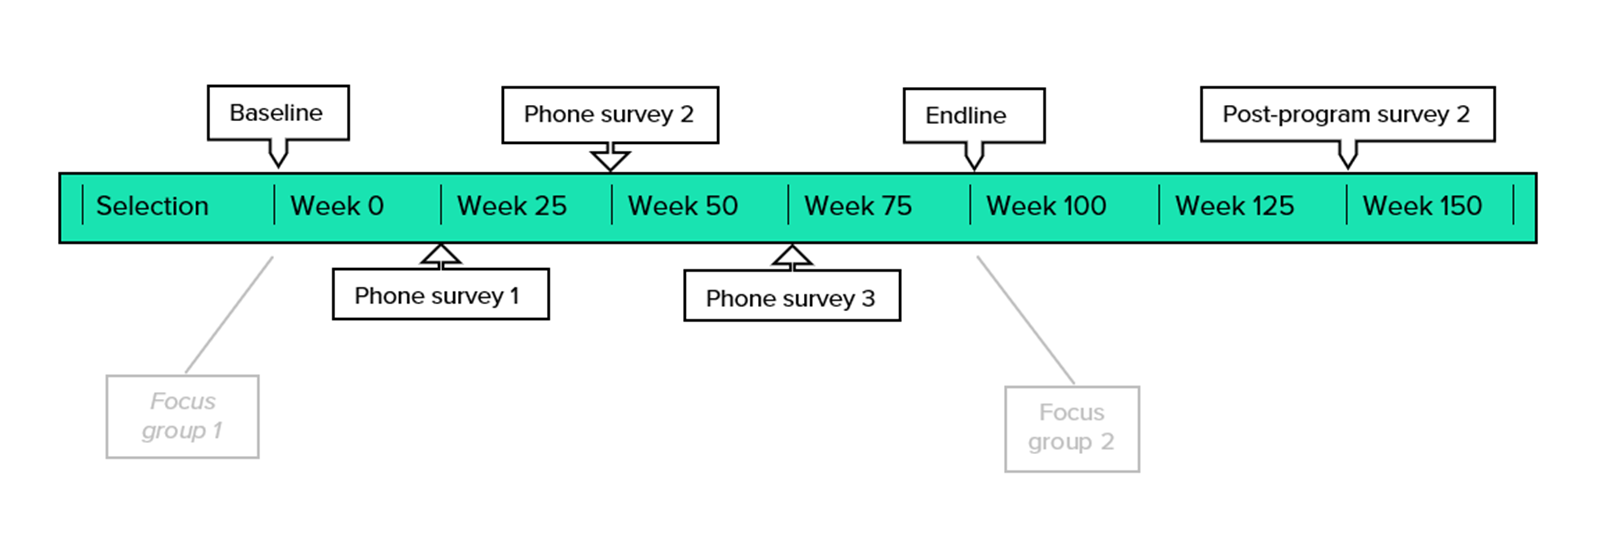

In [23]:
#Round 0, 1, 2, 3, 100, 102

df_rwa.loc["benchmark_baseline"] = np.nan
df_rwa.loc["benchmark_phone_survey_1"] = np.nan
df_rwa.loc["benchmark_phone_survey_2"] = np.nan
df_rwa.loc["benchmark_phone_survey_3"] = np.nan
df_rwa.loc["benchmark_endline"] = np.nan
df_rwa.loc["benchmark_post-program_survey_2"] = np.nan

benchmark_rows = [
    "benchmark_baseline",
    "benchmark_phone_survey_1",
    "benchmark_phone_survey_2",
    "benchmark_phone_survey_3",
    "benchmark_endline",
    "benchmark_post-program_survey_2"
]

/tmp/ipython-input-23-3398828339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rwa.loc["benchmark_baseline"] = np.nan
/tmp/ipython-input-23-3398828339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rwa.loc["benchmark_phone_survey_1"] = np.nan
/tmp/ipython-input-23-3398828339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rwa.loc["benchmark_phone_survey_2"] = np.nan
/tmp/ipython-input-23-3398828339.py:6: Setting

Creating seperate dataframes for the different surveys taken

In [24]:
df_rwa_baseline = df_rwa[df_rwa['Round'] == '0']
df_rwa_phone_survey_1 = df_rwa[df_rwa['Round'] == '1']
df_rwa_phone_survey_2 = df_rwa[df_rwa['Round'] == '2']
df_rwa_phone_survey_3 = df_rwa[df_rwa['Round'] == '3']
df_rwa_endline = df_rwa[df_rwa['Round'] == '100']
df_rwa_post_program_survey_2 = df_rwa[df_rwa['Round'] == '102']

In [25]:
benchmark_map = {
    "benchmark_baseline": df_rwa_baseline,
    "benchmark_phone_survey_1": df_rwa_phone_survey_1,
    "benchmark_phone_survey_2": df_rwa_phone_survey_2,
    "benchmark_phone_survey_3": df_rwa_phone_survey_3,
    "benchmark_endline": df_rwa_endline,
    "benchmark_post-program_survey_2": df_rwa_post_program_survey_2
}

## Numerical columns


Converting all incorrect string values to NaN

In [26]:
for column in numerical:
    df_rwa[column] = pd.to_numeric(df_rwa[column], errors='coerce')

/tmp/ipython-input-26-2718480425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rwa[column] = pd.to_numeric(df_rwa[column], errors='coerce')


In [27]:
for column in numerical:
  for i in df_rwa[column]:
    if type(i) != float:
      print(i)
      print(type(i))

Calculating the mean values per survey per numerical variable and adding the mean values to the benchmark rows


In [28]:
for benchmark_name, survey_df in benchmark_map.items():
    for col in numerical:
        mean_val = survey_df[col].mean()
        df_rwa.at[benchmark_name, col] = mean_val

In [29]:
df_rwa.loc[benchmark_rows][numerical]

,savinghowmuch_1,savinghowmuch_2,savinghowmuch_3,savingstotal_1,debtamount_1,timewatersource_1
benchmark_baseline,2023.809524,1188.877583,88.325653,26356.103276,73641.510979,24.042526
benchmark_phone_survey_1,2533.023234,7010.544200,83.341270,59217.984556,56429.001342,20.062053
benchmark_phone_survey_2,3075.961039,7387.160453,88.366438,81827.434638,71134.891399,48.044110
benchmark_phone_survey_3,4082.303371,7372.842849,64.267735,87528.264766,64317.771232,14.842697
benchmark_endline,5141.400328,4023.051948,126.071429,122917.612341,74095.955956,19.821259
benchmark_post-program_survey_2,5595.208145,4091.052941,113.619403,136421.571649,139108.501684,18.767470


## Categorical columns

### With order

In [30]:
for column in ordered_categorical:
    df_rwa[column] = pd.to_numeric(df_rwa[column], errors='coerce')

/tmp/ipython-input-30-2782024476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rwa[column] = pd.to_numeric(df_rwa[column], errors='coerce')


In [31]:
for column in ordered_categorical:
  for i in df_rwa[column]:
    if type(i) != float:
      print(i)
      print(type(i))

In [32]:
for benchmark_name, survey_df in benchmark_map.items():
    for col in ordered_categorical:
        mean_val = survey_df[col].mean()
        df_rwa.at[benchmark_name, col] = mean_val

In [33]:
df_rwa.loc[benchmark_rows][ordered_categorical]

,foodsecurity1freq,foodsecurity2freq,foodsecurity3freq,foodsecurity4freq,foodsecurity5freq,foodsecurity6freq,foodsecurity7freq,foodsecurity8freq,foodsecurity9freq,anxiety1,anxiety2,anxiety3,anxiety4,anxiety5,anxiety6,anxiety7,psychwellbeing_1,psychwellbeing_3,psychwellbeing_5,psychwellbeing2_5
benchmark_baseline,2.220595,2.172946,2.171694,2.249524,2.188351,2.196995,2.165244,2.000000,1.989489,1.800490,1.689106,1.790698,1.646267,1.474908,1.602203,1.605875,1.958556,1.727534,2.331966,1.426745
benchmark_phone_survey_1,1.740157,1.816079,1.826180,1.775899,1.713115,1.727273,1.771429,1.578947,1.833333,1.548632,NaN,1.594225,NaN,NaN,NaN,NaN,1.500000,1.402439,2.529810,1.172688
benchmark_phone_survey_2,1.708920,1.660232,1.655303,1.675351,1.814332,1.862191,1.980952,1.909091,1.960784,1.150000,NaN,1.050000,NaN,NaN,NaN,NaN,1.331638,1.298576,2.748220,1.133913
benchmark_phone_survey_3,1.510204,1.678511,1.657556,1.593548,1.531250,1.366667,1.384615,1.400000,1.500000,1.384686,NaN,1.402917,NaN,NaN,NaN,NaN,1.343575,1.292179,2.738547,1.166819
benchmark_endline,1.450980,1.664042,1.676508,1.610315,1.553191,1.712329,1.767442,1.583333,1.625000,1.257485,1.182635,1.249501,1.176647,1.104790,1.212575,1.180639,1.274033,1.162983,2.718785,1.084717
benchmark_post-program_survey_2,1.654971,1.528351,1.570292,1.620408,1.660377,1.696629,1.711538,1.884615,1.809524,1.298921,1.206471,1.312789,1.234206,1.114022,1.228043,1.178737,1.294900,1.200665,2.727273,1.086475


### Without order

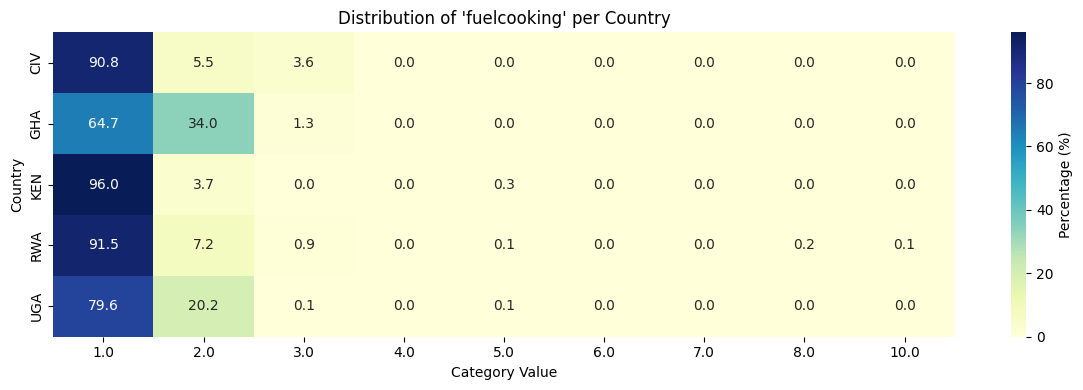

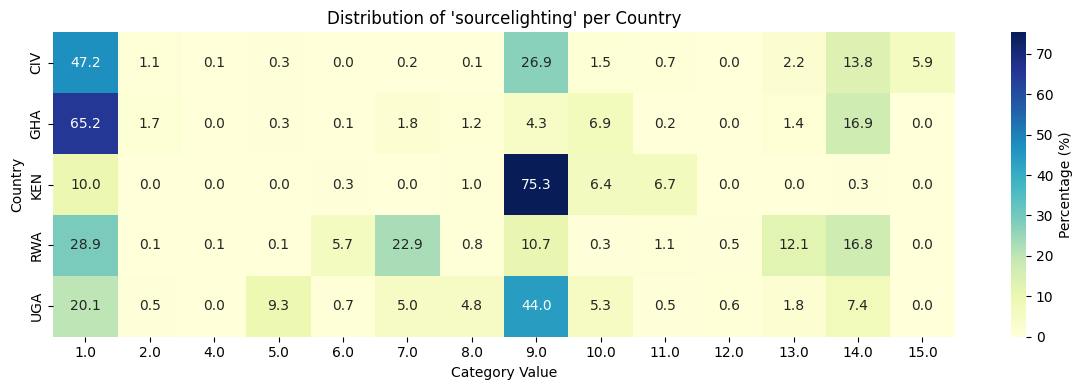

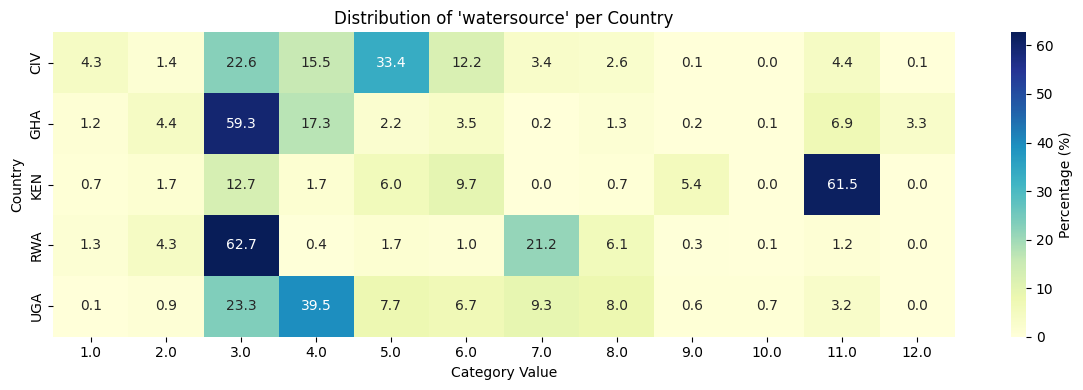

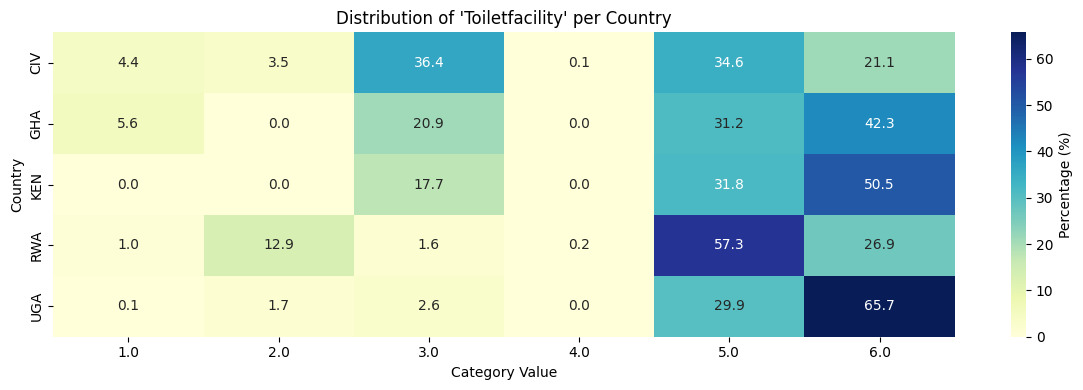

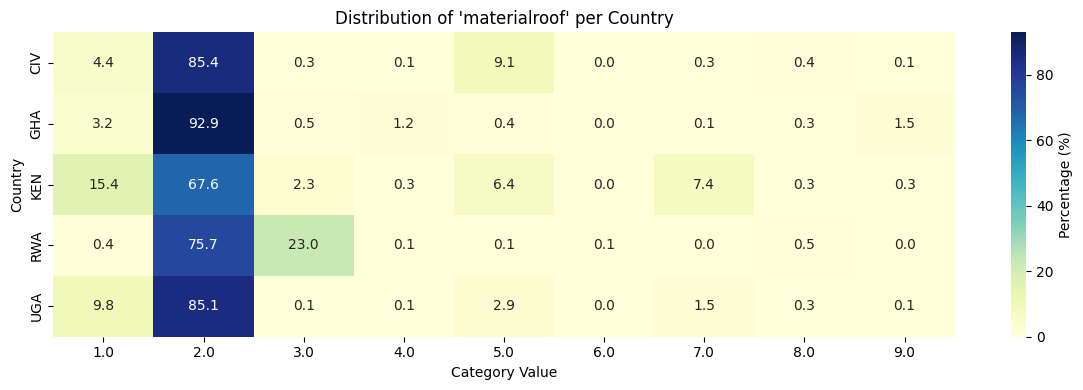

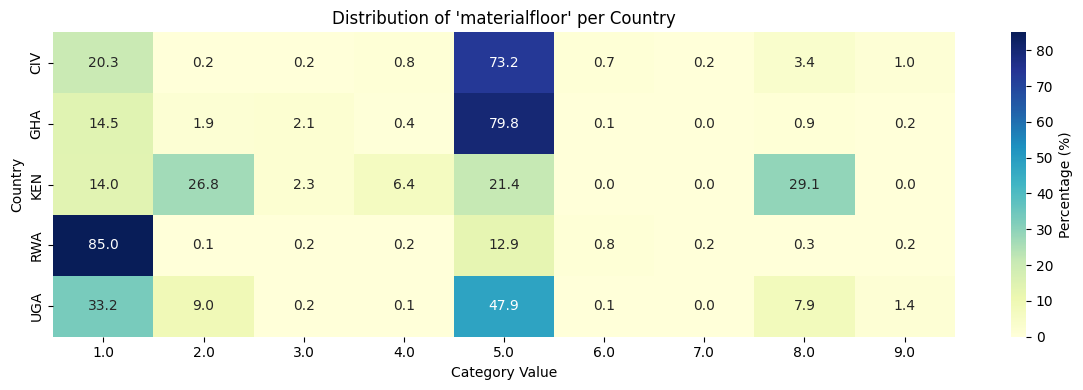

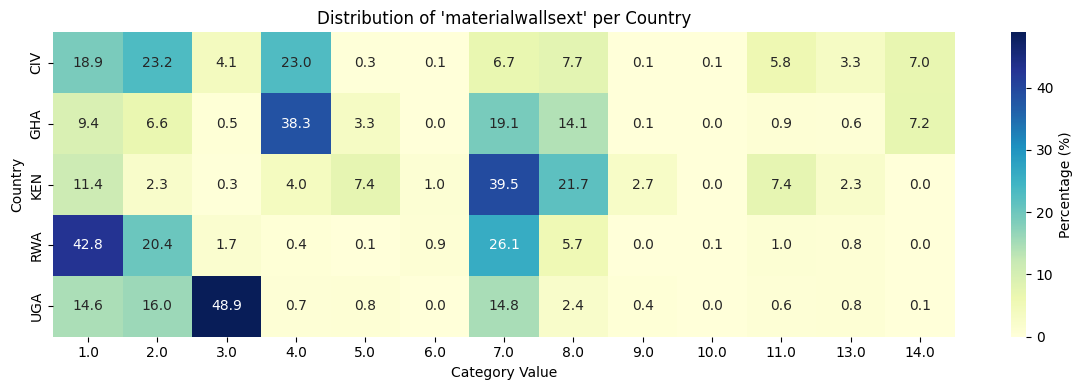

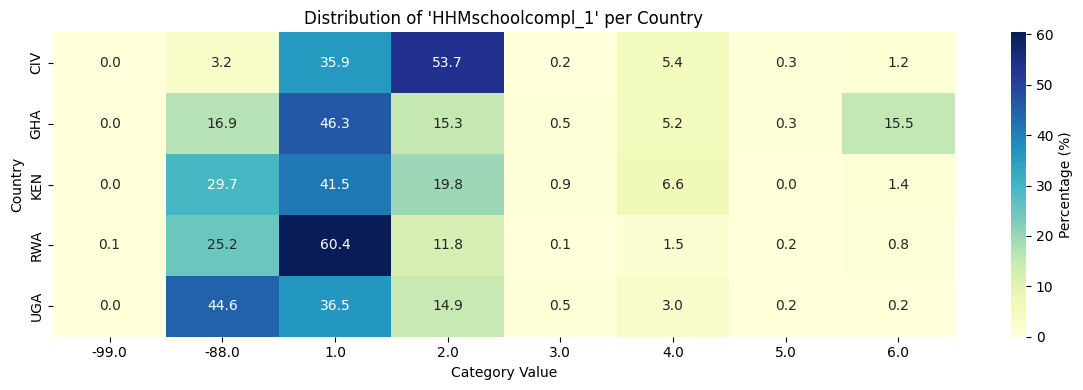

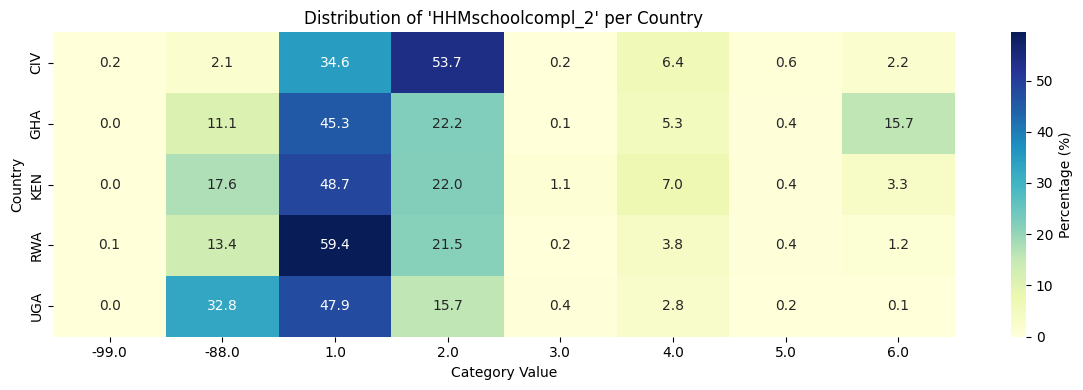

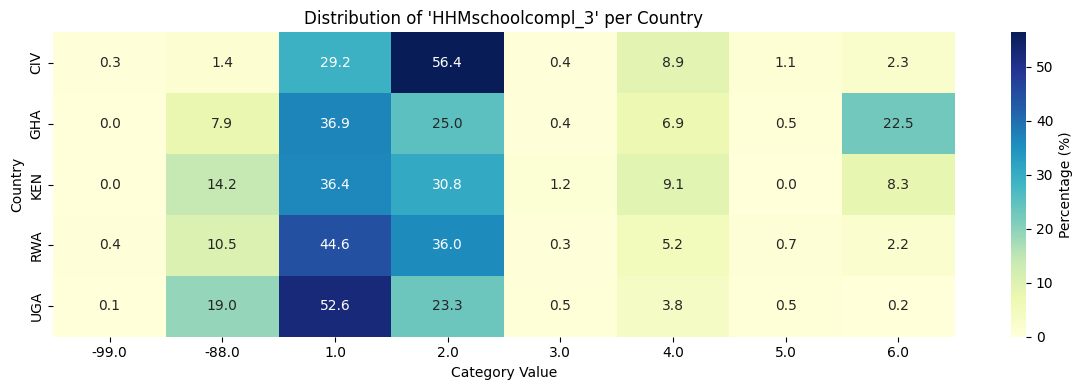

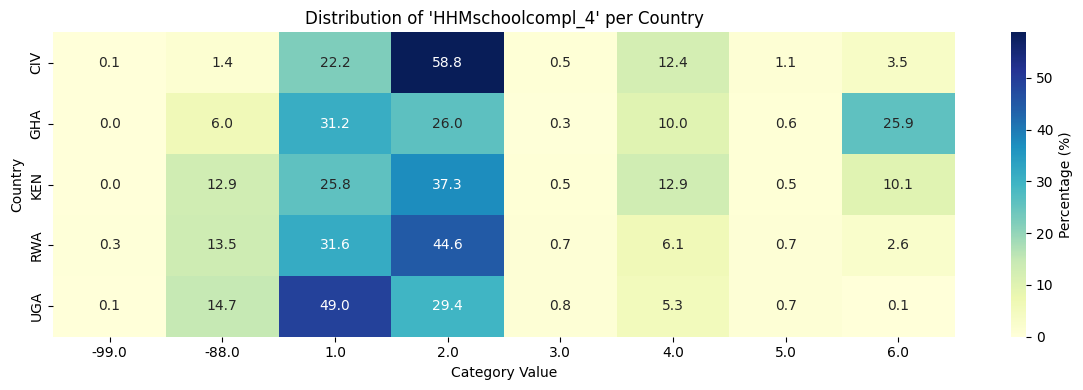

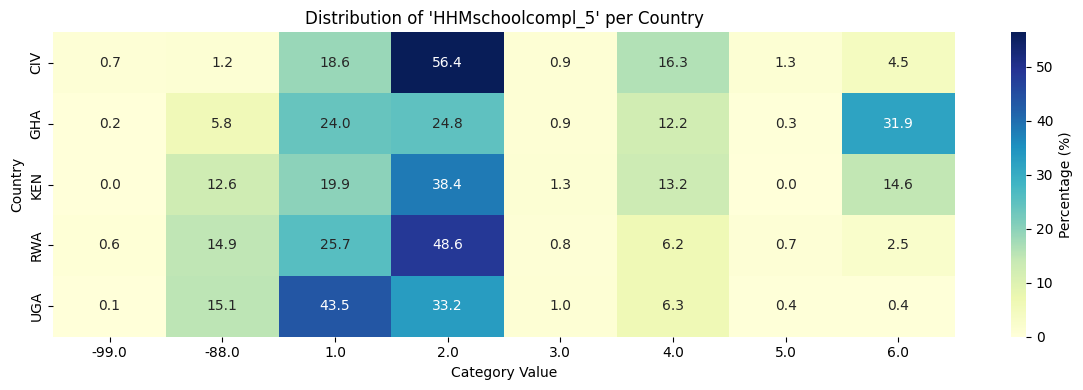

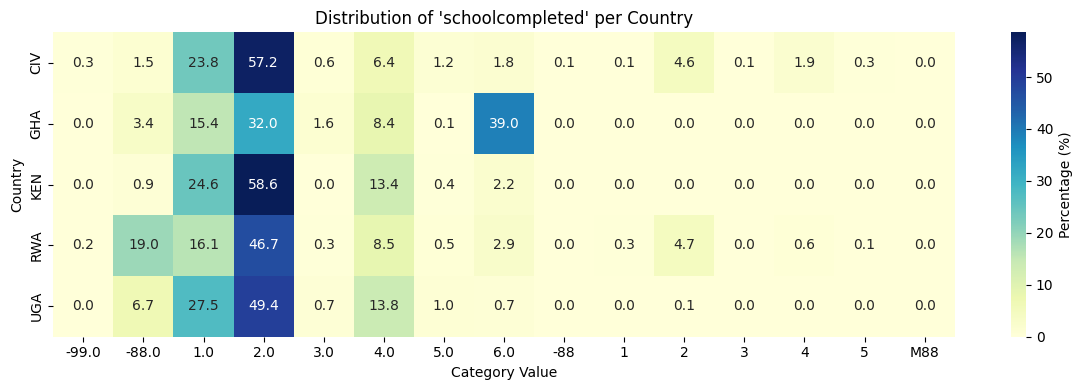

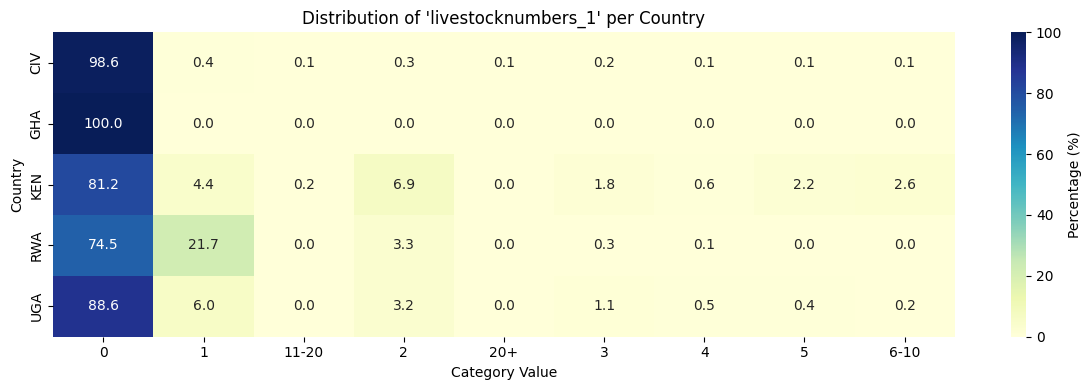

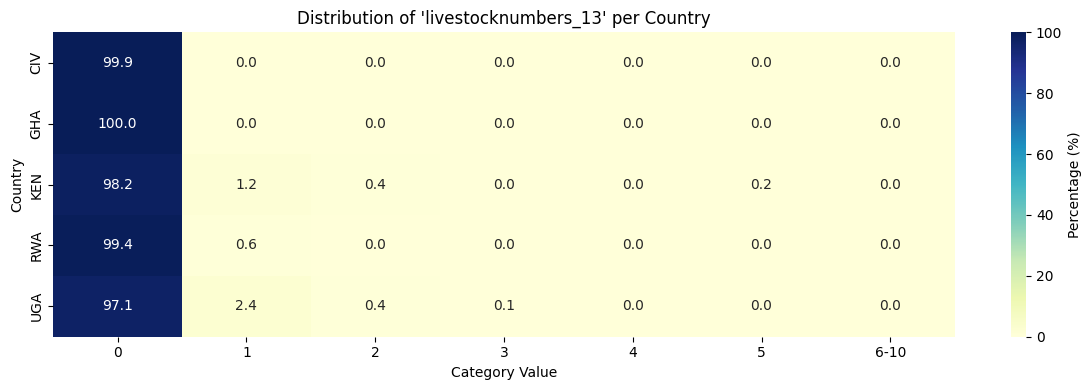

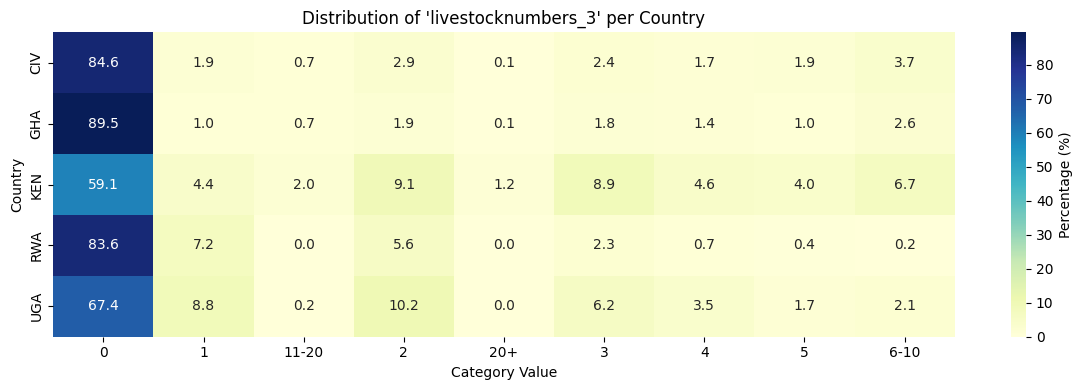

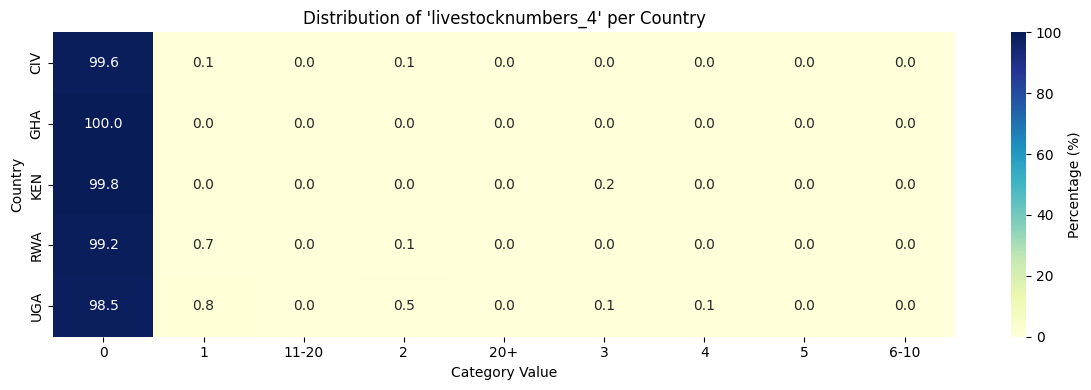

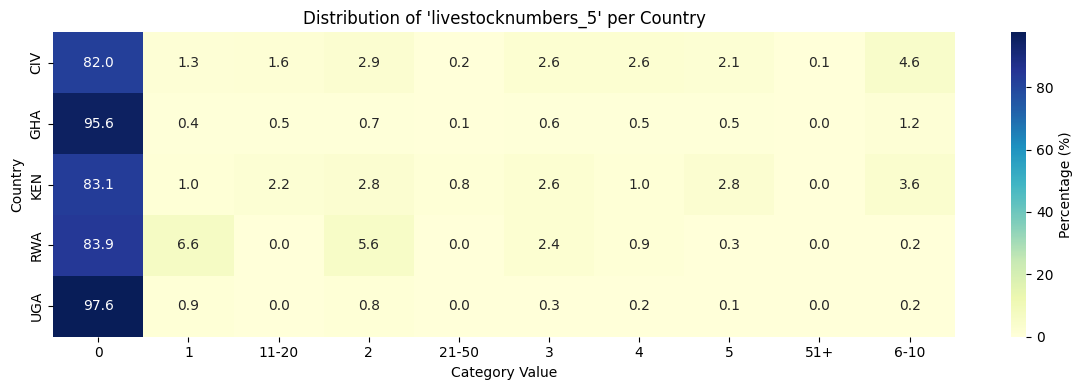

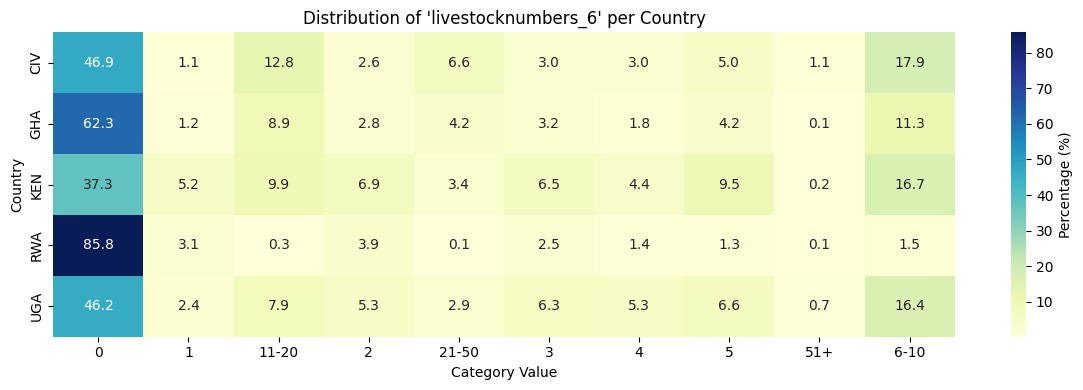

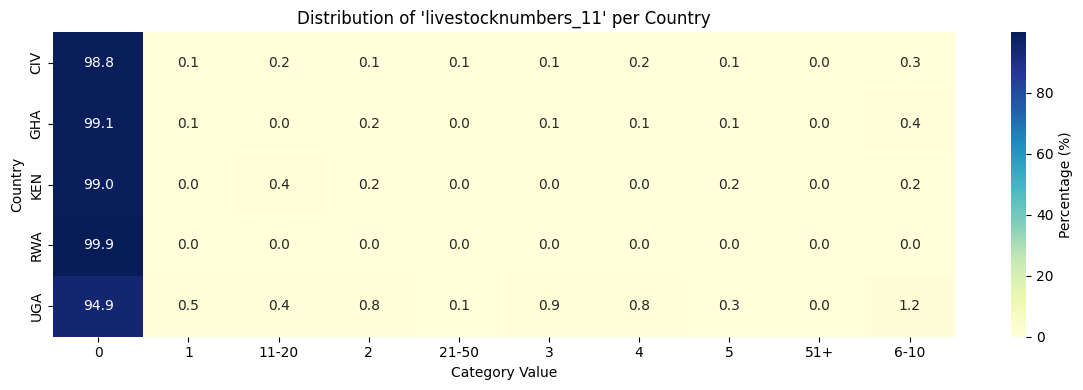

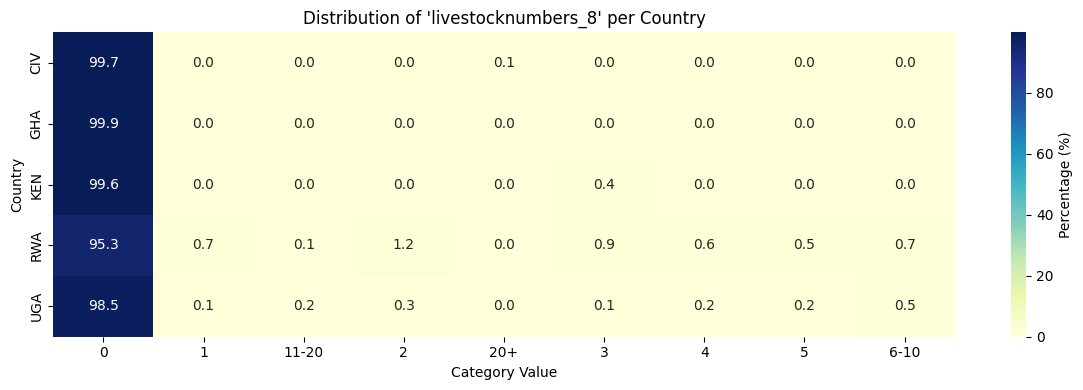

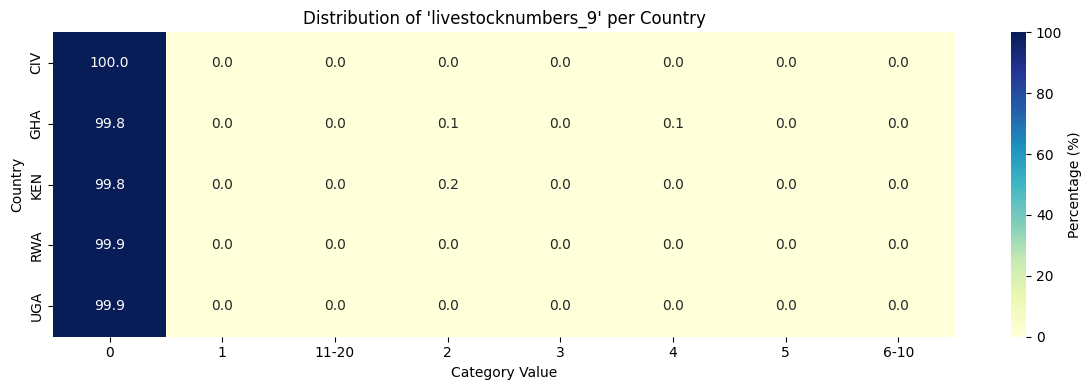

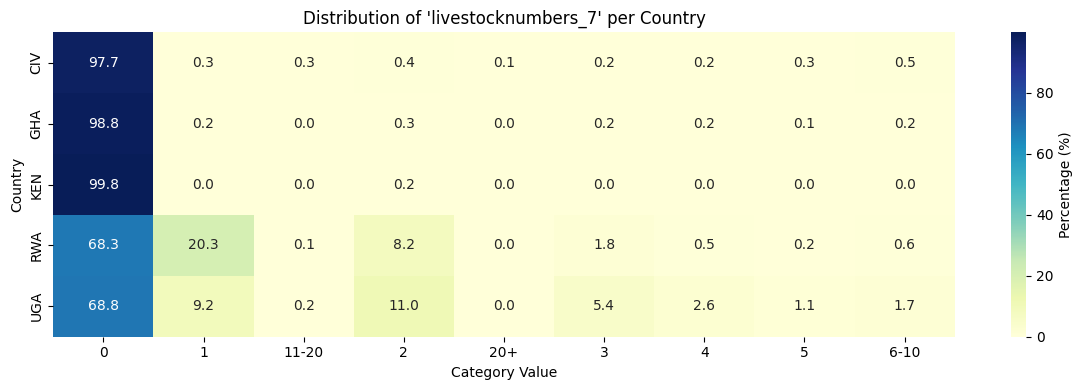

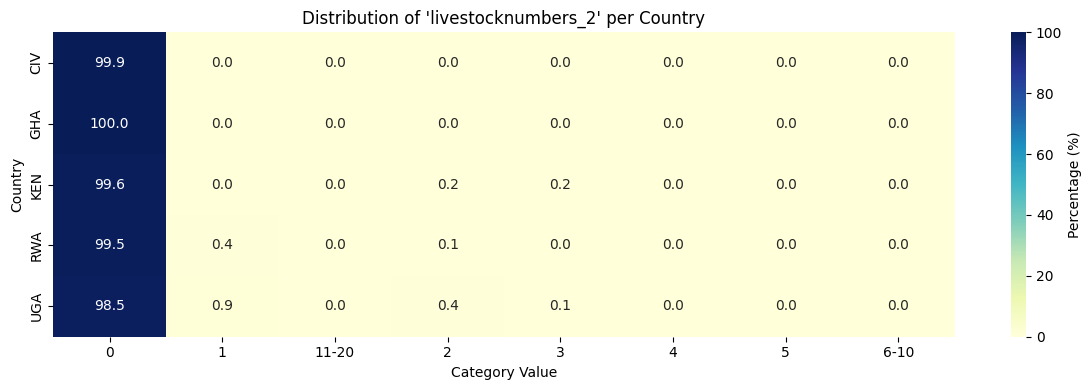

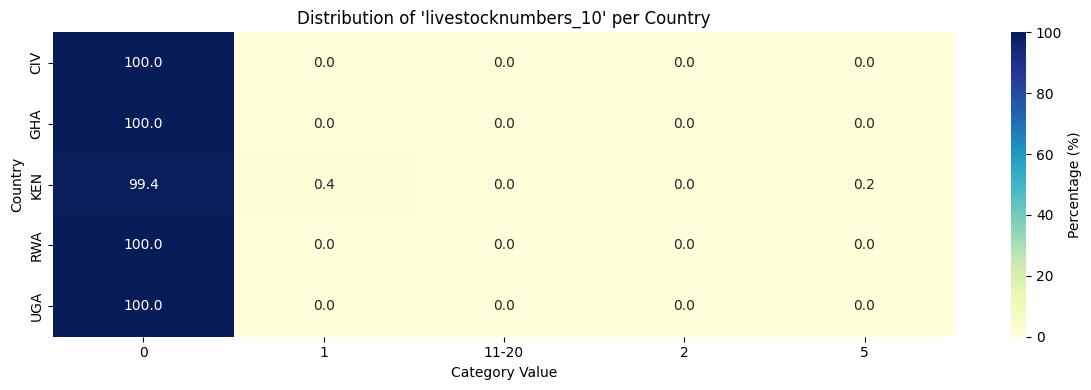

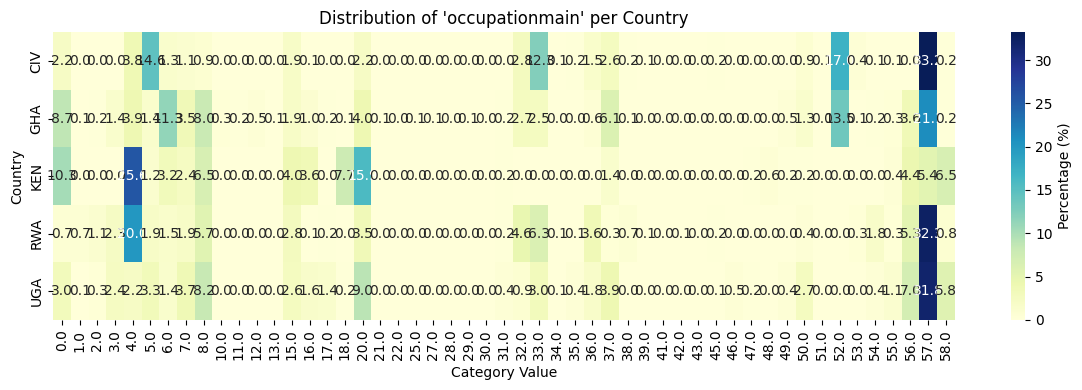

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['GHA', 'RWA', 'UGA', 'CIV', 'KEN']
categorical = [
    "fuelcooking", "sourcelighting", "watersource", "Toiletfacility",
    "materialroof", "materialfloor", "materialwallsext",
    *[f"HHMschoolcompl_{n}" for n in range(1, 6)],
    "schoolcompleted",
    *[f"livestocknumbers_{i}" for i in [1, 13, 3, 4, 5, 6, 11, 8, 9, 7, 2, 10]],
    "occupationmain"
]

for var in categorical:
    data_list = []

    for country in countries:
        df_country = df[df['Country'] == country]

        if df_country[var].notna().sum() == 0:
            continue  # Skip country if no valid data for this variable

        value_counts = df_country[var].value_counts(normalize=True).mul(100).round(1)
        for val, pct in value_counts.items():
            data_list.append({'Country': country, 'Value': val, 'Percentage': pct})

    if not data_list:
        print(f"⚠️ Skipping variable '{var}' (no data available)")
        continue

    plot_df = pd.DataFrame(data_list)

    try:
        heatmap_data = plot_df.pivot(index='Country', columns='Value', values='Percentage').fillna(0)

        plt.figure(figsize=(12, 4))
        sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Percentage (%)'})
        plt.title(f"Distribution of '{var}' per Country")
        plt.xlabel("Category Value")
        plt.ylabel("Country")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"❌ Could not plot '{var}': {e}")



In [35]:
df['livestocknumbers_6'].notna().sum()

np.int64(32338)

## Binary columns



In [36]:
# Voorbeeld: jouw DataFrame heet df_rwa
# En je lijst met binaire variabelen heet binary

# Maak een lege dictionary om de resultaten op te slaan
binary_counts = {}

# Doorloop elke variabele in de lijst
for var in binary:
    if var in df_rwa.columns:
        counts = df_rwa[var].value_counts(dropna=False).to_dict()
        binary_counts[var] = {
            'Aantal 1': counts.get(1, 0),
            'Aantal 2': counts.get(2, 0),
            'Aantal anders/missing': sum(v for k, v in counts.items() if k not in [1, 2])
        }

# Zet de resultaten om in een DataFrame
binary_counts_df = pd.DataFrame.from_dict(binary_counts, orient='index')
binary_counts_df.index.name = 'Variabele'
binary_counts_df.reset_index(inplace=True)

# Optioneel: sorteren op variabelenaam
binary_counts_df = binary_counts_df.sort_values(by='Variabele')

# Resultaat tonen
print(binary_counts_df)


           Variabele  Aantal 1  Aantal 2  Aantal anders/missing
10       HHMschool_1      3099      3338                   5334
11       HHMschool_2      5574       638                   5559
12       HHMschool_3      4730       308                   6733
13       HHMschool_4      2883       239                   8649
14       HHMschool_5      1456       195                  10120
15    HHMschoolnow_1      2604        28                   9139
16    HHMschoolnow_2      3857        70                   7844
17    HHMschoolnow_3      2381        89                   9301
18    HHMschoolnow_4      1026        96                  10649
19    HHMschoolnow_5       374        43                  11354
25  assetsmatrix1_22       639      5126                   6006
23   assetsmatrix1_4      6808        93                   4870
24   assetsmatrix1_5      6865        36                   4870
32  assetsmatrix2_11      9521       728                   1522
26  assetsmatrix2_15      4409      2404

In [37]:
binary_neg = [
    "debt", "foodsecurity1","foodsecurity2", "foodsecurity3", "foodsecurity4", "foodsecurity5",
    "foodsecurity6", "foodsecurity7", "foodsecurity8", "foodsecurity9", "childmortality",
    "jealousy", "assetsmatrix1_4", "assetsmatrix1_5", "assetsmatrix1_22", "assetsmatrix2_15",
    "assetsmatrix2_8", "assetsmatrix3_17", "assetsmatrix2_17",
    "assetsmatrix2_18", "assetsmatrix2_19", "assetsmatrix2_11",
    "assetsmatrix3_15", "assetsmatrix3_23"
]

binary_pos = [
    "HHMschoolnow_1", "HHMschoolnow_2", "HHMschoolnow_3",
    "HHMschoolnow_4", "HHMschoolnow_5",
    "school", "meetings1", "moneywithdraw", "moneyproblems"
]

In [38]:
# for benchmark_name, survey_df in benchmark_map.items():
#     # Bepaal de surveyronde van deze groep
#     survey_round = survey_df['survey_round'].iloc[0] if 'survey_round' in survey_df.columns else None

#     # Maak een indexnaam die overeenkomt met de rijen in je output-DataFrame
#     row_index = f"{benchmark_name} | round {survey_round}"

#     # Bereken per variabele het % 2-kiezers en voeg het toe aan de juiste rij en kolom
#     for col in binary_neg:
#         if col in survey_df.columns:
#             total = survey_df[col].isin([1, 2]).sum()
#             count_2 = (survey_df[col] == 2).sum()
#             if total > 0:
#                 mean_2 = count_2 / total
#             else:
#                 mean_2 = None  # of np.nan

#             # Voeg toe aan juiste rij & kolom
#             df_rwa.at[benchmark_name, col] = mean_2

In [39]:
# for benchmark_name, survey_df in benchmark_map.items():
#   for col in binary_neg:
#         total = df_rwa[col].isin([1, 2]).sum()
#         count_neg = (df_rwa[col] == 2).sum()
#         mean_neg = count_neg / total
#         df_rwa.at[benchmark_name, col] = mean_neg

# for benchmark_name, survey_df in benchmark_map.items():
#   for col in binary_pos:
#         total = df_rwa[col].isin([1, 2]).sum()
#         count_pos = (df_rwa[col] == 1).sum()
#         mean_pos = count_pos / total
#         df_rwa.at[benchmark_name, col] = mean_pos

In [40]:
# df_rwa.loc[benchmark_rows][binary_pos]

In [41]:
# df_rwa.loc[benchmark_rows][binary_neg]

In [42]:
## Binary columns (Proportion of a specific value, e.g., 2)

# Allereerst, zorg ervoor dat de binaire kolommen correct zijn geïnterpreteerd
# Soms worden ze als object/string ingelezen
for col in binary: # Gebruik de volledige lijst met binaire kolommen
    if col in df_rwa.columns:
        # Converteer naar numeriek, niet-converteerbare waardes worden NaN
        df_rwa[col] = pd.to_numeric(df_rwa[col], errors='coerce')

# Loop door de benchmark map om de proportie van '2' te berekenen voor binary_neg
for benchmark_name, survey_df in benchmark_map.items():
    # Voor elke kolom in de lijst van "negatieve" binaire variabelen
    for col in binary_neg:
        if col in survey_df.columns:
            # Selecteer de kolom voor de huidige ronde
            col_data = survey_df[col]

            # Bereken het aantal keer dat de waarde 2 voorkomt
            count_of_value = (col_data == 2).sum()

            # Bereken het totaal aantal geldige responsen (1 of 2)
            # Dit is belangrijk om de proportie correct te berekenen
            total_valid_responses = col_data.isin([1, 1.0, 2, 2.0]).sum()

            # Bereken de proportie (als er geldige responsen zijn)
            if total_valid_responses > 0:
                proportion_of_value = count_of_value / total_valid_responses
            else:
                proportion_of_value = np.nan # Zet op NaN als er geen geldige responsen zijn

            # Voeg de berekende proportie toe aan de juiste benchmark rij in df_rwa
            df_rwa.at[benchmark_name, col] = proportion_of_value

# Loop door de benchmark map om de proportie van '1' te berekenen voor binary_pos
# We gaan ervan uit dat voor binary_pos 1 het "positieve" antwoord is
for benchmark_name, survey_df in benchmark_map.items():
    for col in binary_pos:
        if col in survey_df.columns:
            col_data = survey_df[col]

            # Bereken het aantal keer dat de waarde 1 voorkomt
            count_of_value = (col_data == 1).sum()

            # Bereken het totaal aantal geldige responsen (1 of 2)
            total_valid_responses = col_data.isin([1, 1.0, 2, 2.0]).sum()

            # Bereken de proportie (als er geldige responsen zijn)
            if total_valid_responses > 0:
                proportion_of_value = count_of_value / total_valid_responses
            else:
                proportion_of_value = np.nan

            # Voeg de berekende proportie toe aan de juiste benchmark rij in df_rwa
            df_rwa.at[benchmark_name, col] = proportion_of_value


# Toon de benchmark rijen voor de binaire kolommen na de berekening
print("\nBenchmark resultaten per ronde voor binaire kolommen:")
display(df_rwa.loc[benchmark_rows, binary_neg])

display(df_rwa.loc[benchmark_rows, binary_pos])


Benchmark resultaten per ronde voor binaire kolommen:


/tmp/ipython-input-42-1417045232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rwa[col] = pd.to_numeric(df_rwa[col], errors='coerce')


,debt,foodsecurity1,foodsecurity2,foodsecurity3,foodsecurity4,foodsecurity5,foodsecurity6,foodsecurity7,foodsecurity8,foodsecurity9,...,assetsmatrix1_22,assetsmatrix2_15,assetsmatrix2_8,assetsmatrix3_17,assetsmatrix2_17,assetsmatrix2_18,assetsmatrix2_19,assetsmatrix2_11,assetsmatrix3_15,assetsmatrix3_23
benchmark_baseline,0.381337,0.145851,0.079212,0.083546,0.120285,0.231769,0.247276,0.313076,0.596815,0.726320,...,0.800783,0.262246,0.695893,0.023307,0.392641,0.709141,0.904894,0.029227,0.002220,0.002969
benchmark_phone_survey_1,0.250880,0.750739,0.105419,0.082759,0.534975,0.762562,0.763547,0.863054,0.962562,0.976355,...,0.925000,0.787500,0.825000,0.000000,0.000000,NaN,NaN,0.031165,0.000000,0.000000
benchmark_phone_survey_2,0.236231,0.616216,0.533333,0.524324,0.550450,0.723423,0.745045,0.810811,0.871171,0.908108,...,0.883094,0.321128,0.862754,0.019859,0.635234,0.860360,NaN,0.062879,0.002648,0.001801
benchmark_phone_survey_3,0.236119,0.933151,0.193724,0.151432,0.788540,0.956344,0.959072,0.982265,0.993179,0.997271,...,0.899023,0.885017,0.958153,0.002886,0.007194,NaN,NaN,0.094972,0.000000,0.000000
benchmark_endline,0.447514,0.886663,0.570120,0.560389,0.804808,0.947911,0.959359,0.975386,0.990269,0.997710,...,0.968153,0.312739,0.976243,0.070166,0.257485,0.249501,0.238523,0.118232,0.000000,0.000000
benchmark_post-program_survey_2,0.341463,0.815965,0.578714,0.584257,0.733925,0.883592,0.902439,0.943459,0.975610,0.980044,...,0.945676,0.307095,0.975610,0.084257,0.986133,0.987673,0.990755,0.107539,0.000000,0.000000


,HHMschoolnow_1,HHMschoolnow_2,HHMschoolnow_3,HHMschoolnow_4,HHMschoolnow_5,school,meetings1,moneywithdraw,moneyproblems
benchmark_baseline,0.985680,0.971706,0.962073,0.921348,0.917293,0.926632,NaN,NaN,NaN
benchmark_phone_survey_1,NaN,NaN,NaN,NaN,NaN,NaN,0.989634,0.991373,0.920000
benchmark_phone_survey_2,0.994220,0.985658,0.980088,0.917949,0.927536,0.936036,0.996090,0.989913,0.967048
benchmark_phone_survey_3,NaN,NaN,NaN,NaN,NaN,NaN,0.983077,0.995871,0.962836
benchmark_endline,0.987968,0.985433,0.968835,0.907781,0.900000,0.945434,0.998089,0.997006,0.998004
benchmark_post-program_survey_2,0.992410,0.990741,0.944785,0.910714,0.826667,0.937916,NaN,NaN,NaN


## Multiple choice columns

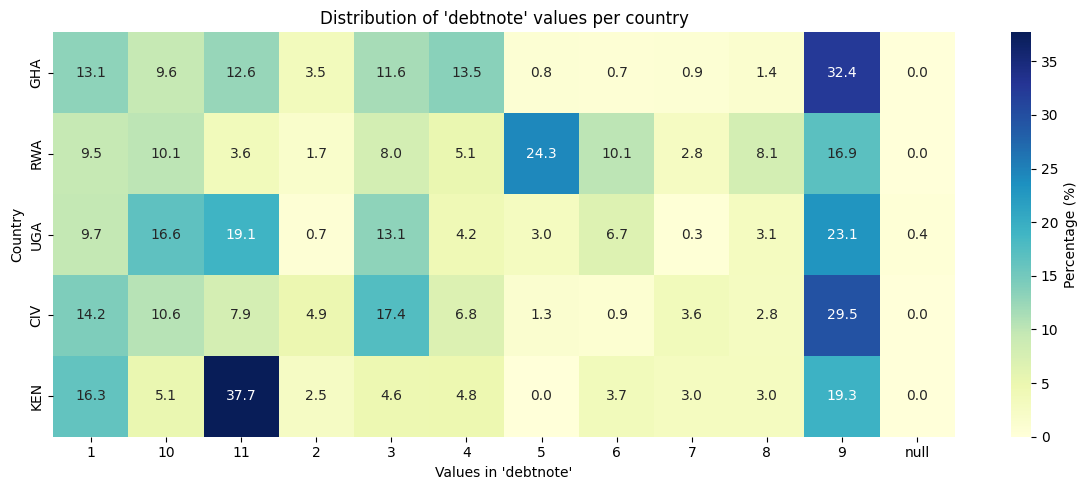

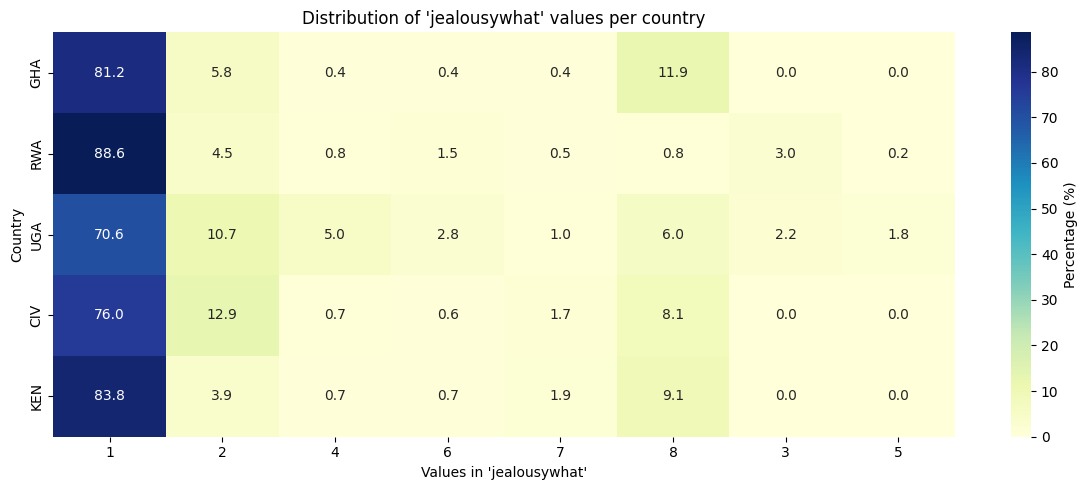

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Define countries and multiple-choice columns
countries = ['GHA', 'RWA', 'UGA', 'CIV', 'KEN']
multiple_choice = ['debtnote', 'jealousywhat']

# Loop over each multiple-choice column
for column in multiple_choice:
    country_counts = {}

    for country in countries:
        df_country = df[df['Country'] == country]
        selections = Counter()

        for entry in df_country[column].dropna():
            # Convert the entry to a string before splitting
            parts = str(entry).split("\\")  # use backslash as delimiter
            for part in parts:
                part = part.strip()
                if part:
                    # Attempt to convert to integer if it's a digit, but then convert back to string
                    try:
                        # Attempt to convert to integer if it's a digit
                        part_processed = int(float(part)) if part.replace('.', '', 1).isdigit() else part
                        # Convert to string to ensure consistent index type
                        part_processed_str = str(part_processed)
                    except ValueError:
                        # If conversion fails, keep the original string and convert to string
                        part_processed_str = str(part)
                    selections[part_processed_str] += 1 # Use the string version as the key

        # Convert to DataFrame
        # The index will now consistently contain strings
        count_df = pd.DataFrame.from_dict(selections, orient='index', columns=['count']).sort_index()

        if count_df.empty:
            print(f"⚠️ Skipping '{column}' for {country} — no valid data.")
            continue

        total = count_df['count'].sum()
        # Avoid division by zero if total is 0
        if total > 0:
            percentage_series = (count_df['count'] / total * 100).round(2)
        else:
            percentage_series = pd.Series([], dtype='float64') # Empty series if no data

        country_counts[country] = percentage_series

    # Combine into DataFrame (rows: countries, columns: selected values)
    # Use pd.concat to combine the country Series, handling different indices
    heatmap_df = pd.concat(country_counts, axis=1).T.fillna(0)

    if heatmap_df.empty:
        print(f"⚠️ Skipping '{column}' — no data across all countries.")
        continue

    # Plot
    plt.figure(figsize=(12, 5))
    sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage (%)'})
    plt.title(f"Distribution of '{column}' values per country")
    plt.xlabel(f"Values in '{column}'")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

In [ ]:
for country in countries:
    country_df = df[df['Country'] == country]
    rounds = country_df['Round'].unique()

    for round in rounds:
        print(f"Round: {round}")
        round_df = country_df[country_df['Round'] == round]
        outliers = find_multicat_outliers(round_df, 'Groupnr', ordered_categorical)
        print("Outlier groepen:", outliers)

# Individual parts


# Trend analytics

### Basics

Create a new dataframe for the growth analyzing and sorting it per Groupnr and Survey round


In [170]:
df_rwa[numerical].head(10)

,savinghowmuch_1,savinghowmuch_2,savinghowmuch_3,savingstotal_1,debtamount_1,timewatersource_1
14048,NaN,400.0,NaN,11200.0,70000.0,30.0
14049,NaN,250.0,NaN,2000.0,30000.0,40.0
14050,NaN,500.0,NaN,2000.0,10000.0,30.0
14051,NaN,500.0,NaN,2000.0,80000.0,10.0
14052,NaN,NaN,NaN,0.0,NaN,30.0
14053,NaN,NaN,NaN,0.0,NaN,20.0
14054,NaN,NaN,NaN,0.0,20000.0,40.0
14055,NaN,NaN,NaN,0.0,30000.0,20.0
14009,NaN,500.0,NaN,14000.0,100000.0,20.0
14056,0.0,1000.0,0.0,50000.0,250000.0,35.0


In [171]:
df_trends = df_rwa.copy()

In [172]:
df_trends[numerical].head()

,savinghowmuch_1,savinghowmuch_2,savinghowmuch_3,savingstotal_1,debtamount_1,timewatersource_1
14048,NaN,400.0,NaN,11200.0,70000.0,30.0
14049,NaN,250.0,NaN,2000.0,30000.0,40.0
14050,NaN,500.0,NaN,2000.0,10000.0,30.0
14051,NaN,500.0,NaN,2000.0,80000.0,10.0
14052,NaN,NaN,NaN,0.0,NaN,30.0


In [173]:
df_rwa['Groupnr'].unique()

array(['RWA067', 'RWA071', 'RWA068', 'RWA069', 'RWA129', 'RWA121',
       'RWA151', 'RWA143', 'RWA145', 'RWA152', 'RWA146', 'RWA148',
       'RWA147', 'RWA149', 'RWA150', 'RWA144', 'RWA141', 'RWA131',
       'RWA138', 'RWA135', 'RWA127', 'RWA125', 'RWA136', 'RWA132',
       'RWA128', 'RWA126', 'RWA124', 'RWA073', 'RWA070', 'RWA064',
       'RWA065', 'RWA101', 'RWA066', 'RWA104', 'RWA103', 'RWA106',
       'RWA077', 'RWA078', 'RWA108', 'RWA072', 'RWA075', 'RWA074',
       'RWA105', 'RWA076', 'RWA102', 'RWA153', 'RWA122', 'RWA061',
       'RWA058', 'RWA063', 'RWA062', 'RWA161', 'RWA163', 'RWA162',
       'RWA164', 'RWA098', 'RWA060', 'RWA059', 'RWA095', 'RWA094',
       'RWA093', 'RWA096', 'RWA117', 'RWA118', 'RWA120', 'RWA111',
       'RWA110', 'RWA109', 'RWA092', 'RWA119', 'RWA115', 'RWA114',
       'RWA116', 'RWA113', 'RWA097', 'RWA112', 'RWA139', 'RWA137',
       'RWA142', 'RWA134', 'RWA130', 'RWA140', 'RWA133', 'RWA079',
       'RWA123', 'RWA084', 'RWA083', 'RWA082', 'RWA086', 'RWA0

In [174]:
rwa_groups = ['RWA067', 'RWA071', 'RWA068', 'RWA069', 'RWA129', 'RWA121',
       'RWA151', 'RWA143', 'RWA145', 'RWA152', 'RWA146', 'RWA148',
       'RWA147', 'RWA149', 'RWA150', 'RWA144', 'RWA141', 'RWA131',
       'RWA138', 'RWA135', 'RWA127', 'RWA125', 'RWA136', 'RWA132',
       'RWA128', 'RWA126', 'RWA124', 'RWA073', 'RWA070', 'RWA064',
       'RWA065', 'RWA101', 'RWA066', 'RWA104', 'RWA103', 'RWA106',
       'RWA077', 'RWA078', 'RWA108', 'RWA072', 'RWA075', 'RWA074',
       'RWA105', 'RWA076', 'RWA102', 'RWA153', 'RWA122', 'RWA061',
       'RWA058', 'RWA063', 'RWA062', 'RWA161', 'RWA163', 'RWA162',
       'RWA164', 'RWA098', 'RWA060', 'RWA059', 'RWA095', 'RWA094',
       'RWA093', 'RWA096', 'RWA117', 'RWA118', 'RWA120', 'RWA111',
       'RWA110', 'RWA109', 'RWA092', 'RWA119', 'RWA115', 'RWA114',
       'RWA116', 'RWA113', 'RWA097', 'RWA112', 'RWA139', 'RWA137',
       'RWA142', 'RWA134', 'RWA130', 'RWA140', 'RWA133', 'RWA079',
       'RWA123', 'RWA084', 'RWA083', 'RWA082', 'RWA086', 'RWA085',
       'RWA080', 'RWA081', 'RWA107', 'RWA090', 'RWA089', 'RWA087',
       'RWA091', 'RWA088', 'RWA046', 'RWA045', 'RWA037', 'RWA040',
       'RWA043', 'RWA042', 'RWA044', 'RWA041', 'RWA156', 'RWA155',
       'RWA157', 'RWA100', 'RWA159', 'RWA049', 'RWA052', 'RWA053',
       'RWA051', 'RWA050', 'RWA047', 'RWA048', 'RWA024', 'RWA025',
       'RWA023', 'RWA154', 'RWA018', 'RWA021', 'RWA022', 'RWA019',
       'RWA020', 'RWA013', 'RWA012', 'RWA011', 'RWA015', 'RWA014',
       'RWA009', 'RWA010', 'RWA016', 'RWA017', 'RWA099', 'RWA032',
       'RWA036', 'RWA038', 'RWA034', 'RWA033', 'RWA031', 'RWA027',
       'RWA028', 'RWA026', 'RWA029', 'RWA030', 'RWA039', 'RWA035',
       'RWA057', 'RWA056', 'RWA054', 'RWA055', 'RWA160', 'RWA005',
       'RWA008', 'RWA007', 'RWA006', 'RWA004']

Checking if all columns are indeed completely numeric

In [175]:
import pandas as pd

df_types = pd.DataFrame({
    'column': df_trends.columns,
    'dtype': df_trends.dtypes.astype(str)
})
non_float = df_types[df_types['dtype'] != 'float64']

print("Columns that are not float64:")
print(non_float.to_string(index=False))

Columns that are not float64:
         column  dtype
        Groupnr object
          Round object
        Country object
schoolcompleted object
       debtnote object
   jealousywhat object


In [176]:
df_trends['schoolcompleted'] = pd.to_numeric(df_trends['schoolcompleted'], errors='coerce')


print(df_trends['schoolcompleted'].unique())

import pandas as pd

df_types = pd.DataFrame({
    'column': df_trends.columns,
    'dtype': df_trends.dtypes.astype(str)
})
non_float = df_types[df_types['dtype'] != 'float64']

print("\nColumns that are not float64:")
print(non_float.to_string(index=False))

[-88.   2.   1. -99.  nan   5.   3.   4.   6.]

Columns that are not float64:
      column  dtype
     Groupnr object
       Round object
     Country object
    debtnote object
jealousywhat object


In [177]:
df_trends['schoolcompleted'].unique()

array([-88.,   2.,   1., -99.,  nan,   5.,   3.,   4.,   6.])

### Numerical + Ordered categorical variables

In [178]:
variables = numerical + ordered_categorical

In [179]:
df_group_avg = df_trends.groupby(['Groupnr', 'Round'])[variables].mean().reset_index()

df_group_avg['Round'] = df_group_avg['Round'].astype(int)
df_group_avg = df_group_avg.sort_values(by=['Groupnr', 'Round']).reset_index(drop=True)

In [180]:
df_group_avg[numerical].head()


,savinghowmuch_1,savinghowmuch_2,savinghowmuch_3,savingstotal_1,debtamount_1,timewatersource_1
0,1470.000000,8278.947368,NaN,NaN,56130.000000,NaN
1,1433.333333,2393.333333,0.0,NaN,39657.142857,22.235294
2,3640.000000,8690.000000,500.0,NaN,58214.285714,NaN
3,6107.142857,2414.285714,0.0,NaN,32571.428571,NaN
4,4383.833333,1143.750000,0.0,NaN,46406.250000,17.105263


In [181]:
df_group_avg[ordered_categorical].head()

,foodsecurity1freq,foodsecurity2freq,foodsecurity3freq,foodsecurity4freq,foodsecurity5freq,foodsecurity6freq,foodsecurity7freq,foodsecurity8freq,foodsecurity9freq,anxiety1,anxiety2,anxiety3,anxiety4,anxiety5,anxiety6,anxiety7,psychwellbeing_1,psychwellbeing_3,psychwellbeing_5,psychwellbeing2_5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.941176,2.117647,1.666667,1.666667,1.500000,1.666667,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.823529,1.823529,2.823529,1.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.947368,1.842105,2.315789,NaN
4,2.1,2.000000,2.052632,1.818182,1.888889,1.857143,2.000000,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.684211,1.210526,2.578947,1.368421


In [182]:
df_group_avg[variables].head()

,savinghowmuch_1,savinghowmuch_2,savinghowmuch_3,savingstotal_1,debtamount_1,timewatersource_1,foodsecurity1freq,foodsecurity2freq,foodsecurity3freq,foodsecurity4freq,...,anxiety2,anxiety3,anxiety4,anxiety5,anxiety6,anxiety7,psychwellbeing_1,psychwellbeing_3,psychwellbeing_5,psychwellbeing2_5
0,1470.000000,8278.947368,NaN,NaN,56130.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1433.333333,2393.333333,0.0,NaN,39657.142857,22.235294,2.0,1.941176,2.117647,1.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,1.823529,1.823529,2.823529,1.000000
2,3640.000000,8690.000000,500.0,NaN,58214.285714,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6107.142857,2414.285714,0.0,NaN,32571.428571,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.947368,1.842105,2.315789,NaN
4,4383.833333,1143.750000,0.0,NaN,46406.250000,17.105263,2.1,2.000000,2.052632,1.818182,...,NaN,NaN,NaN,NaN,NaN,NaN,1.684211,1.210526,2.578947,1.368421


Adding column representing the concrete growth and percentual growth between survey rounds

In [183]:
# growth_cols = []
# pct_growth_cols = []


# for var in variables:
#     df_group_avg[f'{var}_growth'] = df_group_avg.groupby('Groupnr')[var].diff()
#     df_group_avg[f'{var}_pct_growth'] = df_group_avg.groupby('Groupnr')[var].pct_change() * 100
#     growth_cols.append(f'{var}_growth')
#     pct_growth_cols.append(f'{var}_pct_growth')

In [184]:
df_group_avg[df_group_avg['Groupnr'] == 'RWA090']

,Groupnr,Round,savinghowmuch_1,savinghowmuch_2,savinghowmuch_3,savingstotal_1,debtamount_1,timewatersource_1,foodsecurity1freq,foodsecurity2freq,...,anxiety2,anxiety3,anxiety4,anxiety5,anxiety6,anxiety7,psychwellbeing_1,psychwellbeing_3,psychwellbeing_5,psychwellbeing2_5
442,RWA090,0,1000.000000,371.428571,NaN,3975.0,23925.000000,21.10,2.4,2.4,...,NaN,NaN,NaN,NaN,NaN,NaN,2.10,1.70,2.60,1.50
443,RWA090,1,942.857143,4500.000000,0.0,31450.0,32125.000000,17.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.55,1.00,3.00,NaN
444,RWA090,2,1500.000000,8447.500000,NaN,73977.5,60000.000000,17.25,1.0,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.40,1.25,2.65,1.05
445,RWA090,3,1200.000000,6655.000000,0.0,78330.0,42105.263158,NaN,NaN,NaN,...,NaN,1.5,NaN,NaN,NaN,NaN,1.55,1.45,2.40,1.30
446,RWA090,100,2450.000000,2985.000000,0.0,52390.0,43928.571429,17.25,NaN,NaN,...,1.15,1.4,1.2,1.2,1.3,1.35,1.35,1.15,2.30,1.15


Met deze code wordt bij ontbrekende ronde-t-scores (NaN) de groei overgeslagen, maar zodra een groep wél weer een waarde heeft in ronde t, wordt de groei berekend ten opzichte van de vorige beschikbare ronde. Daarna kun je precies dezelfde IQR-detectie en plotting zoals voorheen blijven gebruiken, maar nu inclusief de “sprongen” over missende rondes heen.

If a group has data in Round 1 and Round 3 but NaN in Round 2, then in the Round 3 row you’ll get
growth = value(3) – value(1),
instead of NaN.

The Round 2 row remains NaN (we masked it), so you don’t accidentally interpret a 0-growth there.



In [185]:
# for var in numerical:
#     ffilled = df_group_avg.groupby('Groupnr')[var].ffill()
#     df_group_avg[f'{var}_growth'] = (
#         ffilled
#         .groupby(df_group_avg['Groupnr'])
#         .diff()
#     )
#     df_group_avg[f'{var}_pct_growth'] = (
#         ffilled
#         .groupby(df_group_avg['Groupnr'])
#         .pct_change(fill_method=None) * 100
#     )
#     mask = df_group_avg[var].isna()
#     df_group_avg.loc[mask, [f'{var}_growth', f'{var}_pct_growth']] = np.nan



In first instance there was a problem since the growth was not measured between for example rounds 1 and 3 if there was a missing value in round 2. This problem is solved by using forward-fill to measure the growth between rounds 1 and 3 and put it on growth for round 3. However, now there are still missing values in growth (in the example the growth of round two is missing) and when we compare the growth for outlier detection, it is not fair to compare the average growth between round 2 and 3 to the growth between round 1 and 3 that is calculated by the forward fill. Instead, we can use interpolation to seperate the growth over the rounds when there are missing values. The standard method is linear, meaning that if round 1 and 3 are known (round 2 is unknown) the growth between round 1 and 3 is seperated between var_growth of round 2 and of round 3. It gives more consistency for the existence of datapoints of the middle rounds in the growth columns. Only the middle rounds since limit_area is put on 'inside', we do not want to guess growth if the last/first value is NaN (or if a sequence only has one value).

In [186]:
def add_linear_growth(df: pd.DataFrame, variables: list[str] | None = None) -> pd.DataFrame:

    df_out = df.copy()
    df_out.sort_values(['Groupnr', 'Round'], inplace=True)

    if variables is None:
        variables = [
            col for col, dt in df_out.dtypes.items()
            if dt in ('float64','int64') and col not in ('Round',)
        ]

    for var in variables:
        interp = df_out.groupby('Groupnr')[var] \
                       .transform(lambda s: s.interpolate(method='linear', limit_area=None))

        growth_col = f"{var}_growth"
        pct_col    = f"{var}_pct_growth"

        df_out[growth_col] = interp.groupby(df_out['Groupnr']).diff()
        df_out[pct_col]    = interp.groupby(df_out['Groupnr']).pct_change(fill_method=None) * 100

    return df_out


Since some groups do not have all rounds (survey was not taken every time in the past), the interpolation does not always work. Therefor a new function is necessary that adds 'dummy' rows to ensure every group has all rounds as row and to ensure the interpolation is possible in the new growth columns.

In [187]:
import pandas as pd

def add_linear_growth(
    df: pd.DataFrame,
    variables: list[str] | None = None,
    rounds: list[int] = [0,1,2,3,100,102]
) -> pd.DataFrame:
    """
    Like your original add_linear_growth, but first ensures that
    each Groupnr has exactly the given `rounds`.  Missing-round
    rows get NaNs in the original vars, then we interpolate _between_
    the two known endpoints (limit_area='inside') and compute growth.

    Parameters:
    - df: must contain columns 'Groupnr', 'Round', plus the `variables`
    - variables: list of numeric columns to compute growth on; if None,
                 automatically picks all int/float cols except 'Round'
    - rounds: the FULL sequence of survey codes to force into each group
    """
    # 1) pick variables if not provided
    df_out = df.copy()
    if variables is None:
        variables = [
            c for c,t in df_out.dtypes.items()
            if t in ('float64','int64') and c not in ('Round',)
        ]

    # 2) build a complete MultiIndex
    all_groups = df_out['Groupnr'].unique()
    full_idx = pd.MultiIndex.from_product(
        [all_groups, rounds],
        names=['Groupnr','Round']
    )

    # 3) reindex to that full grid
    df_full = (
        df_out
        .set_index(['Groupnr','Round'])
        .reindex(full_idx)
        .sort_index()
        .reset_index()
    )

    # 4) now do your inside‐only interpolation + growth
    for var in variables:
        # interpolate only interior NaNs
        interp = (
            df_full
            .groupby('Groupnr')[var]
            .transform(lambda s: s.interpolate(method='linear', limit_area='inside'))
        )
        # absolute and pct growth
        df_full[f"{var}_growth"]     = interp.groupby(df_full['Groupnr']).diff()
        df_full[f"{var}_pct_growth"] = interp.groupby(df_full['Groupnr']).pct_change(fill_method=None)*100

    return df_full


Problem with the add_linear_growth function is that not all groups have had all rounds, which causes the same problem with the unfair comparison in the outlier detection, and the interpolation for round 100 is not realistic, since round 3 is 25 weeks apart with round 100, while round 100 is 50 weeks apart with round 102. So first this function chechks if there is a instance where a group has NaN for round 100 and a value for round 102, which would cause a unfair interpolation.

In [188]:
for var in variables:
    df100 = df_trends[df_trends['Round'] == 100][['Groupnr', var]]
    df102 = df_trends[df_trends['Round'] == 102][['Groupnr', var]]

    merged = pd.merge(
        df100,
        df102,
        on='Groupnr',
        how='inner',
        suffixes=('_100', '_102')
    )

    col_100 = f"{var}_100"
    col_102 = f"{var}_102"

    problem_groups = merged[
        merged[col_100].isna() &
        merged[col_102].notna()
    ]['Groupnr'].unique()

    print(f"Groups without a value for round 100, that do have a value for round 102 for variable {var}:", problem_groups)


Groups without a value for round 100, that do have a value for round 102 for variable savinghowmuch_1: []
Groups without a value for round 100, that do have a value for round 102 for variable savinghowmuch_2: []
Groups without a value for round 100, that do have a value for round 102 for variable savinghowmuch_3: []
Groups without a value for round 100, that do have a value for round 102 for variable savingstotal_1: []
Groups without a value for round 100, that do have a value for round 102 for variable debtamount_1: []
Groups without a value for round 100, that do have a value for round 102 for variable timewatersource_1: []
Groups without a value for round 100, that do have a value for round 102 for variable foodsecurity1freq: []
Groups without a value for round 100, that do have a value for round 102 for variable foodsecurity2freq: []
Groups without a value for round 100, that do have a value for round 102 for variable foodsecurity3freq: []
Groups without a value for round 100, that

In [189]:
df_growth = add_linear_growth(df_group_avg)

In [190]:
df_growth[df_growth['Groupnr'] == 'RWA090']

,Groupnr,Round,savinghowmuch_1,savinghowmuch_2,savinghowmuch_3,savingstotal_1,debtamount_1,timewatersource_1,foodsecurity1freq,foodsecurity2freq,...,anxiety7_growth,anxiety7_pct_growth,psychwellbeing_1_growth,psychwellbeing_1_pct_growth,psychwellbeing_3_growth,psychwellbeing_3_pct_growth,psychwellbeing_5_growth,psychwellbeing_5_pct_growth,psychwellbeing2_5_growth,psychwellbeing2_5_pct_growth
516,RWA090,0,1000.000000,371.428571,NaN,3975.0,23925.000000,21.10,2.4,2.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,RWA090,1,942.857143,4500.000000,0.0,31450.0,32125.000000,17.60,NaN,NaN,...,NaN,NaN,-0.55,-26.190476,-0.70,-41.176471,0.40,15.384615,-0.225,-15.000000
518,RWA090,2,1500.000000,8447.500000,NaN,73977.5,60000.000000,17.25,1.0,1.5,...,NaN,NaN,-0.15,-9.677419,0.25,25.000000,-0.35,-11.666667,-0.225,-17.647059
519,RWA090,3,1200.000000,6655.000000,0.0,78330.0,42105.263158,NaN,NaN,NaN,...,NaN,NaN,0.15,10.714286,0.20,16.000000,-0.25,-9.433962,0.250,23.809524
520,RWA090,100,2450.000000,2985.000000,0.0,52390.0,43928.571429,17.25,NaN,NaN,...,NaN,NaN,-0.20,-12.903226,-0.30,-20.689655,-0.10,-4.166667,-0.150,-11.538462
521,RWA090,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


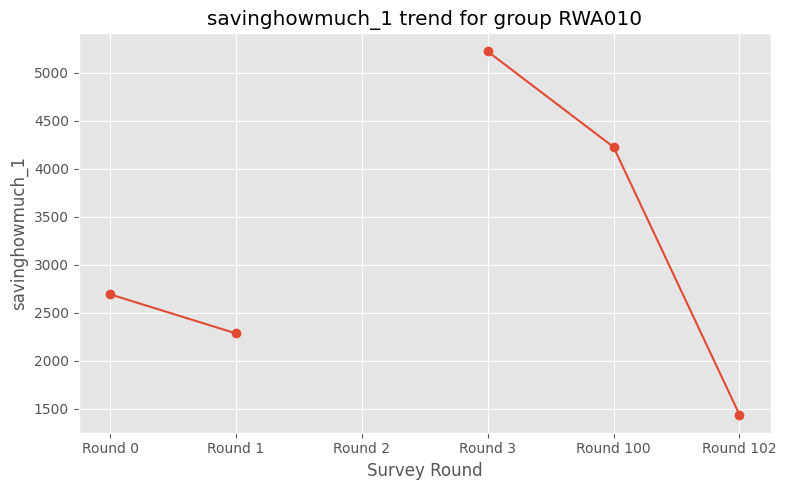

In [191]:
import matplotlib.pyplot as plt

group = 'RWA010'
var = 'savinghowmuch_1'

subset = df_growth[df_growth['Groupnr'] == group].copy()

subset['RoundLabel'] = 'Round ' + subset['Round'].astype(str)

plt.figure(figsize=(8, 5))
plt.plot(subset['RoundLabel'], subset[var], marker='o', linestyle='-')

plt.title(f'{var} trend for group {group}')
plt.xlabel('Survey Round')
plt.ylabel(var)
plt.grid(True)
plt.tight_layout()
plt.show()

In [192]:
#!pip install xlsxwriter

### Plot functions

#### Plot functions for the raw data

In [193]:
def plot_groups_vs_overall(df, groups, variables):
    cmap = plt.colormaps['tab10']
    for var in variables:
        plt.figure(figsize=(8,5))
        overall = df.groupby('Round')[var].mean().reset_index()
        overall['RoundLabel'] = 'Round ' + overall['Round'].astype(str)
        plt.plot(overall['RoundLabel'], overall[var], marker='o', linestyle='-', color='orange', label='Overall average')
        for i, grp in enumerate(groups):
            sub = df[df['Groupnr']==grp].copy()
            if sub.empty: continue
            sub.loc[:, 'RoundLabel'] = 'Round ' + sub['Round'].astype(str)
            color = cmap(i % cmap.N)
            plt.plot(sub['RoundLabel'], sub[var], marker='o', linestyle='-', color=color, label=f'Group {grp}')
        plt.title(f'{var} trends: groups vs overall')
        plt.xlabel('Survey Round'); plt.ylabel(var)
        plt.grid(True); plt.xticks(rotation=45); plt.legend(); plt.tight_layout()
        plt.show()

Mooier design


In [194]:
import matplotlib.pyplot as plt

def plot_groups_vs_overall(df, groups, variables):
    plt.style.use('ggplot')
    cmap = plt.colormaps['tab10']

    for var in variables:
        fig, ax = plt.subplots(figsize=(10, 6), dpi=120)

        overall = df.groupby('Round')[var].mean().reset_index()
        overall['RoundLabel'] = 'Round ' + overall['Round'].astype(str)
        ax.plot(overall['RoundLabel'], overall[var],
                marker='o', markersize=8, linewidth=2,
                color='orange', label='Overall average')

        for i, grp in enumerate(groups):
            sub = df[df['Groupnr']==grp].copy()
            if sub.empty:
                continue
            sub['RoundLabel'] = 'Round ' + sub['Round'].astype(str)

            ax.plot(sub['RoundLabel'], sub[var],
                    marker='s', markersize=6, linewidth=1.5,
                    color=cmap(i % cmap.N),
                    label=f'Group {grp}')

        ax.set_title(f'{var} trend for groups vs overall', fontsize=16, pad=12)
        ax.set_xlabel('Survey Round', fontsize=14, labelpad=8)
        ax.set_ylabel(var, fontsize=14, labelpad=8)
        ax.tick_params(axis='x', labelrotation=45, labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.grid(alpha=0.3)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.legend(title='Groups', fontsize=10, title_fontsize=12,
                  loc='upper left', bbox_to_anchor=(1.02, 1))

        plt.tight_layout()
        plt.show()


Andere bennaming rondes

In [195]:
import matplotlib.pyplot as plt

def plot_groups_vs_overall(df, groups, variables):
    round_labels_map = {
        0: 'Baseline',
        1: 'Phone survey 1',
        2: 'Phone survey 2',
        3: 'Phone survey 3',
        100: 'Endline',
        102: 'Post-program survey'
    }
    plt.style.use('ggplot')
    cmap = plt.colormaps['tab10']
import matplotlib.pyplot as plt

def plot_groups_vs_overall(df, groups, variables):
    round_labels_map = {
        0: 'Baseline',
        1: 'Phone survey 1',
        2: 'Phone survey 2',
        3: 'Phone survey 3',
        100: 'Endline',
        102: 'Post-program survey'
    }
    plt.style.use('ggplot')
    cmap = plt.colormaps['tab10']

    for var in variables:
        fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
        overall = df.groupby('Round')[var].mean().reset_index()
        overall['RoundLabel'] = overall['Round'].map(round_labels_map)
        ax.plot(overall['RoundLabel'], overall[var], linestyle='--',
                marker='o', markersize=8, linewidth=2 , label='Overall average')

        for i, grp in enumerate(groups):
            sub = df[df['Groupnr'] == grp].copy()
            if sub.empty:
                continue
            sub['RoundLabel'] = sub['Round'].map(round_labels_map)
            ax.plot(sub['RoundLabel'], sub[var],
                    marker='s', markersize=6, linewidth=1.5,
                    color=cmap(i % cmap.N),
                    label=f'Group {grp}')

        ax.set_title(f'{var} trend for groups vs overall', fontsize=16, pad=12)
        ax.set_xlabel('Survey Round', fontsize=14, labelpad=8)
        ax.set_ylabel(var, fontsize=14, labelpad=8)
        ax.tick_params(axis='x', labelrotation=45, labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.grid(alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.legend(title='Groups', fontsize=10, title_fontsize=12,
                  loc='upper left', bbox_to_anchor=(1.02, 1))

        plt.tight_layout()
        plt.show()
        ax.plot(overall['RoundLabel'], overall[var], linestyle='--',
                marker='o', markersize=8, linewidth=2 , label='Overall average')

        for i, grp in enumerate(groups):
            sub = df[df['Groupnr'] == grp].copy()
            if sub.empty:
                continue
            sub['RoundLabel'] = sub['Round'].map(round_labels_map)
            ax.plot(sub['RoundLabel'], sub[var],
                    marker='s', markersize=6, linewidth=1.5,
                    color=cmap(i % cmap.N),
                    label=f'Group {grp}')

        ax.set_title(f'{var} trend for groups vs overall', fontsize=16, pad=12)
        ax.set_xlabel('Survey Round', fontsize=14, labelpad=8)
        ax.set_ylabel(var, fontsize=14, labelpad=8)
        ax.tick_params(axis='x', labelrotation=45, labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.grid(alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.legend(title='Groups', fontsize=10, title_fontsize=12,
                  loc='upper left', bbox_to_anchor=(1.02, 1))

        plt.tight_layout()
        plt.show()


Adding dotted line when there is a missing value

In [196]:
import matplotlib.pyplot as plt

def plot_groups_vs_overall(df, groups, variables):
    # 1) canonical order & labels
    round_order = [0, 1, 2, 3, 100, 102]
    labels = {
        0: 'Baseline',
        1: 'Phone survey 1',
        2: 'Phone survey 2',
        3: 'Phone survey 3',
        100: 'Endline',
        102: 'Post-program survey'
    }
    label_list = [labels[r] for r in round_order]

    # 2) ensure integer
    df = df.copy()
    df['Round'] = df['Round'].astype(int)

    plt.style.use('ggplot')
    cmap = plt.colormaps['tab10']

    for var in variables:
        fig, ax = plt.subplots(figsize=(10, 6), dpi=120)

        # --- overall average dashed line
        overall = (
            df.groupby('Round')[var]
              .mean()
              .reindex(round_order)     # keep full order
              .reset_index()
        )
        overall['lbl'] = overall['Round'].map(labels)
        ax.plot(overall['lbl'], overall[var],
                linestyle='--', marker='o', color='tab:red',
                linewidth=2, markersize=8, label='Overall average')

        # --- per group
        for i, grp in enumerate(groups):
            sub = df[df['Groupnr'] == grp][['Round', var]].dropna()
            if sub.empty:
                continue

            # sorted list of (round, val)
            pts = sorted(zip(sub['Round'], sub[var]), key=lambda x: round_order.index(x[0]))
            rounds, vals = zip(*pts)
            lbls = [labels[r] for r in rounds]

            # connect point-to-point
            for j in range(1, len(rounds)):
                r0, r1 = rounds[j-1], rounds[j]
                x = [labels[r0], labels[r1]]
                y = [vals[j-1], vals[j]]
                idx0 = round_order.index(r0)
                idx1 = round_order.index(r1)
                style = '-' if (idx1 - idx0 == 1) else 'dotted'
                ax.plot(x, y, linestyle=style,
                        color=cmap(i), linewidth=1.5)

            # scatter the actual points
            ax.scatter(lbls, vals,
                       marker='s', s=50,
                       color=cmap(i), label=f'Group {grp}')

        # --- styling
        ax.set_title(f'{var} trend for groups vs overall', fontsize=16, pad=12)
        ax.set_xlabel('Survey Round', fontsize=14, labelpad=8)
        ax.set_ylabel(var, fontsize=14, labelpad=8)
        ax.set_xticks(label_list)
        ax.set_xticklabels(label_list, rotation=45, ha='right')
        ax.grid(alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
        plt.tight_layout()
        plt.show()


In [283]:
import matplotlib.pyplot as plt

def plot_groups_vs_overall(df, groups, variables):
    # Canonical round order and labels
    round_order = [0, 1, 2, 3, 100, 102]
    labels = {
        0: 'Baseline',
        1: 'Phone survey 1',
        2: 'Phone survey 2',
        3: 'Phone survey 3',
        100: 'Endline',
        102: 'Post-program survey'
    }
    label_list = [labels[r] for r in round_order]

    df = df.copy()
    df['Round'] = df['Round'].astype(int)

    plt.style.use('ggplot')
    cmap = plt.colormaps['tab10']

    for var in variables:
        fig, ax = plt.subplots(figsize=(10, 6), dpi=120)

        # Compute IQR band
        grouped = df.groupby('Round')[var]
        q1 = grouped.quantile(0.25).reindex(round_order)
        q3 = grouped.quantile(0.75).reindex(round_order)
        iqr_lower = (q1 - 1.5 * (q3 - q1)).values
        iqr_upper = (q3 + 1.5 * (q3 - q1)).values
        x_labels = [labels[r] for r in round_order]

        # Plot IQR band
        ax.fill_between(x_labels, iqr_lower, iqr_upper, color='grey', alpha=0.3, label='IQR band (±1.5×)')
        ax.plot(x_labels, iqr_lower, color='black', linewidth=1, label='IQR lower')
        ax.plot(x_labels, iqr_upper, color='black', linewidth=1, label='IQR upper')

        # Overall average line
        overall = (
            df.groupby('Round')[var]
              .mean()
              .reindex(round_order)
              .reset_index()
        )
        overall['lbl'] = overall['Round'].map(labels)
        ax.plot(overall['lbl'], overall[var],
                linestyle='--', marker='o', color='tab:red',
                linewidth=2, markersize=8, label='Overall average')

        # Plot each group's trend
        for i, grp in enumerate(groups):
            sub = df[df['Groupnr'] == grp][['Round', var]].dropna()
            if sub.empty:
                continue

            pts = sorted(zip(sub['Round'], sub[var]), key=lambda x: round_order.index(x[0]))
            rounds, vals = zip(*pts)
            lbls = [labels[r] for r in rounds]

            for j in range(1, len(rounds)):
                r0, r1 = rounds[j-1], rounds[j]
                x = [labels[r0], labels[r1]]
                y = [vals[j-1], vals[j]]
                idx0 = round_order.index(r0)
                idx1 = round_order.index(r1)
                style = '-' if (idx1 - idx0 == 1) else 'dotted'
                ax.plot(x, y, linestyle=style, color=cmap(i), linewidth=1.5)

            ax.scatter(lbls, vals, marker='s', s=50, color=cmap(i), label=f'Group {grp}')

        ax.set_title(f'Original data of {var} for {grp} vs overall', fontsize=16, pad=12)
        ax.set_xlabel('Survey Round', fontsize=14, labelpad=8)
        ax.set_ylabel(var, fontsize=14, labelpad=8)
        ax.set_xticks(label_list)
        ax.set_xticklabels(label_list, rotation=45, ha='right')
        ax.grid(alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
        plt.tight_layout()
        plt.show()


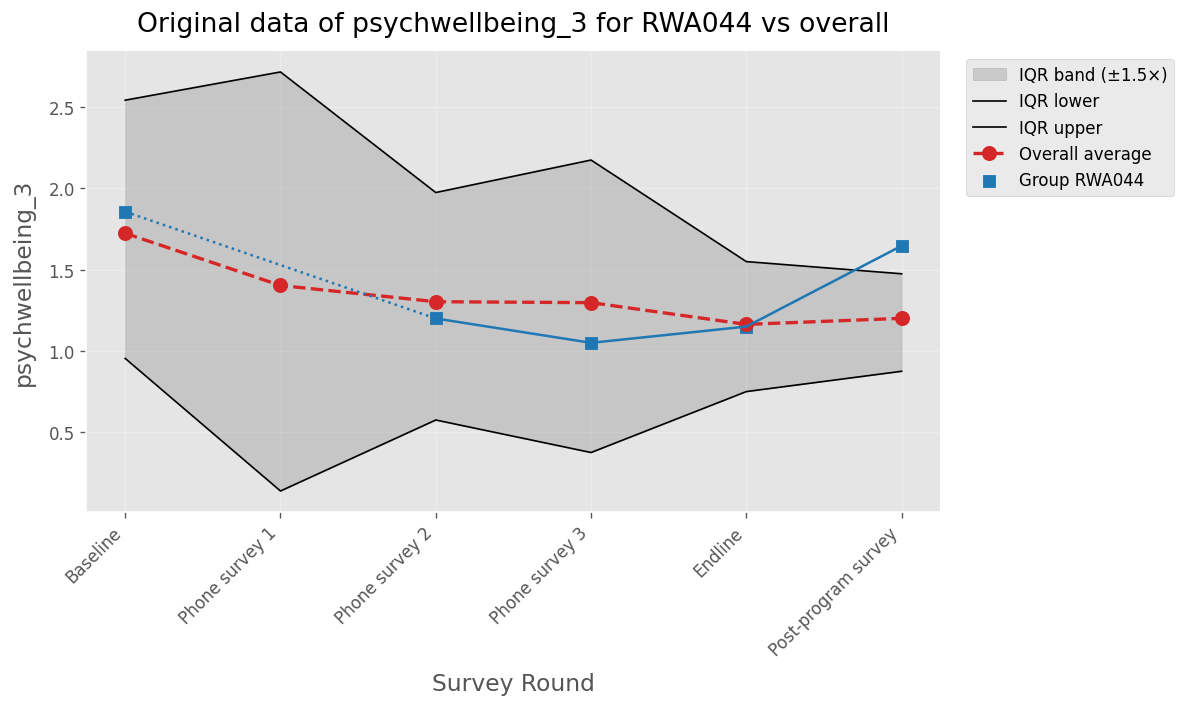

In [284]:
plot_groups_vs_overall(df_growth, ['RWA044'], ['psychwellbeing_3'])

#### Plot functions for the growth data

In [197]:
import matplotlib.pyplot as plt

def growth_plot(df, groups, variables):
    """
    For each var in `variables`, plots:
      - Grey-shaded IQR band (±1.5×IQR) and its boundary lines
      - Dotted red line = overall mean growth per round
      - Each group's growth trajectory (solid between true neighbors, dotted for gaps)
    """
    # 1) canonical rounds & labels
    round_order = [0, 1, 2, 3, 100, 102]
    round_labels = {
        0:  'Baseline',
        1:  'Phone survey 1',
        2:  'Phone survey 2',
        3:  'Phone survey 3',
        100:'Endline',
        102:'Post-program survey'
    }
    x_pos = list(range(len(round_order)))
    x_labels = [round_labels[r] for r in round_order]

    # ensure Round is int
    df = df.copy()
    df['Round'] = df['Round'].astype(int)

    plt.style.use('ggplot')
    cmap = plt.colormaps['tab10']

    for var in variables:
        growth_col = var + '_growth'
        if growth_col not in df.columns:
            print(f"No growth column for {var}, skipping.")
            continue

        # 2) Compute IQR per round
        stats = (
            df.groupby('Round')[growth_col]
              .agg(Q1=lambda x: x.quantile(0.25),
                   Q3=lambda x: x.quantile(0.75))
              .reindex(round_order)
        )
        stats['IQR']   = stats['Q3'] - stats['Q1']
        stats['lower'] = stats['Q1'] - 1.5 * stats['IQR']
        stats['upper'] = stats['Q3'] + 1.5 * stats['IQR']

        # 3) Compute overall mean growth
        overall = (
            df.groupby('Round')[growth_col]
              .mean()
              .reindex(round_order)
        )

        fig, ax = plt.subplots(figsize=(10,6), dpi=120)

        # 4) Shade IQR region
        ax.fill_between(
            x_pos,
            stats['lower'],
            stats['upper'],
            color='gray',
            alpha=0.3,
            label='IQR band (±1.5×)'
        )
        # Plot IQR edges
        ax.plot(x_pos, stats['lower'], color='black', lw=1.5, label='IQR lower')
        ax.plot(x_pos, stats['upper'], color='black', lw=1.5, label='IQR upper')

        # 5) Plot overall average (dotted red)
        ax.plot(
            x_pos, overall,
            linestyle=':', marker='o', color='red',
            lw=2, markersize=8,
            label='Avg growth'
        )

        # 6) Plot each group
        for i, grp in enumerate(groups):
            sub = (
                df[df['Groupnr'] == grp]
                  [['Round', growth_col]]
                  .dropna()
                  .query("Round in @round_order")
            )
            if sub.empty:
                continue

            # sort by our canonical order
            sub = sub.set_index('Round').reindex(round_order).dropna().reset_index()
            rs = sub['Round'].tolist()
            ys = sub[growth_col].tolist()
            xs = [round_order.index(r) for r in rs]

            # connect point-to-point
            for j in range(1, len(xs)):
                dx = xs[j] - xs[j-1]
                style = '-' if dx == 1 else 'dotted'
                ax.plot(
                    [xs[j-1], xs[j]],
                    [ys[j-1], ys[j]],
                    linestyle=style,
                    color=cmap(i),
                    lw=1.5
                )

            # scatter markers
            ax.scatter(
                xs, ys,
                marker='s', s=60,
                color=cmap(i),
                label=f'Group {grp}'
            )

        # 7) Final styling
        ax.set_xticks(x_pos)
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.set_xlabel('Survey Round')
        ax.set_ylabel(f'{var} growth (absolute Δ)')
        ax.set_title(f'Growth outliers: {var}', fontsize=16, pad=12)
        ax.grid(alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
        plt.tight_layout()
        plt.show()


### Basic outlier detection

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def outlier_growth(df, groups, variables):
    for var in variables:
        growth_col = var + '_growth'
        if growth_col not in df.columns:
            print(f"No column {growth_col} found.")
            continue

        # 1) compute IQR thresholds per round
        stats = df.groupby('Round')[growth_col].agg(
            Q1=lambda x: x.quantile(0.25),
            Q3=lambda x: x.quantile(0.75)
        ).reset_index()
        stats['IQR']   = stats['Q3'] - stats['Q1']
        stats['lower'] = stats['Q1'] - 1.5 * stats['IQR']
        stats['upper'] = stats['Q3'] + 1.5 * stats['IQR']

        # 2) merge thresholds back on
        df_stats = df.merge(stats, on='Round', how='left')

        print(f"\n- Outliers for {growth_col} per round -")
        flagged_groups = set()

        # 3) detect outliers
        for grp in groups:
            sub = df_stats[df_stats['Groupnr'] == grp]
            for _, row in sub.iterrows():
                val = row[growth_col]
                if pd.isna(val):
                    continue
                if val < row['lower']:
                    print(f"Group {grp}, Round {row['Round']}: NEGATIVE outlier ({val:.2f} < {row['lower']:.2f})")
                    flagged_groups.add(grp)
                elif val > row['upper']:
                    print(f"Group {grp}, Round {row['Round']}: POSITIVE outlier ({val:.2f} > {row['upper']:.2f})")
                    flagged_groups.add(grp)

        # 4) if we found any, plot raw and growth‐based charts
        if flagged_groups:
            sorted_flagged = sorted(flagged_groups)
            print(f"\nPlot for variable {var} (only outlier‐groups: {sorted_flagged})")

            # b) the new growth‐plot
            #    (assumes you have growth_plot() defined in this namespace)
            growth_plot(df, sorted_flagged, [var])

            # a) your existing raw‐data plot
            plot_groups_vs_overall(df, sorted_flagged, [var])



        else:
            print(f"No outliers were found for {var}, skipping plot.")


In [199]:
import random

def random_outlier_check(df, all_groups, all_vars, n_groups=5, n_vars=3):
    n_groups = min(n_groups, len(all_groups))
    n_vars   = min(n_vars,   len(all_vars))

    sampled_groups = random.sample(all_groups, n_groups)
    sampled_vars   = random.sample(all_vars,   n_vars)

    print(f"Using groups: {sampled_groups}")
    print(f"Using variables: {sampled_vars}\n")

    outlier_growth(df, sampled_groups, sampled_vars)


In [269]:
outlier_growth[df_growth, ['RWA053'], ['savingshowmuch_1', 'savingshowmuch_2']]

TypeError: 'function' object is not subscriptable

Using groups: ['RWA024', 'RWA083', 'RWA052', 'RWA129', 'RWA071']
Using variables: ['foodsecurity4freq', 'psychwellbeing_3', 'foodsecurity2freq']


- Outliers for foodsecurity4freq_growth per round -
No outliers were found for foodsecurity4freq, skipping plot.

- Outliers for psychwellbeing_3_growth per round -
Group RWA083, Round 3: POSITIVE outlier (0.55 > 0.46)

Plot for variable psychwellbeing_3 (only outlier‐groups: ['RWA083'])


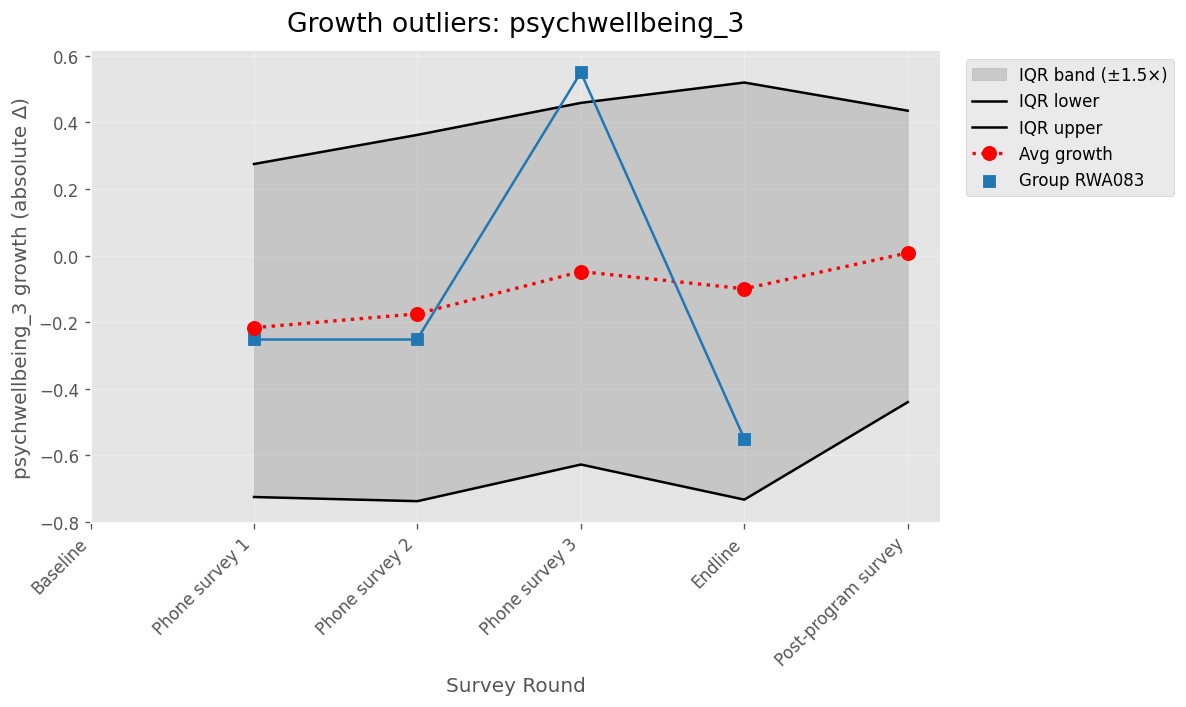

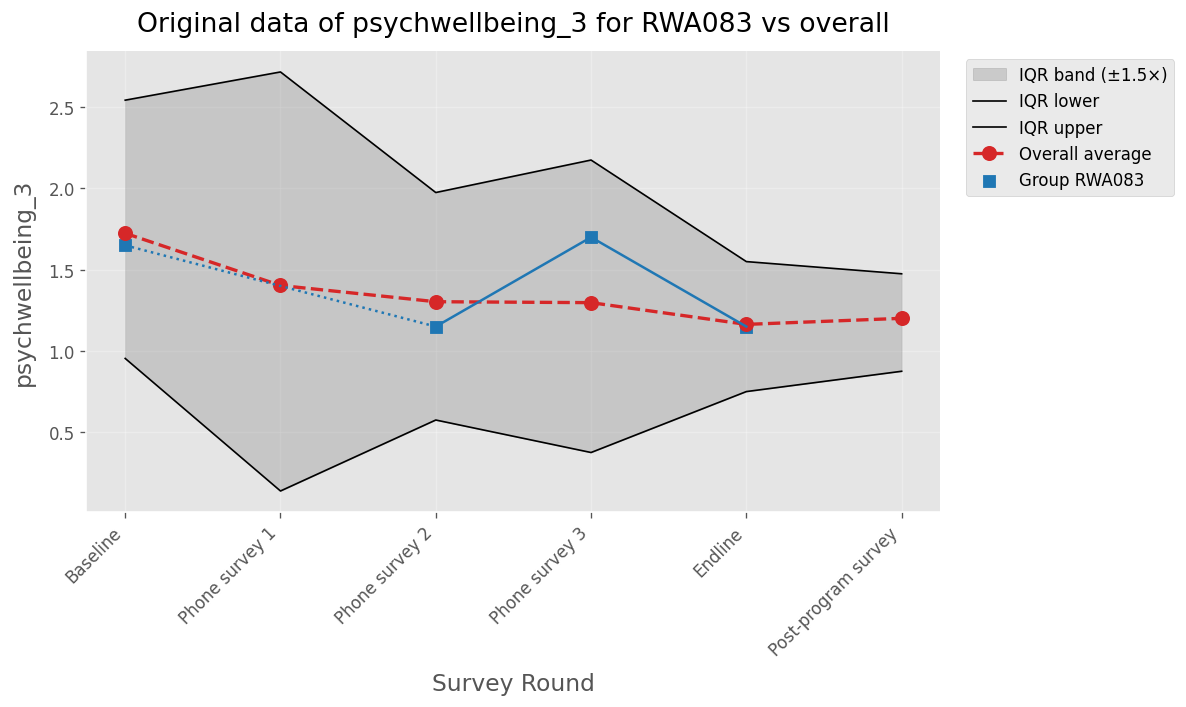


- Outliers for foodsecurity2freq_growth per round -
No outliers were found for foodsecurity2freq, skipping plot.


In [286]:
random_outlier_check(
    df_growth,
    rwa_groups,
    variables,
    n_groups=5,
    n_vars=3
)


- Outliers for savinghowmuch_2_growth per round -
Group RWA082, Round 3: NEGATIVE outlier (-9510.00 < -6325.53)

Plot for variable savinghowmuch_2 (only outlier‐groups: ['RWA082'])


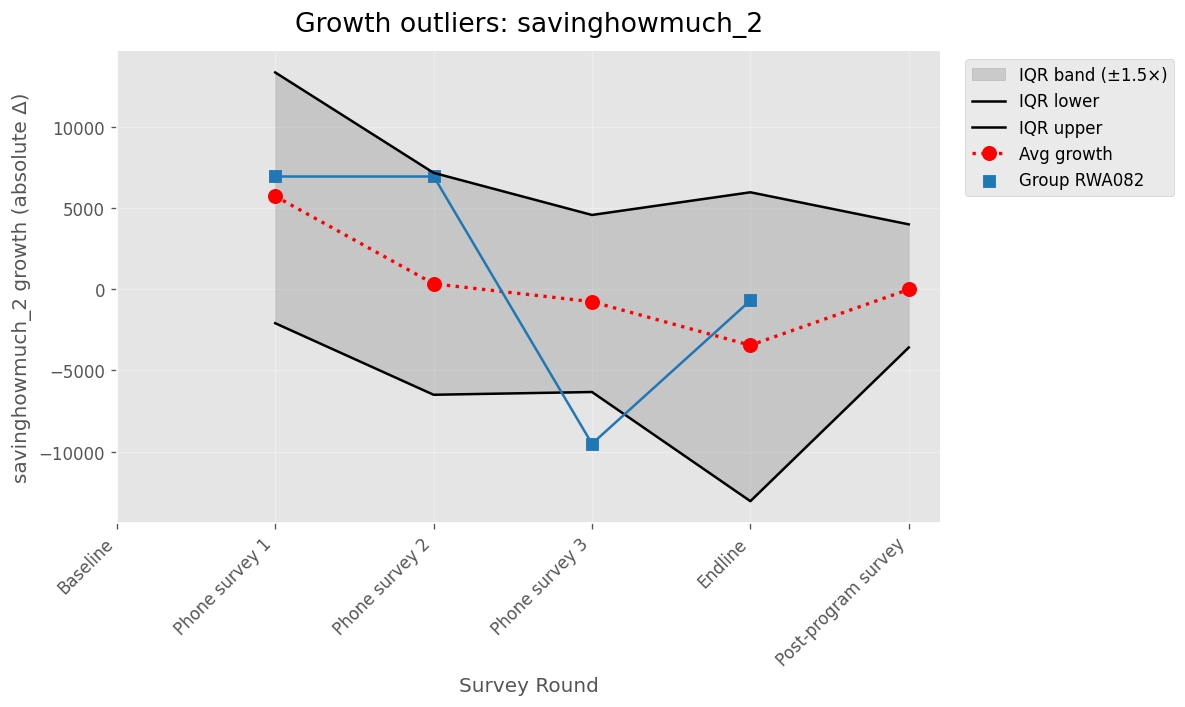

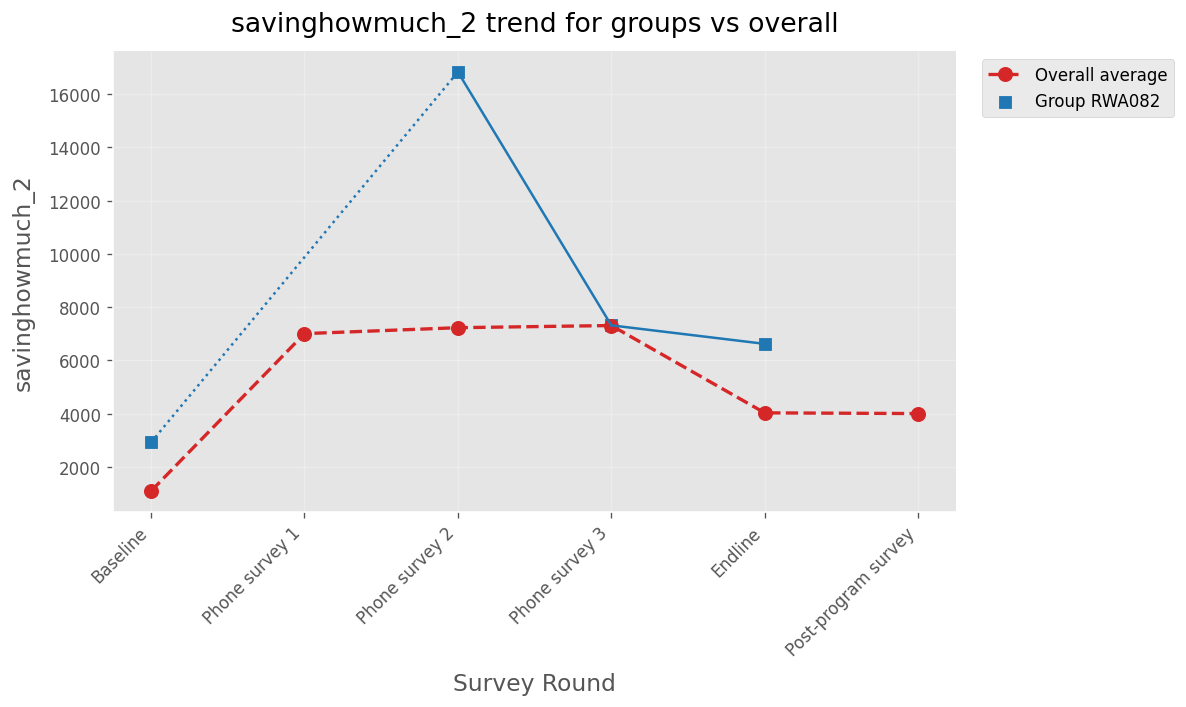

In [201]:
outlier_growth(df_growth, ['RWA082'], ['savinghowmuch_2'])

Here a dummy row can be seen for round 1.

In [202]:
df_growth[df_growth['Groupnr'] == 'RWA082'][['Round','savinghowmuch_2', 'savinghowmuch_2_growth']]

,Round,savinghowmuch_2,savinghowmuch_2_growth
468,0,2925.0,NaN
469,1,NaN,6950.0
470,2,16825.0,6950.0
471,3,7315.0,-9510.0
472,100,6620.0,-695.0
473,102,NaN,NaN


### Adding moving averages



#### Simple Moving Average (One-sided Moving Average)


When using a rolling average (moving average) it removes the short-term noise in data. The simple moving average function has two parameters. Window: decides on how many data points the average is calculated, standard = 3, so then the average is calculated by the value and the two previous values. Min_periods decides from how many datapoints the calculation of the average value is taking place. Experimenting with this parameter is important and influences the amount of rounds that will get NaN value. Since there are only six surveys the min_periods can not be too high to actually generate usefull information. Making min_periods too low reduces the data smoothing. Since center=False it only uses the left-sided values for calculations, making it a One-Sided KMoving Average (OSMA).

In [203]:
import pandas as pd

def add_sma_columns(
    df: pd.DataFrame,
    variables: list[str] | None = None,
    window: int = 3,
    min_periods: int = 1
) -> pd.DataFrame:
    df_sma = df.copy()

    if variables is None:
        numeric_cols = df_sma.select_dtypes(include='number').columns.tolist()
        variables = [col for col in numeric_cols if col not in ('Round',)]

    for var in variables:
        sma_col = f"{var}_SMA_{window}"
        df_sma[sma_col] = (
            df_sma
            .groupby('Groupnr')[var]
            .transform(lambda s: s.rolling(window=window, min_periods=min_periods).mean())
        )
    return df_sma



In [204]:
df_sma = add_sma_columns(df_growth, variables, window=3, min_periods=1)

In [205]:
df_sma[[f"{var}_SMA_3" for var in variables]].head(5)

,savinghowmuch_1_SMA_3,savinghowmuch_2_SMA_3,savinghowmuch_3_SMA_3,savingstotal_1_SMA_3,debtamount_1_SMA_3,timewatersource_1_SMA_3,foodsecurity1freq_SMA_3,foodsecurity2freq_SMA_3,foodsecurity3freq_SMA_3,foodsecurity4freq_SMA_3,...,anxiety2_SMA_3,anxiety3_SMA_3,anxiety4_SMA_3,anxiety5_SMA_3,anxiety6_SMA_3,anxiety7_SMA_3,psychwellbeing_1_SMA_3,psychwellbeing_3_SMA_3,psychwellbeing_5_SMA_3,psychwellbeing2_5_SMA_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1470.0,8278.947368,NaN,NaN,56130.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1470.0,8278.947368,NaN,NaN,56130.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
comparing = ['savinghowmuch_1', 'savinghowmuch_1_SMA_3']
df_sma[comparing]

,savinghowmuch_1,savinghowmuch_1_SMA_3
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,1470.0,1470.000000
4,NaN,1470.000000
...,...,...
955,NaN,1307.692308
956,NaN,1307.692308
957,NaN,NaN
958,NaN,NaN


#### Centered Moving Average

Bij de Central Moving Average methode gebruikt hij een window rondom de center om het gemiddelde te berekenen. Als window=3 wordt gekozen dan berekent hij het gemiddelde van ronde 2 door het gemiddelde te pakken van ronde 1, 2 en 3. Hier kies je het liefst voor een oneven window (3 or 5) zodat je echt een center hebt (makkelijk voor interpertatie ook).

In [207]:
def add_cma_columns(
    df: pd.DataFrame,
    variables: list[str] | None = None,
    window: int = 3,
    min_periods: int = 1) -> pd.DataFrame:

    df_cma = df.copy()

    if variables is None:
        numeric_cols = df_cma.select_dtypes(include='number').columns.tolist()
        variables = [col for col in numeric_cols if col != 'Round']

    for var in variables:
        cma_col = f"{var}_CMA_{window}"
        df_cma[cma_col] = (
            df_cma
            .groupby('Groupnr')[var]
            .transform(lambda s: s.rolling(window=window, min_periods=min_periods, center=True).mean())
        )
    return df_cma


In [208]:
df_cma = add_cma_columns(df_growth)

In [209]:
df_cma[[f"{var}_CMA_3" for var in variables]].head(5)

,savinghowmuch_1_CMA_3,savinghowmuch_2_CMA_3,savinghowmuch_3_CMA_3,savingstotal_1_CMA_3,debtamount_1_CMA_3,timewatersource_1_CMA_3,foodsecurity1freq_CMA_3,foodsecurity2freq_CMA_3,foodsecurity3freq_CMA_3,foodsecurity4freq_CMA_3,...,anxiety2_CMA_3,anxiety3_CMA_3,anxiety4_CMA_3,anxiety5_CMA_3,anxiety6_CMA_3,anxiety7_CMA_3,psychwellbeing_1_CMA_3,psychwellbeing_3_CMA_3,psychwellbeing_5_CMA_3,psychwellbeing2_5_CMA_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1470.000000,8278.947368,NaN,NaN,56130.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1470.000000,8278.947368,NaN,NaN,56130.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1451.666667,5336.140351,0.0,NaN,47893.571429,22.235294,2.0,1.941176,2.117647,1.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,1.823529,1.823529,2.823529,1.0


#### Weighted Moving Average

Different from SMA since you give unequal weights within the venster. Often the more recent observations get a higher weight in the calculation of the mean.

In [210]:


def add_wma_columns(df: pd.DataFrame,
                    variables: list | None = None,
                    window: int = 3,
                    weights: np.ndarray | None = None,
                    min_periods: int = 1) -> pd.DataFrame:
    df_wma = df.copy()

    if variables is None:
        numeric = df_wma.select_dtypes(include='number').columns.tolist()
        variables = [c for c in numeric if c not in ('Round',)]

    if weights is None:
        weights = np.arange(1, window + 1)
    weights = np.array(weights)
    if weights.shape[0] != window:
        raise ValueError("Length of weights not equal to the window size.")

    def wma_calc(x):
      x = x[~np.isnan(x)]
      k = len(x)
      if k == 0:
          return np.nan
      w = weights[-k:]
      return np.dot(x, w) / w.sum()

    for var in variables:
        colname = f"{var}_WMA_{window}"
        df_wma[colname] = (
            df_wma
              .groupby('Groupnr')[var]
              .transform(lambda s:
                  s.rolling(window=window, min_periods=min_periods, center=False)
                   .apply(wma_calc, raw=True)
              )
        )
    return df_wma



In [211]:
df_wma = add_wma_columns(df_growth)

In [212]:
df_wma[[f"{var}_WMA_3" for var in variables]].head(5)

,savinghowmuch_1_WMA_3,savinghowmuch_2_WMA_3,savinghowmuch_3_WMA_3,savingstotal_1_WMA_3,debtamount_1_WMA_3,timewatersource_1_WMA_3,foodsecurity1freq_WMA_3,foodsecurity2freq_WMA_3,foodsecurity3freq_WMA_3,foodsecurity4freq_WMA_3,...,anxiety2_WMA_3,anxiety3_WMA_3,anxiety4_WMA_3,anxiety5_WMA_3,anxiety6_WMA_3,anxiety7_WMA_3,psychwellbeing_1_WMA_3,psychwellbeing_3_WMA_3,psychwellbeing_5_WMA_3,psychwellbeing2_5_WMA_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1470.0,8278.947368,NaN,NaN,56130.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1470.0,8278.947368,NaN,NaN,56130.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exponentially Weighted Moving Average

The difference between the EWMA and WMA is that the EWMA applies an exponential decay to all past data points instead of a window. If span is higher the memory is higher, so historical points their weight decay slower. The adjust parameter can be True or False, True is standard and means it uses the classic EWMA-formula, every round the full history is re-normalized. With adjust=False it is done more efficient with a recursive aproach.

In [213]:
import pandas as pd

def add_ewma_columns(
    df: pd.DataFrame,
    variables: list[str] | None = None,
    span: int = 3,
    adjust: bool = True,
    min_periods: int = 1
) -> pd.DataFrame:
    df_ewma = df.copy()

    if variables is None:
        numeric_cols = df_ewma.select_dtypes(include='number').columns.tolist()
        variables = [col for col in numeric_cols if col != 'Round']

    for var in variables:
        ewma_col = f"{var}_EWMA_{span}"
        df_ewma[ewma_col] = (
            df_ewma
            .groupby('Groupnr')[var]
            .transform(lambda s: s.ewm(span=span, adjust=adjust, min_periods=min_periods).mean())
        )
    return df_ewma



In [214]:
df_ewma = add_ewma_columns(df_growth)

In [215]:
df_ewma[[f"{var}_EWMA_3" for var in variables]].head(5)

,savinghowmuch_1_EWMA_3,savinghowmuch_2_EWMA_3,savinghowmuch_3_EWMA_3,savingstotal_1_EWMA_3,debtamount_1_EWMA_3,timewatersource_1_EWMA_3,foodsecurity1freq_EWMA_3,foodsecurity2freq_EWMA_3,foodsecurity3freq_EWMA_3,foodsecurity4freq_EWMA_3,...,anxiety2_EWMA_3,anxiety3_EWMA_3,anxiety4_EWMA_3,anxiety5_EWMA_3,anxiety6_EWMA_3,anxiety7_EWMA_3,psychwellbeing_1_EWMA_3,psychwellbeing_3_EWMA_3,psychwellbeing_5_EWMA_3,psychwellbeing2_5_EWMA_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1470.0,8278.947368,NaN,NaN,56130.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1470.0,8278.947368,NaN,NaN,56130.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Comparing the Moving Averages Methods


We now have:


1.   df_sma
2.   df_cma
3.   df_wma
4.   df_ewma

Now we need to compare them to see which moving average is the best in smoothing the data for the 100WEEKS project. For comparising three groups are chosen and compared based on three variables.

Firstly investigating the perfect groups for the comparison



In [216]:
def get_groups_with_complete_data(df, testing_variables):
    required_rounds = [0, 1, 2, 3, 100, 102]

    subset_cols = ['Groupnr', 'Round'] + testing_variables
    df_sub = df[subset_cols].copy()

    df_sub = df_sub[df_sub['Round'].isin(required_rounds)]

    df_sub_clean = df_sub.dropna(subset=testing_variables)

    rounds_per_group = df_sub_clean.groupby('Groupnr')['Round'].nunique()

    complete_groups = rounds_per_group[rounds_per_group == len(required_rounds)].index.tolist()

    print(f"\n Number of groups with complete data across all rounds {required_rounds}: {len(complete_groups)}")
    print(complete_groups)

    return complete_groups


In [217]:
testing_variables = ['savinghowmuch_1', 'debtamount_1', 'savinghowmuch_2']
valid_groups = get_groups_with_complete_data(df_growth, testing_variables)




 Number of groups with complete data across all rounds [0, 1, 2, 3, 100, 102]: 5
['RWA049', 'RWA050', 'RWA051', 'RWA052', 'RWA053']


So the MA methods will be compared using ['savinghowmuch_1', 'debtamount_1', 'savinghowmuch_2'] as variables and ['RWA051', 'RWA052', 'RWA053'] as groups

In [218]:
testing_variables = ['savinghowmuch_1', 'debtamount_1']
comparison_group = ['RWA055']
df_dict={'SMA': df_sma, 'EWMA': df_ewma, 'CMA': df_cma, 'WMA': df_wma}

In [219]:
import matplotlib.pyplot as plt

def compare_smoothing(
    df_dict,
    groups,
    variables,
    window_size=3
):
    round_order = [0, 1, 2, 3, 100, 102]
    round_labels = ['Baseline', 'Phone 1', 'Phone 2', 'Phone 3', 'Endline', 'Post-program']
    round_map = dict(zip(round_order, round_labels))

    for variable in variables:
        n_groups = len(groups)
        fig, axes = plt.subplots(nrows=1, ncols=n_groups, figsize=(6 * n_groups, 5), sharey=True)

        if n_groups == 1:
            axes = [axes]

        for i, group in enumerate(groups):
            ax = axes[i]

            base_df = next(iter(df_dict.values()))
            raw = base_df[(base_df['Groupnr'] == group) & (base_df['Round'].isin(round_order))].copy()
            raw['RoundLabel'] = raw['Round'].map(round_map)
            ax.plot(raw['RoundLabel'], raw[variable], linestyle='--', marker='o', label='Raw')

            for method, df in df_dict.items():
                colname = f"{variable}_{method.upper()}_{window_size}"
                if colname in df.columns:
                    sub = df[(df['Groupnr'] == group) & (df['Round'].isin(round_order))].copy()
                    sub['RoundLabel'] = sub['Round'].map(round_map)
                    ax.plot(sub['RoundLabel'], sub[colname], label=method.upper())

            ax.set_title(f'Group {group}')
            ax.set_xlabel('Survey Round')
            if i == 0:
                ax.set_ylabel(variable)
            ax.grid(True)
            ax.legend()

        plt.suptitle(f"Smoothing comparison for '{variable}'", fontsize=16)
        plt.tight_layout()
        plt.show()

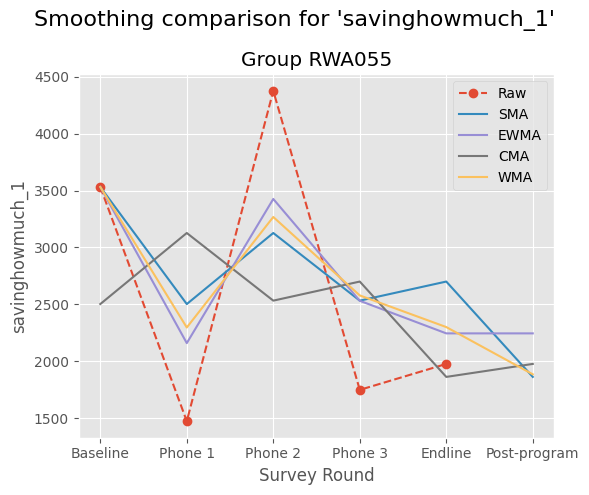

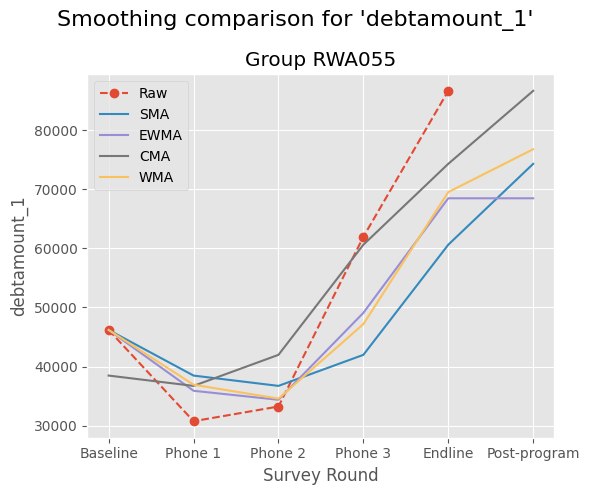

In [220]:
compare_smoothing(df_dict, comparison_group, testing_variables, window_size=3)


As can be seen in the results above the SMA and CMA have a stable overview for long-term trends since they flatten out the sharp changes massively. For the 100WEEKS project this is not ideal, since there are only 6 data points. EWMA and CMA are better in smoothing the data without completely removing the spikes. EWMA is better in detecting the general recent trends and reacts fast to overall changes in the recent trend. WMA is more sensitive to recent spikes, so big jumps in the raw data are better reflected in the WMA method. However, it is slower in detecting trends in recent data which is not ideal since the project only has six data points per group. Therefor the outlier detection will be applied on data smoothed by EWMA to give the best flagging effect.

Now first the WMA and EWMA growth columns will be added to df_growth:

In [221]:
df_growth = add_ewma_columns(df_growth, variables=variables)


In [222]:
df_growth[df_growth['Groupnr'] == 'RWA090'][[f"{var}_EWMA_3" for var in variables]].head(5)

,savinghowmuch_1_EWMA_3,savinghowmuch_2_EWMA_3,savinghowmuch_3_EWMA_3,savingstotal_1_EWMA_3,debtamount_1_EWMA_3,timewatersource_1_EWMA_3,foodsecurity1freq_EWMA_3,foodsecurity2freq_EWMA_3,foodsecurity3freq_EWMA_3,foodsecurity4freq_EWMA_3,...,anxiety2_EWMA_3,anxiety3_EWMA_3,anxiety4_EWMA_3,anxiety5_EWMA_3,anxiety6_EWMA_3,anxiety7_EWMA_3,psychwellbeing_1_EWMA_3,psychwellbeing_3_EWMA_3,psychwellbeing_5_EWMA_3,psychwellbeing2_5_EWMA_3
516,1000.000000,371.428571,NaN,3975.000000,23925.000000,21.100000,2.40,2.40,2.30,2.55,...,NaN,NaN,NaN,NaN,NaN,NaN,2.100000,1.700000,2.600000,1.500000
517,961.904762,3123.809524,0.0,22291.666667,29391.666667,18.766667,2.40,2.40,2.30,2.55,...,NaN,NaN,NaN,NaN,NaN,NaN,1.733333,1.233333,2.866667,1.500000
518,1269.387755,6165.918367,0.0,51826.428571,46882.142857,17.900000,1.28,1.68,1.86,1.91,...,NaN,NaN,NaN,NaN,NaN,NaN,1.542857,1.242857,2.742857,1.140000
519,1232.380952,6426.761905,0.0,65961.666667,44334.473684,17.900000,1.28,1.68,1.86,1.91,...,NaN,1.500000,NaN,NaN,NaN,NaN,1.546667,1.353333,2.560000,1.238462
520,1860.829493,4650.368664,0.0,58956.935484,44124.975746,17.447826,1.28,1.68,1.86,1.91,...,1.15,1.433333,1.2,1.2,1.3,1.35,1.445161,1.248387,2.425806,1.189655


In [223]:
# df_growth[df_growth['Groupnr'] == 'RWA090'][[f"{var}_WMA_3" for var in variables]].head(5)

Now we add growth columns for the smoothed variable columns

In [224]:
def add_growth_to_smoothed(df: pd.DataFrame, smoothed_prefix: str, variables: list, window: int) -> pd.DataFrame:
    df_out = df.copy()
    for var in variables:
        sm_col = f"{var}_{smoothed_prefix.upper()}_{window}"
        if sm_col not in df_out.columns:
            continue
        df_out[f"{sm_col}_growth"] = df_out.groupby('Groupnr')[sm_col].diff()
        df_out[f"{sm_col}_pct_growth"] = df_out.groupby('Groupnr')[sm_col].pct_change() * 100
    return df_out


In [225]:
def add_growth_to_smoothed_with_interpolation(
    df: pd.DataFrame,
    smoothed_prefix: str,
    variables: list,
    window: int
) -> pd.DataFrame:
    df_out = df.copy()
    df_out.sort_values(['Groupnr', 'Round'], inplace=True)

    for var in variables:
        sm_col = f"{var}_{smoothed_prefix.upper()}_{window}"
        if sm_col not in df_out.columns:
            continue

        interp = (
            df_out
            .groupby('Groupnr')[sm_col]
            .transform(lambda s: s.interpolate(method='linear', limit_area=None, limit=2))
        )

        growth_col = f"{sm_col}_growth"
        pct_col    = f"{sm_col}_pct_growth"

        df_out[growth_col] = interp.groupby(df_out['Groupnr']).diff()
        df_out[pct_col]    = interp.groupby(df_out['Groupnr']).pct_change(fill_method=None) * 100

    return df_out

In [226]:

df_ewma_growth = add_growth_to_smoothed_with_interpolation(df_growth, 'EWMA', variables, window=3)



#### Simple outlier detection with smoothed data

In [227]:
df_ewma_growth[df_ewma_growth['Groupnr'] == 'RWA090']

,Groupnr,Round,savinghowmuch_1,savinghowmuch_2,savinghowmuch_3,savingstotal_1,debtamount_1,timewatersource_1,foodsecurity1freq,foodsecurity2freq,...,anxiety7_EWMA_3_growth,anxiety7_EWMA_3_pct_growth,psychwellbeing_1_EWMA_3_growth,psychwellbeing_1_EWMA_3_pct_growth,psychwellbeing_3_EWMA_3_growth,psychwellbeing_3_EWMA_3_pct_growth,psychwellbeing_5_EWMA_3_growth,psychwellbeing_5_EWMA_3_pct_growth,psychwellbeing2_5_EWMA_3_growth,psychwellbeing2_5_EWMA_3_pct_growth
516,RWA090,0,1000.000000,371.428571,NaN,3975.0,23925.000000,21.10,2.4,2.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,RWA090,1,942.857143,4500.000000,0.0,31450.0,32125.000000,17.60,NaN,NaN,...,NaN,NaN,-0.366667,-17.460317,-0.466667,-27.450980,0.266667,10.256410,0.000000,0.000000
518,RWA090,2,1500.000000,8447.500000,NaN,73977.5,60000.000000,17.25,1.0,1.5,...,NaN,NaN,-0.190476,-10.989011,0.009524,0.772201,-0.123810,-4.318937,-0.360000,-24.000000
519,RWA090,3,1200.000000,6655.000000,0.0,78330.0,42105.263158,NaN,NaN,NaN,...,NaN,NaN,0.003810,0.246914,0.110476,8.888889,-0.182857,-6.666667,0.098462,8.636977
520,RWA090,100,2450.000000,2985.000000,0.0,52390.0,43928.571429,17.25,NaN,NaN,...,NaN,NaN,-0.101505,-6.562848,-0.104946,-7.754648,-0.134194,-5.241935,-0.048806,-3.940887
521,RWA090,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [228]:
# def outlier_growth_smoothed(df, groups, variables, methods=['EWMA', 'WMA'], window=3):
#     flagged_per_variable = {var: set() for var in variables}

#     for var in variables:
#         for method in methods:
#             growth_col = f"{var}_{method.upper()}_{window}_growth"
#             if growth_col not in df.columns:
#                 print(f"Column {growth_col} not found, skipping.")
#                 continue

#             stats = df.groupby('Round')[growth_col].agg(
#                 Q1=lambda x: x.quantile(0.25),
#                 Q3=lambda x: x.quantile(0.75)
#             ).reset_index()
#             stats['IQR']   = stats['Q3'] - stats['Q1']
#             stats['lower'] = stats['Q1'] - 1.5 * stats['IQR']
#             stats['upper'] = stats['Q3'] + 1.5 * stats['IQR']

#             df_stats = df.merge(stats, on='Round', how='left')

#             print(f"\n=== Outliers for {growth_col} per round ===")

#             for grp in groups:
#                 sub = df_stats[df_stats['Groupnr'] == grp]
#                 for _, row in sub.iterrows():
#                     val = row[growth_col]
#                     if pd.isna(val):
#                         continue
#                     if val < row['lower']:
#                         print(f"Group {grp}, Round {row['Round']}: NEGATIVE outlier ({val:.2f} < {row['lower']:.2f})")
#                         flagged_per_variable[var].add(grp)
#                     elif val > row['upper']:
#                         print(f"Group {grp}, Round {row['Round']}: POSITIVE outlier ({val:.2f} > {row['upper']:.2f})")
#                         flagged_per_variable[var].add(grp)

#     for var, flagged_groups in flagged_per_variable.items():
#         if flagged_groups:
#             print(f"\n Plotting raw trends for {var} (flagged in: {sorted(flagged_groups)})")
#             plot_groups_vs_overall(df, sorted(flagged_groups), [var])
#         else:
#             print(f"No outliers found for {var}. No plot generated.")



The current growth_plot function does not work for this outlier detection, since the groups are flagged if they fall out of the IQR zone based on both the EWMA and WMA moothed data. So instead we create a new plotting function that uses the most strict IQR and plots this to generate a representive visualisation of the IQR zone used to detect outliers.

In [229]:
def growth_plot_strict_iqr(
    df: pd.DataFrame,
    groups: list[str],
    var: str,
    methods: list[str] = ['EWMA','WMA'],
    window: int = 3
):
    import numpy as np
    import matplotlib.pyplot as plt

    # 1) define the round order & labels *first*
    round_order = [0,1,2,3,100,102]
    labels = {
      0:'Baseline',1:'Phone survey 1',2:'Phone survey 2',
      3:'Phone survey 3',100:'Endline',102:'Post-program survey'
    }
    x = np.arange(len(round_order))
    xlabs = [labels[r] for r in round_order]

    # 2) gather per‐method Q1/Q3 and compute strict IQR band
    stats = {}
    for m in methods:
        gc = f"{var}_{m.upper()}_{window}_growth"
        s = df.groupby('Round')[gc].agg(
            Q1=lambda x: x.quantile(0.25),
            Q3=lambda x: x.quantile(0.75)
        ).reindex(round_order)
        s['lower'] = s['Q1'] - 1.5*(s['Q3']-s['Q1'])
        s['upper'] = s['Q3'] + 1.5*(s['Q3']-s['Q1'])
        stats[m] = s

    lowers = np.vstack([stats[m]['lower'] for m in methods])
    uppers = np.vstack([stats[m]['upper'] for m in methods])
    strict_lower = np.max(lowers, axis=0)
    strict_upper = np.min(uppers, axis=0)

    # 3) raw avg growth
    raw_gc = var + '_growth'
    overall = df.groupby('Round')[raw_gc].mean().reindex(round_order)

    # 4) start plotting
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(10,5), dpi=120)

    # shade IQR band
    ax.fill_between(x, strict_lower, strict_upper,
                    color='lightgray', alpha=0.6,
                    label='IQR band (strict ∩ EWMA)')

    # plot IQR edges
    ax.plot(x, strict_lower,   'k-', lw=1, label='IQR lower')
    ax.plot(x, strict_upper,   'k-', lw=1, label='IQR upper')

    # plot avg growth
    ax.plot(x, overall.values, 'o--', color='red', lw=2, ms=6,
            label='Avg growth')

    # proxy legend entries for groups with solid lines
    cmap = plt.get_cmap('tab10')
    for i, gid in enumerate(groups):
        ax.plot([], [],
                color=cmap(i),
                marker='s',
                linestyle='-',
                linewidth=1.5,
                label=f"Group {gid}")

    # now draw each group's real line (solid/dotted over gaps)
    def plot_group(gid, color):
        sub = (df[df['Groupnr']==gid]
               .set_index('Round')[raw_gc]
               .reindex(round_order))
        y = sub.values
        for j in range(1,len(x)):
            ls = '-' if (not np.isnan(y[j-1]) and not np.isnan(y[j])) else ':'
            ax.plot(x[j-1:j+1], y[j-1:j+1],
                    color=color, lw=1.5, linestyle=ls)
        ax.scatter(x, y, color=color, s=60, marker='s')

    for i, gid in enumerate(groups):
        plot_group(gid, cmap(i))

    # finalize
    ax.set_xticks(x)
    ax.set_xticklabels(xlabs, rotation=45, ha='right')
    ax.set_ylabel(f"{var}_growth (absolute Δ)")
    ax.set_title(f"Growth outliers: {var}")
    ax.legend(loc='upper left', bbox_to_anchor=(1.02,1))
    plt.tight_layout()
    plt.show()



Simple outlier detection using IQR. THe function flagges groups based on both the IQR of the WMA smoothed data and the IQR of the EWMA smoothed data. It plots the growth of the outlier groups for the variables there growth is a outlier in compared to the average growth and the IQR zone. It also plots the raw data for extra information.

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def outlier_growth_ewma(
    df: pd.DataFrame,
    groups: list[str],
    variables: list[str],
    window: int = 3
):
    """
    For each variable in `variables`, compute the IQR band from its *_EWMA_{window}_growth series,
    then flag *raw* var_growth whenever it steps outside that band.
    Finally, for any variable with at least one flag, plot:
      1) growth_plot_strict_iqr (the IQR‐band view)
      2) plot_groups_vs_overall (the raw trend)
    """
    round_order = [0, 1, 2, 3, 100, 102]

    flagged_per_var = {var: set() for var in variables}

    for var in variables:
        # 1) collect EWMA IQR stats
        gc = f"{var}_EWMA_{window}_growth"
        if gc not in df.columns:
            raise ValueError(f"Missing column {gc}")
        grp = df.groupby("Round")[gc]
        s = grp.agg(Q1=lambda x: x.quantile(0.25),
                    Q3=lambda x: x.quantile(0.75)).reindex(round_order)
        iqr = s["Q3"] - s["Q1"]
        band = pd.DataFrame({
            "lower": s["Q1"] - 1.5 * iqr,
            "upper": s["Q3"] + 1.5 * iqr
        }, index=round_order)

        # 2) check raw growth var_growth against EWMA band
        raw_gc = var + "_growth"
        if raw_gc not in df.columns:
            print(f"Warning: no raw growth column {raw_gc}")
            continue

        # bring in band thresholds onto each row by Round
        tmp = df[["Groupnr", "Round", raw_gc]].merge(
            band.reset_index().rename(columns={"index": "Round"}),
            on="Round", how="left"
        )

        print(f"\n- EWMA-IQR outliers for {var}_growth -")
        for grp in groups:
            sub = tmp[tmp["Groupnr"] == grp]
            for _, r in sub.iterrows():
                v = r[raw_gc]
                if pd.isna(v):
                    continue
                if v < r["lower"]:
                    print(f"! NEG outlier: {var}, Group {grp}, Round {r['Round']}: {v:.1f} < {r['lower']:.1f}")
                    flagged_per_var[var].add(grp)
                elif v > r["upper"]:
                    print(f"! POS outlier: {var}, Group {grp}, Round {r['Round']}: {v:.1f} > {r['upper']:.1f}")
                    flagged_per_var[var].add(grp)

    # 3) Plot any flagged vars
    for var, fl in flagged_per_var.items():
        if not fl:
            print(f"\n– No outliers found for {var}.")
            continue

        fl = sorted(fl)
        print(f"\n! Plotting EWMA-IQR band & raw trends for {var} (groups: {fl}) !")
        # (a) band-plot
        growth_plot_strict_iqr(df, fl, var, methods=["EWMA"], window=window)
        # (b) raw-trend overlay
        plot_groups_vs_overall(df, fl, [var])




- EWMA-IQR outliers for debtamount_1_growth -
! POS outlier: debtamount_1, Group RWA053, Round 1: 60038.5 > 14291.5
! NEG outlier: debtamount_1, Group RWA053, Round 2: -30738.5 < -9111.0
! POS outlier: debtamount_1, Group RWA053, Round 102: 70000.0 > 0.0

! Plotting EWMA-IQR band & raw trends for debtamount_1 (groups: ['RWA053']) !


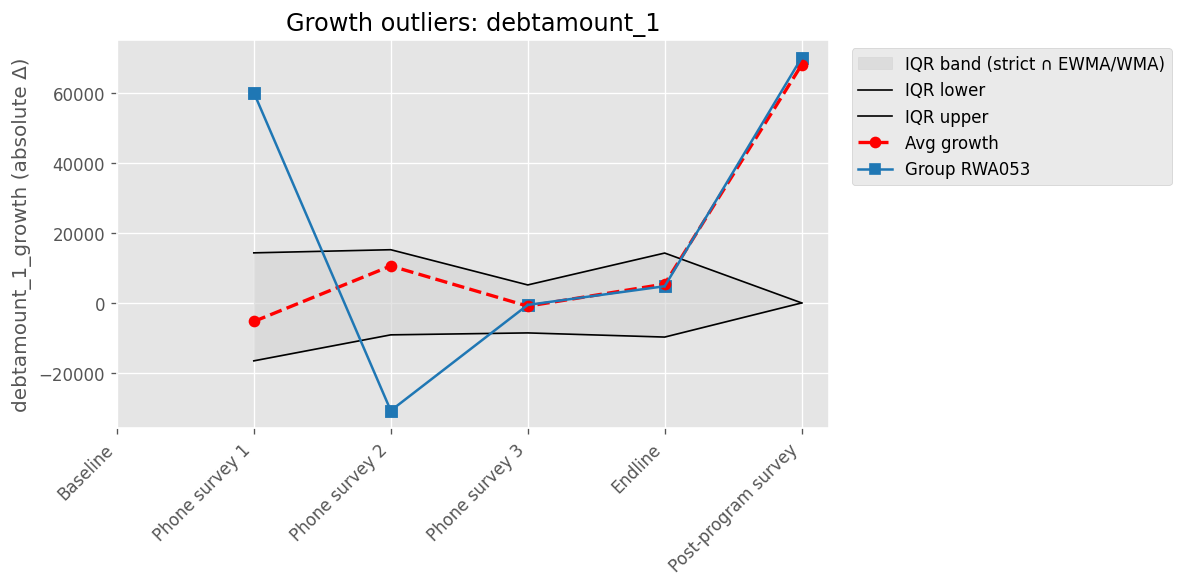

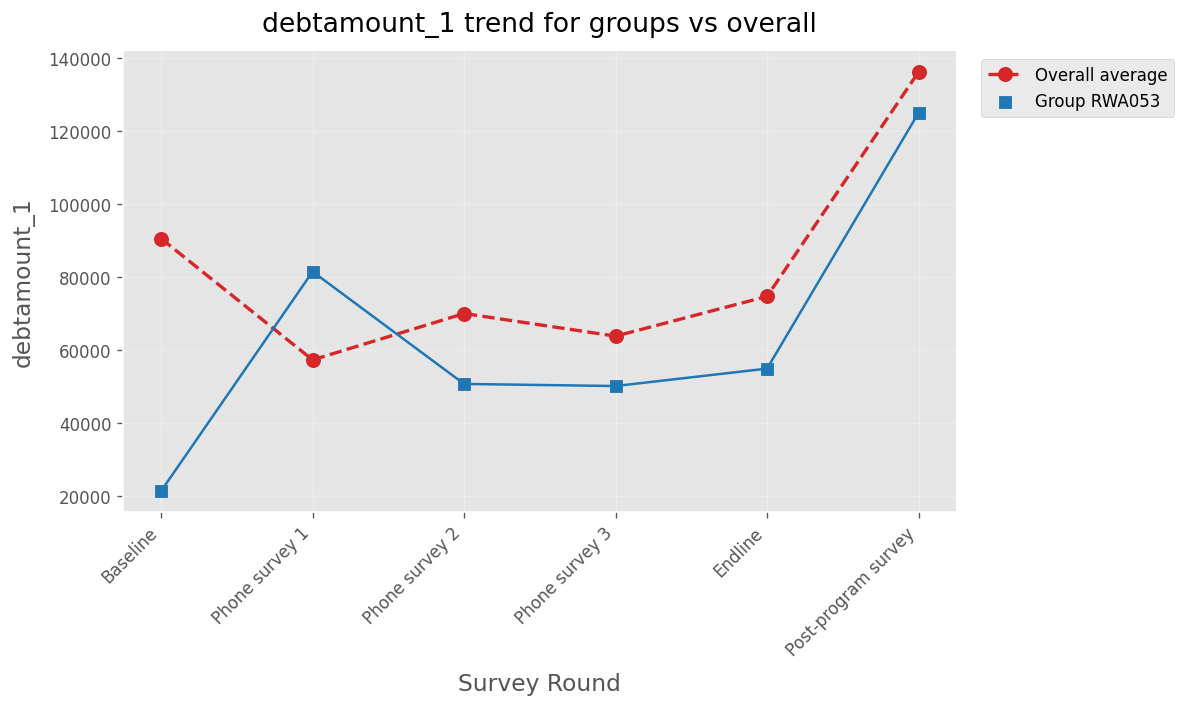

In [231]:
outlier_growth_ewma(
    df=df_ewma_growth,
    groups=['RWA053'],
    variables=['debtamount_1'],
    window=3
)


### Trend modelling

#### Further trend analysis

In [232]:
# !pip install pymannkendall

In [233]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import ttest_ind, kendalltau

# ──────────────────────────────────────────────────────────────────────
# TREND MODELLING WITH GUARDED TAS + KENDALLτ IN PLACE OF SK
# Assumes df_combined exists with:
#    ['Groupnr','Round','savinghowmuch_1','savinghowmuch_2','debtamount_1',…]
# ──────────────────────────────────────────────────────────────────────

# 1) Map your survey rounds → numeric weeks
round2week = {0: 0, 1: 25, 2: 50, 3: 75, 100: 100, 102: 150}
df_ewma_growth['Week'] = df_ewma_growth['Round'].map(round2week)

# 2) Pick your variables & group list
variables = ['savinghowmuch_1', 'savinghowmuch_2', 'debtamount_1']
groups    = df_ewma_growth['Groupnr'].unique()

# 3) Container for results
results = []

# 4) Loop through groups × variables
for grp in groups:
    df_grp = df_ewma_growth[df_ewma_growth['Groupnr'] == grp]
    for var in variables:
        df_tmp = df_grp[['Week', var]].dropna()
        if len(df_tmp) < 3:
            continue  # need ≥3 points

        # Prepare design matrix
        X = sm.add_constant(df_tmp['Week'])
        y = df_tmp[var].values

        # 4.1 OLS
        ols = sm.OLS(y, X).fit()
        ols_slope, ols_p, ols_r2 = ols.params['Week'], ols.pvalues['Week'], ols.rsquared

        # 4.2 GLS (simplest form)
        gls = sm.GLS(y, X).fit()
        gls_slope, gls_p = gls.params['Week'], gls.pvalues['Week']

        # 4.3 Guarded TAS (early vs late)
        early = df_tmp[df_tmp['Week'] <= 50][var]
        late  = df_tmp[df_tmp['Week'] > 50][var]
        if len(early) >= 2 and len(late) >= 2:
            tas_stat, tas_p = ttest_ind(early, late, nan_policy='omit')
        else:
            tas_stat, tas_p = np.nan, np.nan

        # 4.4 Kendall's tau (fallback for Seasonal‐Kendall)
        tau, tau_p = kendalltau(df_tmp['Week'], y)
        trend_dir  = 'up' if tau > 0 else ('down' if tau < 0 else 'flat')

        # Collect
        results.append({
            'Groupnr':    grp,
            'Variable':   var,
            'OLS_slope':  ols_slope,
            'OLS_p':      ols_p,
            'OLS_R2':     ols_r2,
            'GLS_slope':  gls_slope,
            'GLS_p':      gls_p,
            'TAS_stat':   tas_stat,
            'TAS_p':      tas_p,
            'Kendall_tau':tau,
            'Kendall_p':  tau_p,
            'Trend_dir':  trend_dir
        })

# 5) Build summary DataFrame
trend_df = pd.DataFrame(results)

# 6) Display in Colab
trend_df


,Groupnr,Variable,OLS_slope,OLS_p,OLS_R2,GLS_slope,GLS_p,TAS_stat,TAS_p,Kendall_tau,Kendall_p,Trend_dir
0,RWA005,savinghowmuch_1,3.577211,0.931148,0.011651,3.577211,0.931148,NaN,NaN,0.333333,1.000000,up
1,RWA005,savinghowmuch_2,-89.872959,0.353857,0.721581,-89.872959,0.353857,NaN,NaN,-1.000000,0.333333,down
2,RWA005,debtamount_1,-95.420918,0.816735,0.080606,-95.420918,0.816735,NaN,NaN,-0.333333,1.000000,down
3,RWA006,savinghowmuch_1,-62.806723,0.764154,0.131080,-62.806723,0.764154,NaN,NaN,-0.333333,1.000000,down
4,RWA006,savinghowmuch_2,-140.382143,0.088987,0.980588,-140.382143,0.088987,NaN,NaN,-1.000000,0.333333,down
...,...,...,...,...,...,...,...,...,...,...,...,...
343,RWA119,savinghowmuch_2,145.700000,0.132269,0.957450,145.700000,0.132269,NaN,NaN,1.000000,0.333333,up
344,RWA119,debtamount_1,847.333333,0.288042,0.808878,847.333333,0.288042,NaN,NaN,1.000000,0.333333,up
345,RWA120,savinghowmuch_1,70.882353,0.323641,0.763067,70.882353,0.323641,NaN,NaN,1.000000,0.333333,up
346,RWA120,savinghowmuch_2,78.775000,0.061051,0.990831,78.775000,0.061051,NaN,NaN,1.000000,0.333333,up


In [234]:
trend_df['TAS_p'].isna().sum()


np.int64(102)

#### Testing the descriptive trend metrics

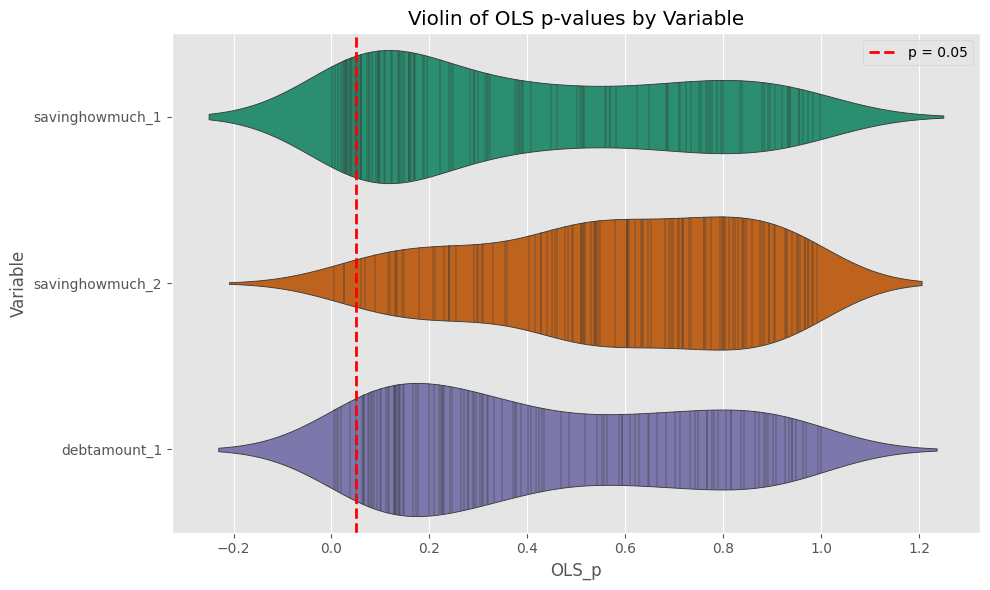

In [235]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=trend_df,
    x="OLS_p",
    y="Variable",
    hue="Variable",
    palette="Dark2",
    split=False,
    inner="stick",
    legend=False
)

# add red dashed line at p = 0.05
plt.axvline(
    0.05,
    color="red",
    linestyle="--",
    linewidth=2,
    label="p = 0.05"
)

plt.title("Violin of OLS p-values by Variable")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()



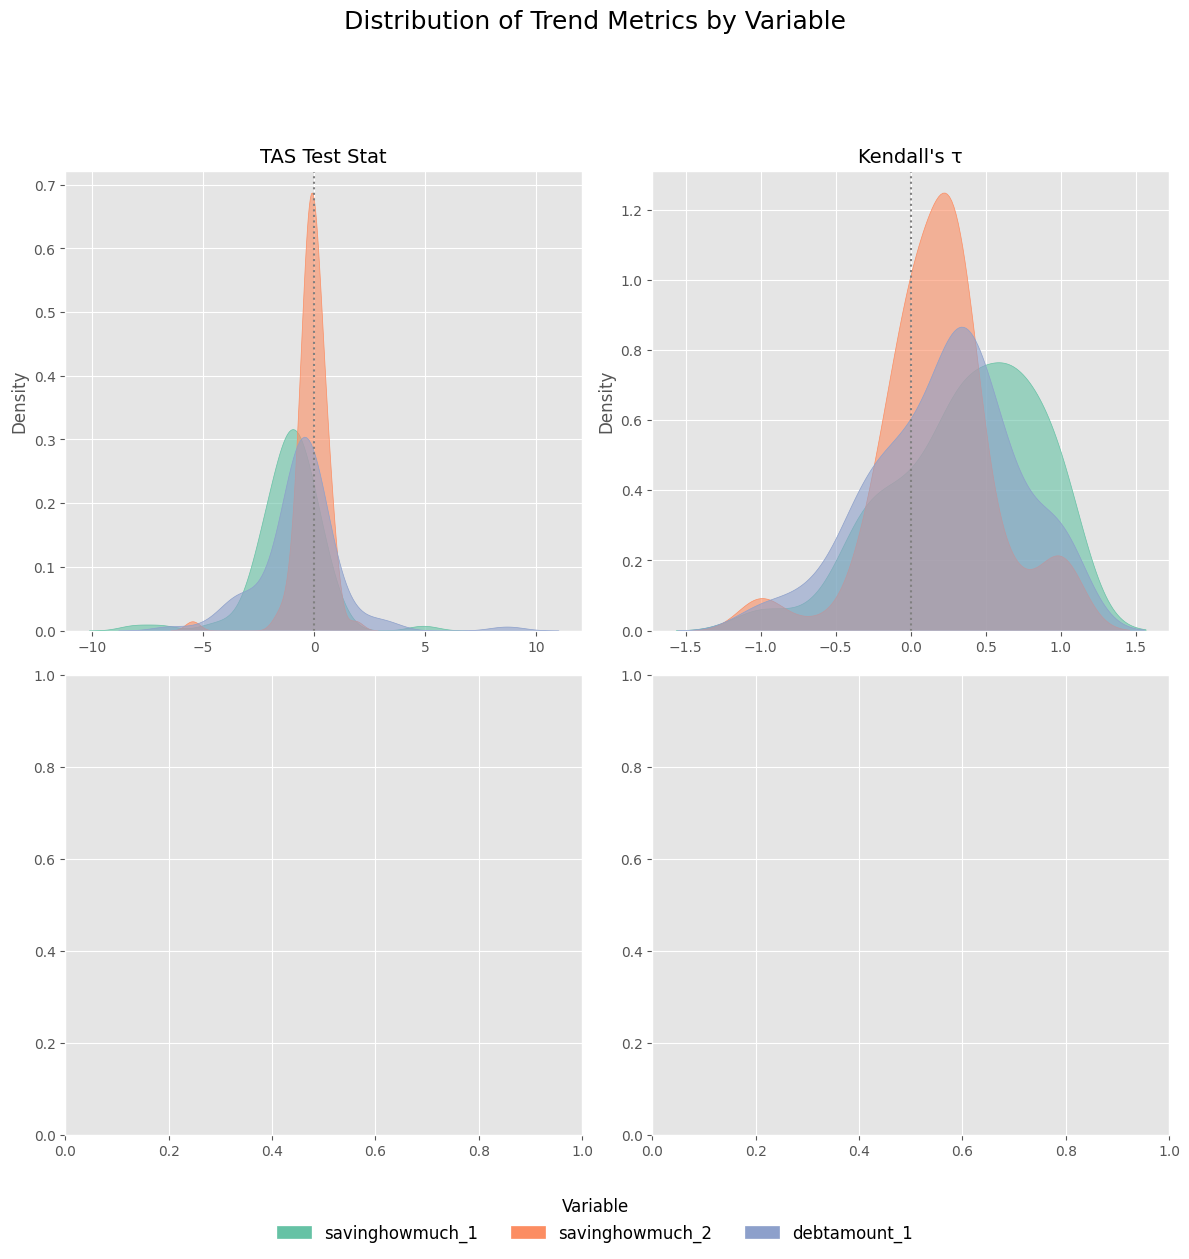

In [236]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# ──────────────────────────────────────────────────────────────────────────────
# Assumes you have a DataFrame `trend_df` with columns:
#   ['Groupnr','Variable','OLS_slope','GLS_slope','TAS_stat','Kendall_tau', ...]
# ──────────────────────────────────────────────────────────────────────────────

metrics = ["TAS_stat", "Kendall_tau"]
titles  = ["TAS Test Stat", "Kendall's τ"]
palette = "Set2"

# 1) figure out our Variables & map each to a color
vars_  = list(trend_df['Variable'].unique())
colors = dict(zip(vars_, sns.color_palette(palette, n_colors=len(vars_))))

# 2) build the 2×2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False, sharey=False)
axes = axes.flatten()

for ax, metric, title in zip(axes, metrics, titles):
    # draw each Variable's KDE on this axis
    for var in vars_:
        sns.kdeplot(
            data=trend_df[trend_df['Variable'] == var],
            x=metric,
            fill=True,
            alpha=0.6,
            ax=ax,
            color=colors[var],
            label=None
        )
    # vertical zero‐line
    ax.axvline(0, color="grey", linestyle=":")
    # set the subplot title
    ax.set_title(title, fontsize=14)
    # only bottom‐row axes get an x‐label; top row we clear it
    if ax in axes[:2]:
        ax.set_xlabel("")
    else:
        ax.set_xlabel(metric, fontsize=12)
    ax.set_ylabel("Density")
    ax.grid(True)

# 3) big figure title
fig.suptitle("Distribution of Trend Metrics by Variable", fontsize=18, y=1.02)

# 4) manual legend (one row, centered under all)
patches = [mpatches.Patch(color=colors[v], label=v) for v in vars_]
fig.legend(
    handles=patches,
    title="Variable",
    loc="lower center",
    ncol=len(vars_),
    frameon=False,
    bbox_to_anchor=(0.5, -0.02),
    fontsize=12,
    title_fontsize=12
)

plt.tight_layout(rect=(0, 0.05, 1, 0.95))
plt.show()


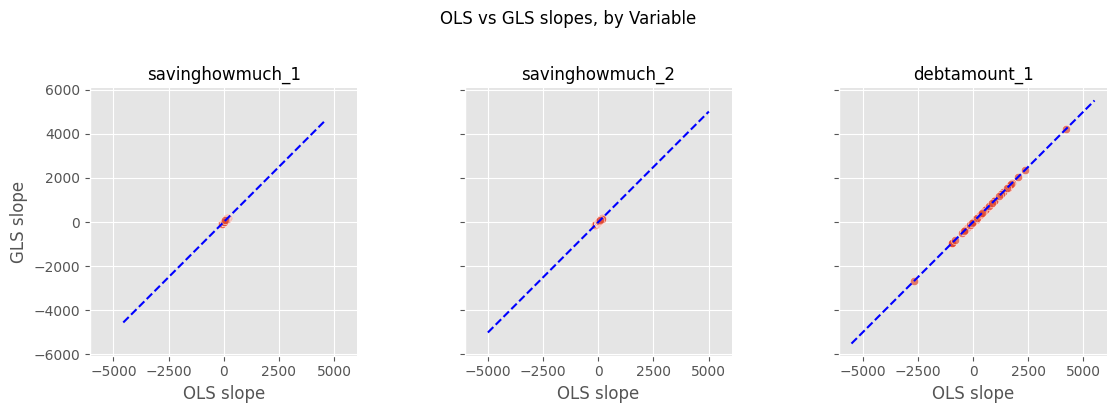

In [237]:
# 3) OLS vs. GLS slopes, faceted by Variable (identity line in red,
#     scatter points unchanged, and clean titles)
g = sns.FacetGrid(trend_df, col="Variable", height=4, aspect=1)

# use only the raw name as title:
g.set_titles("{col_name}")

# plot the scatters
g.map_dataframe(
    sns.scatterplot,
    x="OLS_slope",
    y="GLS_slope",
    alpha=0.7
)

# draw a red 45° line in each panel
for ax in g.axes.flat:
    lim = max(
        abs(ax.get_xlim()[0]), ax.get_xlim()[1],
        abs(ax.get_ylim()[0]), ax.get_ylim()[1]
    )
    ax.plot([-lim, lim], [-lim, lim],
            ls="--", lw=1.5, c="blue")
    ax.set_aspect("equal", "box")

g.set_axis_labels("OLS slope", "GLS slope")
g.fig.suptitle("OLS vs GLS slopes, by Variable", y=1.02)
plt.tight_layout()
plt.show()



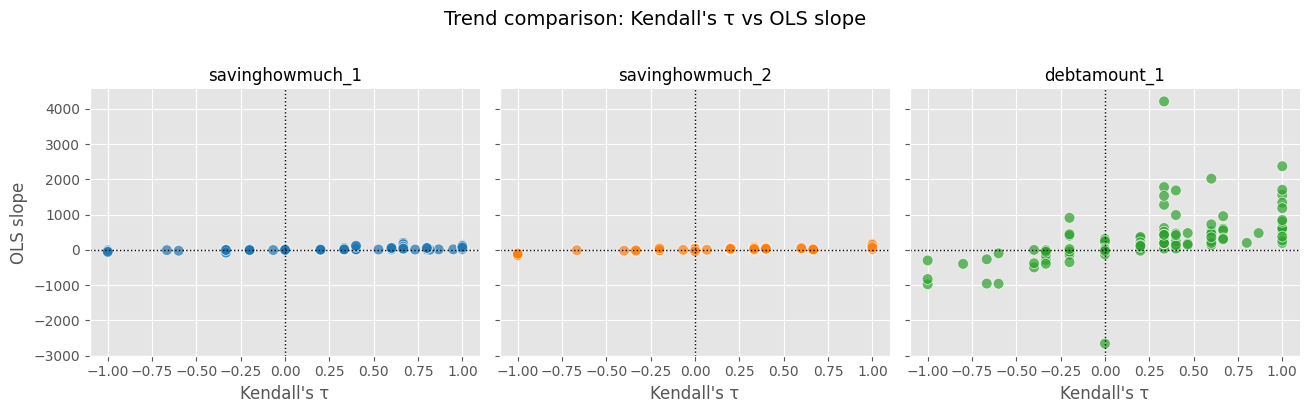

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) define a mapping from Variable → color
palette_dict = {
    'savinghowmuch_1': 'tab:blue',
    'savinghowmuch_2': 'tab:orange',
    'debtamount_1':  'tab:green'
}

# 2) build the FacetGrid
g = sns.FacetGrid(
    trend_df,
    col="Variable",
    height=4,
    aspect=1.1,
    sharex=True,
    sharey=True
)

# 3) scatter each facet, with the correct single color
g.map_dataframe(
    sns.scatterplot,
    x="Kendall_tau",
    y="OLS_slope",
    hue="Variable",
    palette=palette_dict,
    legend=False,
    s=60,
    alpha=0.7
)

# 4) draw the dotted black zero‐lines
for ax in g.axes.flat:
    ax.axvline(0, color='black', linestyle=':', linewidth=1)
    ax.axhline(0, color='black', linestyle=':', linewidth=1)

# 5) clean up labels & titles
g.set_axis_labels("Kendall's τ", "OLS slope")
g.set_titles("{col_name}")                  # just the variable name
g.fig.suptitle(
    "Trend comparison: Kendall's τ vs OLS slope",
    y=1.02,
    fontsize=14
)

plt.tight_layout()
plt.show()


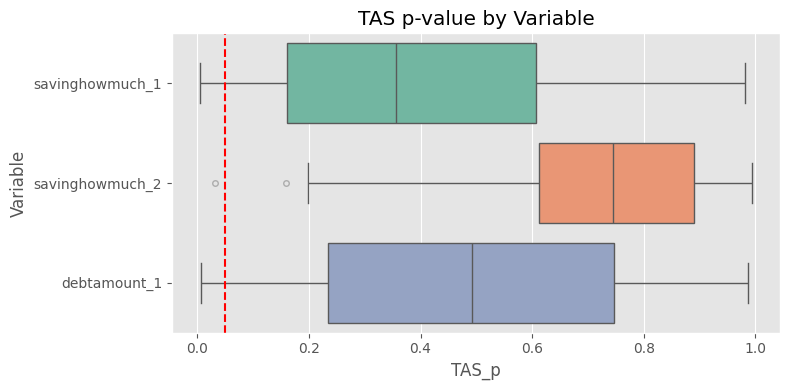

In [239]:
# 5) TAS p-value boxplot, showing outliers
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=trend_df,
    y="Variable",
    x="TAS_p",
    hue='Variable',
    palette="Set2",
    showfliers=True,
    flierprops={"marker":"o","alpha":0.4,"markersize":4},
    legend=False
)
plt.axvline(0.05, color="red", linestyle="--")
plt.title("TAS p-value by Variable")
plt.tight_layout()
plt.show()

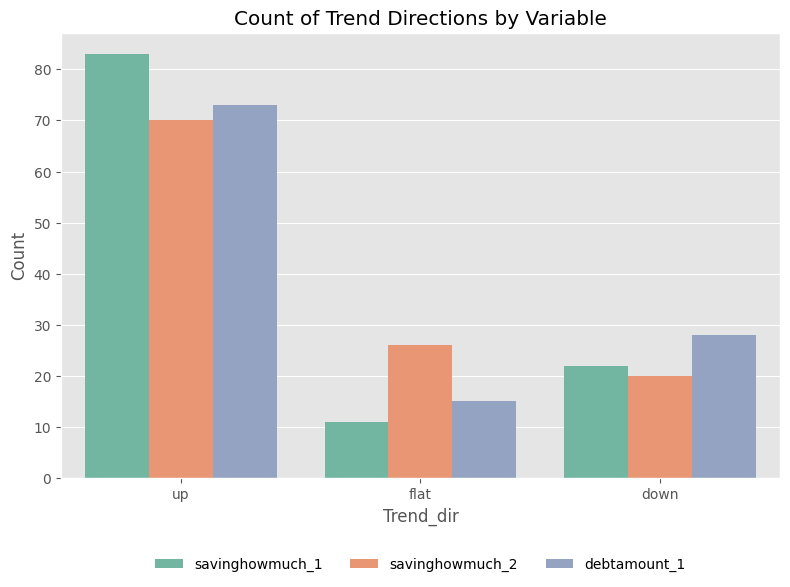

In [240]:
plt.figure(figsize=(8, 6))
order = ["up", "flat", "down"]
ax = sns.countplot(
    data=trend_df,
    x="Trend_dir",
    order=order,
    hue="Variable",
    palette="Set2"
)
plt.title("Count of Trend Directions by Variable")
plt.ylabel("Count")

# Put legend underneath
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),  # x=0.5 centers; y<0 puts it below the plot
    ncol=3,                       # three columns for the three variables
    frameon=False
)

plt.tight_layout()
plt.show()


### Final output

#### Results of final tests

In [241]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Violin‐plot of OLS p‐values by Variable
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=trend_df,
    x="OLS_p",
    y="Variable",
    hue="Variable",
    palette="Dark2",
    split=False,
    inner="stick",
    legend=False
)
# add the red 0.05 line
plt.axvline(0.05, color="red", linestyle="--")
# save and close
plt.savefig("fig_violin_OLS_p.png", bbox_inches="tight", dpi=150)
plt.close()


# 2) KDE‐plots of slopes and test–stats
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
metrics = ["OLS_slope","GLS_slope","TAS_stat","Kendall_tau"]
titles  = ["OLS Slope","GLS Slope","TAS Test Stat","Kendall's τ"]
for ax, metric, title in zip(axes, metrics, titles):
    sns.kdeplot(
        data=trend_df,
        x=metric,
        hue="Variable",
        palette="Set2",
        fill=True,
        alpha=0.6,
        ax=ax
    )
    ax.set_title(title)
    ax.axvline(0, color="grey", linestyle=":")
plt.tight_layout()
# save and close
fig.savefig("fig_kde_metrics.png", bbox_inches="tight", dpi=150)
plt.close(fig)


# 3) OLS vs. GLS facets (just as we last coded it)
g = sns.FacetGrid(trend_df, col="Variable", height=4, aspect=1)
g.map_dataframe(
    sns.scatterplot,
    x="OLS_slope",
    y="GLS_slope",
    alpha=0.7
)
for ax in g.axes.flat:
    lim = max(
        abs(ax.get_xlim()[0]), ax.get_xlim()[1],
        abs(ax.get_ylim()[0]), ax.get_ylim()[1]
    )
    ax.plot([-lim, lim], [-lim, lim],
            ls="--", lw=1.5, c="red")
    ax.set_aspect("equal", "box")
g.set_titles("{col_name}")
g.set_axis_labels("OLS slope", "GLS slope")
g.fig.suptitle("OLS vs GLS slopes, by Variable", y=1.02)
plt.tight_layout()
g.fig.savefig("fig_OLSvGLS.png", bbox_inches="tight", dpi=150)
plt.close(g.fig)


# 4) Kendall τ vs OLS slope facets
palette_dict = {
    'savinghowmuch_1': 'tab:blue',
    'savinghowmuch_2': 'tab:orange',
    'debtamount_1':  'tab:green'
}
g2 = sns.FacetGrid(
    trend_df,
    col="Variable",
    height=4,
    aspect=1.1,
    sharex=True,
    sharey=True
)
g2.map_dataframe(
    sns.scatterplot,
    x="Kendall_tau",
    y="OLS_slope",
    hue="Variable",
    palette=palette_dict,
    legend=False,
    s=60,
    alpha=0.7
)
for ax in g2.axes.flat:
    ax.axvline(0, color='black', linestyle=':', linewidth=1)
    ax.axhline(0, color='black', linestyle=':', linewidth=1)
g2.set_axis_labels("Kendall's τ", "OLS slope")
g2.set_titles("{col_name}")
g2.fig.suptitle("Kendall's τ vs OLS slope", y=1.02)
plt.tight_layout()
g2.fig.savefig("fig_KendallvOLS.png", bbox_inches="tight", dpi=150)
plt.close(g2.fig)


In [242]:
!pip install xlsxwriter

In [243]:
with pd.ExcelWriter("trend_analysis_output.xlsx", engine="xlsxwriter") as writer:
    trend_df.to_excel(writer, sheet_name="Trend_Summary", index=False)
    workbook  = writer.book
    worksheet = writer.sheets["Trend_Summary"]
    start_row = len(trend_df) + 3

    worksheet.insert_image(start_row,   0, "fig_violin_OLS_p.png",  {'x_scale':0.7, 'y_scale':0.7})
    worksheet.insert_image(start_row,   6, "fig_kde_metrics.png",  {'x_scale':0.7, 'y_scale':0.7})
    worksheet.insert_image(start_row+25,0, "fig_OLSvGLS.png",      {'x_scale':0.7, 'y_scale':0.7})
    worksheet.insert_image(start_row+25,6, "fig_KendallvOLS.png",  {'x_scale':0.7, 'y_scale':0.7})


The binary variables need a different way of handling

Function that executes all necessary steps to the input dataframe

In [244]:
import pandas as pd
import numpy as np

def add_growth_to_smoothed_with_interpolation(
    df: pd.DataFrame,
    col: str,
    group_key: str = 'Groupnr'
) -> pd.Series:
    """
    Given a DataFrame and a single smoothed column `col` (already existing),
    interpolate within each group, then take first‐difference as 'growth'.
    """
    interp = (
        df
        .groupby(group_key)[col]
        .transform(lambda s: s.interpolate(method='linear', limit_area=None, limit=2))
    )
    return interp.groupby(df[group_key]).diff()


def binary_prep(df: pd.DataFrame, binary_vars: list[str]) -> pd.DataFrame:
    """
    1) For each (Groupnr,Round), compute var_prop = proportion of 'positive' codes.
    2) Interpolate those prop‐series within each group and take diff → var_prop_growth.
    Returns a DataFrame with columns:
       ['Groupnr','Round', <var>_prop, <var>_growth …]
    """

    binary_neg = [
        "debt", "foodsecurity1", "foodsecurity2", "foodsecurity3", "foodsecurity4", "foodsecurity5",
        "foodsecurity6", "foodsecurity7", "foodsecurity8", "foodsecurity9", "childmortality",
        "jealousy", "assetsmatrix1_4", "assetsmatrix1_5", "assetsmatrix1_22", "assetsmatrix2_15",
        "assetsmatrix2_8", "assetsmatrix3_17", "assetsmatrix2_17",
        "assetsmatrix2_18", "assetsmatrix2_19", "assetsmatrix2_11",
        "assetsmatrix3_15", "assetsmatrix3_23"
    ]

    binary_pos = [
        "HHMschoolnow_1", "HHMschoolnow_2", "HHMschoolnow_3",
        "HHMschoolnow_4", "HHMschoolnow_5",
        "school", "meetings1", "moneywithdraw", "moneyproblems"
    ]

    ALL_BINARY = set(binary_pos) | set(binary_neg)
    pos1 = set(binary_pos)

    pos_map = {v: (1 if v in pos1 else 2) for v in ALL_BINARY}

    rows = []
    for (g, r), sub in df.groupby(['Groupnr', 'Round']):
        row = {'Groupnr': g, 'Round': r}
        for var in binary_vars:
            vals = sub[var].dropna()
            if len(vals):
                row[f'{var}_prop'] = (vals == pos_map[var]).sum() / len(vals)
            else:
                row[f'{var}_prop'] = np.nan
        rows.append(row)

    dfb = pd.DataFrame(rows)
    dfb['Round'] = dfb['Round'].astype(int)
    dfb = dfb.sort_values(['Groupnr', 'Round']).reset_index(drop=True)

    for var in binary_vars:
        pcol = f'{var}_prop'
        dfb[f'{pcol}_growth'] = add_growth_to_smoothed_with_interpolation(dfb, pcol)

    return dfb


def df_prep(df: pd.DataFrame, variables: list[str]) -> pd.DataFrame:
    df2 = df[['Groupnr', 'Country', 'Round'] + variables].copy()

    df2 = df2[~df2['Round'].isin(['Onboarding', '6', '6.0']) & df2['Round'].notna()]
    df2['Round'] = pd.to_numeric(df2['Round'], errors='coerce')
    df2 = df2[df2['Round'] % 1 == 0]
    df2['Round'] = df2['Round'].astype(int)
    df2 = df2[df2['Round'].isin([0, 1, 2, 3, 100, 102])]
    df2 = df2.sort_values('Round').reset_index(drop=True)

    ALL_BINARY = {
        "debt", "foodsecurity1", "foodsecurity2", "foodsecurity3",
        "foodsecurity4", "foodsecurity5", "foodsecurity6", "foodsecurity7",
        "foodsecurity8", "foodsecurity9", "childmortality", "jealousy",
        "assetsmatrix1_4", "assetsmatrix1_5", "assetsmatrix1_22",
        "assetsmatrix2_15", "assetsmatrix2_8", "assetsmatrix3_17",
        "assetsmatrix2_17", "assetsmatrix2_18", "assetsmatrix2_19",
        "assetsmatrix2_11", "assetsmatrix3_15", "assetsmatrix3_23",
        "HHMschoolnow_1", "HHMschoolnow_2", "HHMschoolnow_3",
        "HHMschoolnow_4", "HHMschoolnow_5",
        "school", "meetings1", "moneywithdraw", "moneyproblems"
    }
    binary_vars = [v for v in variables if v in ALL_BINARY]
    other_vars = [v for v in variables if v not in ALL_BINARY]

    for col in other_vars + binary_vars:
        df2[col] = pd.to_numeric(df2[col], errors='coerce')

    df_tr = (
        df2
        .groupby(['Groupnr', 'Round'])[other_vars]
        .mean()
        .reset_index()
    ).sort_values(['Groupnr', 'Round']).reset_index(drop=True)

    df_tr = add_ewma_columns(df_tr, variables=other_vars, span=3, min_periods=1)

    # Ensure EWMA growth columns exist
    for var in other_vars:
        col = f'{var}_EWMA_3'
        if col in df_tr.columns:
            df_tr[f'{col}_growth'] = add_growth_to_smoothed_with_interpolation(df_tr, col)
        else:
            print(f"⚠️ Skipping EWMA growth for {var} — base EWMA column missing.")


    for var in other_vars:
        df_tr[f'{var}_growth'] = df_tr.groupby('Groupnr')[var].diff()
        df_tr[f'{var}_pct_growth'] = df_tr.groupby('Groupnr')[var].pct_change(fill_method=None) * 100

    df_bin = binary_prep(df2, binary_vars)

    df_all = df_tr.merge(df_bin, on=['Groupnr', 'Round'], how='left')
    df_all = df_all.sort_values(['Groupnr', 'Round']).reset_index(drop=True)
    df_all.binary_present = binary_vars

    return df_all

In [245]:
raw_df = df.copy()
variables = ['savinghowmuch_1', 'HHMschoolnow_1', 'debt']
country = ''
group_numbers = ['']

In [246]:
df_prepped = df_prep(raw_df,variables)

/tmp/ipython-input-244-51788031.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_all.binary_present = binary_vars


In [247]:
df_prepped[df_prepped['Groupnr'] == 'RWA053']

,Groupnr,Round,savinghowmuch_1,savinghowmuch_1_EWMA_3,savinghowmuch_1_EWMA_3_growth,savinghowmuch_1_growth,savinghowmuch_1_pct_growth,HHMschoolnow_1_prop,debt_prop,HHMschoolnow_1_prop_growth,debt_prop_growth
832,RWA053,0,1722.222222,1722.222222,NaN,NaN,NaN,1.0,0.700000,NaN,NaN
833,RWA053,1,12375.000000,8824.074074,7101.851852,10652.777778,618.548387,NaN,0.315789,0.0,-0.384211
834,RWA053,2,4708.333333,6472.222222,-2351.851852,-7666.666667,-61.952862,NaN,0.210526,0.0,-0.105263
835,RWA053,3,9333.333333,7998.148148,1525.925926,4625.000000,98.230088,NaN,0.277778,NaN,0.067251
836,RWA053,100,6911.818182,7437.461714,-560.686434,-2421.515152,-25.944805,1.0,0.368421,NaN,0.090643
837,RWA053,102,4500.000000,5945.417669,-1492.044045,-2411.818182,-34.894121,1.0,0.500000,0.0,0.131579


Final preperation code

In [248]:
def final_prep(raw_df, variables, group_numbers, country, window=3):
    # 1) prep everything on the full set
    df_all = df_prep(raw_df, variables)

    # 2) drop other-country groups
    df_all = df_all[df_all['Groupnr'].str.startswith(country)]

    # 3) build EWMA-based bands & avg on the FULL set
    iqr_bands = {}
    avg_growth = {}
    for var in variables:
        raw_gc = f"{var}_growth"
        ewma_gc = f"{var}_EWMA_{window}_growth"

        # quartiles on EWMA over all groups
        q1_ewma = df_all.groupby('Round')[ewma_gc].quantile(0.25)
        q3_ewma = df_all.groupby('Round')[ewma_gc].quantile(0.75)

        iqr_ewma = q3_ewma - q1_ewma

        # EWMA band
        lower = q1_ewma - 1.5 * iqr_ewma
        upper = q3_ewma + 1.5 * iqr_ewma
        iqr_bands[var] = pd.DataFrame({'lower': lower, 'upper': upper})

        # average raw growth over all groups
        avg_growth[var] = df_all.groupby('Round')[raw_gc].mean()

    # 4) now filter to your target groups
    df_filt = df_all[df_all['Groupnr'].isin(group_numbers)]

    # 5) flag + plot
    flags = {var: {} for var in variables}
    for var in variables:
        band = iqr_bands[var].reset_index().rename(columns={'index': 'Round'})
        avg = avg_growth[var].reset_index().rename(columns={var+'_growth': 'avg'})

        raw_gc = f"{var}_growth"

        tmp = (
            df_filt[['Groupnr', 'Round', raw_gc]]
            .merge(band, on='Round')
            .merge(avg, on='Round')
        )

        for _, r in tmp.iterrows():
            v = r[raw_gc]
            if pd.isna(v):
                continue
            if v < r['lower']:
                flags[var][(r['Groupnr'], r['Round'])] = 'NEG'
            elif v > r['upper']:
                flags[var][(r['Groupnr'], r['Round'])] = 'POS'

    # 6) build the wide POS/NEG table
    rows = []
    for var, vf in flags.items():
        for (grp, rnd), tag in vf.items():
            rows.append({'Groupnr': grp, 'Round': rnd, 'variable': var, 'flag': tag})

    df_flags = pd.DataFrame(rows)
    df_out = (
        df_flags
        .pivot(index=['Groupnr', 'Round'], columns='variable', values='flag')
        .reset_index()
    )

    return df_out, flags, df_all

In [249]:
raw_df = df.copy()
variables = ['savinghowmuch_1', 'debtamount_1', 'savingstotal_1']
group_number = ['RWA102', 'RWA053']
country = 'RWA'

In [250]:
final_prep(raw_df, variables, group_number, country)

/tmp/ipython-input-244-51788031.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_all.binary_present = binary_vars


(variable Groupnr  Round debtamount_1 savinghowmuch_1 savingstotal_1
 0         RWA053      1          POS             POS            NaN
 1         RWA053      2          NEG             NEG            NaN
 2         RWA053      3          NaN             POS            NaN
 3         RWA053    102          NaN             NaN            NEG
 4         RWA102      2          NaN             POS            NaN
 5         RWA102      3          NaN             NEG            NaN,
 {'savinghowmuch_1': {('RWA053', 1): 'POS',
   ('RWA053', 2): 'NEG',
   ('RWA053', 3): 'POS',
   ('RWA102', 2): 'POS',
   ('RWA102', 3): 'NEG'},
  'debtamount_1': {('RWA053', 1): 'POS', ('RWA053', 2): 'NEG'},
  'savingstotal_1': {('RWA053', 102): 'NEG'}},
      Groupnr  Round  savinghowmuch_1  debtamount_1  savingstotal_1  \
 566   RWA004      3      1470.000000  56130.000000             NaN   
 567   RWA004    102      1433.333333  39657.142857             NaN   
 568   RWA005      3      3640.000000  58214.28

In [251]:
# !pip install xlsxwriter

In [252]:
import io

In [253]:
import io
import matplotlib.pyplot as plt

def plot_to_buffer(plot_fn, *args, figsize=(8,5), dpi=120, **kwargs):
    """
    Calls plot_fn(*args, **kwargs) on its own figure
    and returns a PNG BytesIO buffer.
    """
    fig = plt.figure(figsize=figsize, dpi=dpi)
    try:
        plot_fn(*args, **kwargs)
        plt.tight_layout()
        buf = io.BytesIO()
        fig.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
    finally:
        plt.close(fig)
    return buf



In [254]:


def xlsx_generator(raw_df, groups, variables, country, window=3):
    # Step 1: Run final_prep
    df_out, flags, df_all = final_prep(raw_df, variables, groups, country, window)
    filename = f"Trend Analysis for {country}.xlsx"

    # Step 2: Create ExcelWriter
    writer = pd.ExcelWriter(filename, engine='xlsxwriter')
    workbook = writer.book

    # Step 3: Write the 'Outliers' sheet
    # Step 3: Write the 'Outliers' sheet
    df_out.to_excel(writer, sheet_name='Outliers', index=False)
    worksheet1 = writer.sheets['Outliers']

    bold = workbook.add_format({'bold': True})
    worksheet1.set_row(0, None, bold)
    worksheet1.set_column('A:B', None, bold)

    # Step 4: Create worksheet for plots
    worksheet2 = workbook.add_worksheet('Detailed plots')

    # ✅ Step 5: Add plots (insert this improved block below)
    # inside xlsx_generator, after you have df_all and flags:
    row = 0
    for var in variables:
        if flags.get(var):
            img_buf = create_final_plots(df_all, var, groups, window)
            if img_buf:
                worksheet2.insert_image(row, 0, '', {
                  'image_data': img_buf,
                  'x_scale': 0.8,
                  'y_scale': 0.8
            })
            row += 30
        else:
            print(f"⚠️ Skipped plot for {var}: EWMA growth missing.")


    # Step 6: Save workbook
    writer.close()
    print(f"✅ Excel file '{filename}' has been generated successfully.")

In [255]:
all_variables = numerical + ordered_categorical

In [256]:
raw_df = df.copy()
variables = all_variables
group_number = ['RWA053']
country = 'RWA'

In [257]:
print(raw_df.columns.tolist())

['Groupnr', 'Round', 'Country', 'childmortality', 'childmortalitytime', 'foodsecurity1', 'foodsecurity2', 'foodsecurity3', 'foodsecurity4', 'foodsecurity5', 'foodsecurity6', 'foodsecurity7', 'foodsecurity8', 'foodsecurity9', 'foodsecurity1freq', 'foodsecurity2freq', 'foodsecurity3freq', 'foodsecurity4freq', 'foodsecurity5freq', 'foodsecurity6freq', 'foodsecurity7freq', 'foodsecurity8freq', 'foodsecurity9freq', 'fuelcooking', 'sourcelighting', 'watersource', 'timewatersource_1', 'timewatersourceunit', 'Toiletfacility', 'materialroof', 'materialfloor', 'materialwallsext', 'assetsmatrix2_7', 'assetsmatrix2_14', 'assetsmatrix2_16', 'assetsmatrix1_23', 'assetsmatrix3_14', 'assetsmatrix3_16', 'assetsmatrix2_12', 'assetsmatrix3_22', 'HHMschool_1', 'HHMschool_2', 'HHMschool_3', 'HHMschool_4', 'HHMschool_5', 'HHMschoolnow_1', 'HHMschoolnow_2', 'HHMschoolnow_3', 'HHMschoolnow_4', 'HHMschoolnow_5', 'HHMschoolcompl_1', 'HHMschoolcompl_2', 'HHMschoolcompl_3', 'HHMschoolcompl_4', 'HHMschoolcompl_5',

In [258]:
xlsx_generator(raw_df, group_number, variables, country)

/tmp/ipython-input-244-51788031.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tr[f'{var}_pct_growth'] = df_tr.groupby('Groupnr')[var].pct_change(fill_method=None) * 100
/tmp/ipython-input-244-51788031.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tr[f'{var}_growth'] = df_tr.groupby('Groupnr')[var].diff()
/tmp/ipython-input-244-51788031.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

NameError: name 'create_final_plots' is not defined

In [ ]:
raw_df[['Groupnr', 'Round', 'savinghowmuch_1']].query("Groupnr in @group_number")


In [ ]:
print(raw_df.columns.tolist())